<center><center><img src="https://raw.githubusercontent.com/makaires77/fioce/master/assets/logo_fioce.png" 
style="height:150px" alt="Logo_Unifor"></center></center>

## <center>Analisar a Produção Acadêmica Institucional da Fiocruz Ceará para<br /> alinhar conforme terminologia adotada no CNPq </center>

    João Hermínio da Silva       - Fiocruz Ceará
    Carlos Vasconcelos Guimarães – Fiocruz Ceará
    Antonio Marcos Aires Barbosa – Fiocruz Ceará

**Introdução**

A Vice-Presidência de Pesquisa e Coleções Biológicas da Fiocruz (VPPCB/Fiocruz) solicita especificar as áreas do conhecimento de acordo com os critérios do CNPq. Mediante dados coletados sobre a produção científica da Fiocruz a em seis bases de dados (WoS, Scopus, PubMed, Lilacs, Arca via OasisBr e Currfculo Lattes), visamos neste trabalho classiicar a produção acadêmica da Fiocruz segundo os termos de classificação usados pelo CNPq. Esta identificação servirá de base para uma reorganização das áreas e linhas de pesquisa de todas as unidades da Fiocruz.

**Objetivo geral:**

    Alinhar as áreas da produção científica/acadêmica constante nas publicações da Fiocruz Ceará com as definições/nomenclatura do CNPq para alinhar a pesquisa desenvolvida pela Fiocruz com áreas já definidas pelo CNPq, em até quatro níveis diferentes de detalhamento.

**Objetivos Específicos**

    1. Fazer análise de similaridade entre títulos, resumos das publicações constantes das planilhas fornecidas pela VPEIC com as definições do CNPq para classificar cada publciação nas áreas do CNPq mais correlatas aos dados de cada publicação, visando contribuir para redefinição das áreas de pesquisa institucional tornando-as mais alinhadas ao CNPq;

## Escopo do Levantamento de dados

**Universo para extração de dados:**
- Currículos Lattes dos servidores da Fiocruz Ceará, com nível de doutorado.

**Período de análise:** 
- A partir da data de ingresso (início de atuação na Fiocruz Ceará), até Agosto/2023.
    
**Extração computacional dos dados:**
- ScriptDadosCurriculo: Publicações (artigos completos em peródicos) de cada um dos indivíduos da amostra.

**Dados a ser analizados:**
- CoordenaçãoPesquisa: Lista de Nomes de Servidores, com as respectivas datas de entrada de cada um dos servidores na Fiocruz Ceará (ou data de ingresso na Fiocruz, pelo menos)
- VPEIC/Observatório: Planilha com lista de artigos publicados pela Fiocruz Ceará no período 2008 a 2023;
- VPEIC/Observatório: Planilha com lista de artigos publicados pela Fiocruz sem identificação da unidade que produziu o publicação;
- Diretório dos Grupos de Pesquisa CNPq/GdP: Tabela de Áreas do Conhecimento, segmentada em: Grandes Áreas, Áreas  

### Níveis de classificação das informações a serem preenchidas

A patir de análises nos títulos, resumos e palavras-chave dos artigos, serão aplicadas as orientações da VPPCB sucintamente citadas a seguir para alinhar com os conceitos do CNPq e escolher a área e subáreas em ate três níveis.

    - N00: Grande Área (Área principal do conhecimento principal)
    - N01: Área
    - N02: Subárea
    - N03: Especialidade

*Observações:* 

Sobre a área de conhecimento: Caso a produção científica não esteja contemplada em nenhuma das áreas de conhecimento do CNPq, por favor, preencher na coluna disponível com ate 4 níveis, separando os níveis por ";"

As planilhas ao final das colunas tem espaço reservado para algo não editável da planilha precise ser corrigido.

### Regras de associação à Fiocruz Ceará
- Considerar apenas produção de servidores
- Considerar a partir da data de ingresso na Fiocruz Ceará (Dados do RH)

# <center><b>PREPARAÇÃO DO AMBIENTE DE EXECUÇÃO</b></center>

## Importação dos módulos de trabalho

In [105]:
import os
import sys
import tkinter as tk
from tkinter import filedialog
from ipywidgets import widgets
from IPython.display import display

## Configuração e teste do ambiente local

In [ ]:
config = {}  # Dictionary to store the paths

In [1]:
# https://sh-tsang.medium.com/tutorial-cuda-cudnn-anaconda-jupyter-pytorch-installation-in-windows-10-96b2a2f0ac57
# DEFINIÇÃO DAS FUNÇÕES:
def try_amb():
    ## Visualizar versões dos principais componentes
    import os
    import pip
    import sys
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    # !pip3 install shutup
    # import shutup; shutup.please()   
    pyVer      = sys.version
    pipVer     = pip.__version__
    print('\nVERSÕES DAS PRINCIPAIS BIBLIOTECAS INSTALADAS NO ENVIROMENT')
    print('Interpretador em uso:', sys.executable)
    print('    Ambiente ativado:',os.environ['CONDA_DEFAULT_ENV'])
    print('     Python: '+pyVer, '\n        Pip:', pipVer,'\n'
         )
    !nvcc -V

def try_gpu():
    print('\nVERSÕES DO PYTORCH E GPU DISPONÍVEIS')
    try:
        import torch
        print('    PyTorch:',torch.__version__)
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print('Dispositivo:',device)
        print('Disponível :',device,torch.cuda.is_available(),' | Inicializado:',torch.cuda.is_initialized(),'| Capacidade:',torch.cuda.get_device_capability(device=None))
        print('Nome GPU   :',torch.cuda.get_device_name(0),'         | Quantidade:',torch.cuda.device_count(),'\n')
    except Exception as e:
        print('Erro ao configurar a GPU:',e,'\n')

def try_browser(chromedriver_path):
    print('\nVERSÕES O BROWSER E DO CHROMEDRIVER INSTALADAS')
    import os
    from selenium import webdriver
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    try:
        driver_path = chromedriver_path+'/chromedriver.exe'
        service = Service(driver_path)
        driver = webdriver.Chrome(service=service)
        str1 = driver.capabilities['browserVersion']
        str2 = driver.capabilities['chrome']['chromedriverVersion'].split(' ')[0]
        print(f'     Versão do browser: {str1}')
        print(f'Versão do chromedriver: {str2}')
        driver.quit()

        if str1[0:3] != str2[0:3]: 
            print("Versões incompatíveis, atualizar chromedriver!")
            print('  Baixar versão atualizada do Chromedriver em:')
            print('  https://googlechromelabs.github.io/chrome-for-testing/#stable')
            print('     Ex. Versão 116 PARA WINDOWS:')
            print('	    https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/116.0.5845.96/win64/chromedriver-win64.zip')
    except Exception as e:
        print('Erro ao testar versões:')
        print(f'  {e}')

def detect_error(html_text):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html_text, 'html.parser')
    result_list = soup.find('div', {'class': 'resultado'}).find('ol').find_all('li')
    for result in result_list:
        if 'Stale file handle' in result.text:
            raise Exception('Stale File Handle Detected')

In [2]:
def select_directory(prompt_message):
    """
    Opens a file dialog to allow the user to select a directory.
    Returns the path of the selected directory.
    """
    root = tk.Tk()
    root.withdraw()  # Hide the main Tk window
    print(prompt_message)
    folder_selected = filedialog.askdirectory()
    
    if folder_selected:
        print(f"You have selected the folder: {folder_selected}")
        return folder_selected
    else:
        print("No folder was selected.")
        return None

def configure_environment():
    """
    Allows the user to specify the directory of Chromedriver and the data storage folder.
    Returns a dictionary containing paths for both.
    """
    chromedriver_path = select_directory("Please select the Chromedriver folder:")
    data_storage_path = select_directory("Please select the data storage folder:")
    
    if chromedriver_path and data_storage_path:
        config = {
            "Chromedriver_Path": chromedriver_path,
            "Data_Storage_Path": data_storage_path
        }
        return config
    else:
        print("Configuration incomplete. Both paths are required.")
        return None

def select_directory_jupyter(prompt_message):
    """
    Creates an interactive directory selector in Jupyter Notebook.
    """
    print(prompt_message)
    
    folder_selector = widgets.Text(
        description='Directory:',
        value=os.getcwd(),  # Default value is the current working directory
        layout=widgets.Layout(width='90%')
    )
    
    def on_submit(change):
        folder_selected = change['new']
        
        if os.path.isdir(folder_selected):
            print(f"You have selected the folder: {folder_selected}")
        else:
            print("Invalid folder. Please try again.")
    
    folder_selector.on_submit(on_submit)
    display(folder_selector)
    

def on_submit_chromedriver(change):
    folder_selected = change.new
    if os.path.isdir(folder_selected):
        print(f"You have selected the Chromedriver folder: {folder_selected}")
        config["Chromedriver_Path"] = folder_selected

def on_submit_data_storage(change):
    folder_selected = change.new
    if os.path.isdir(folder_selected):
        print(f"You have selected the data storage folder: {folder_selected}")
        config["Data_Storage_Path"] = folder_selected
    else:
        print("Invalid folder for data storage. Please try again.")

def configure_environment_jupyter():
    """
    Specify directory of Chromedriver and the data storage folder in Jupyter Notebook.
    """
    chromedriver_selector = widgets.Text(
        description='Chromedriver:',
        value=os.getcwd(),
        layout=widgets.Layout(width='90%')
    )
    chromedriver_selector.continuous_update = False
    # chromedriver_selector.on_submit(on_submit_chromedriver)
    chromedriver_selector.observe(on_submit_chromedriver, names='value')

    data_storage_selector = widgets.Text(
        description='Data Storage:',
        value=os.getcwd(),
        layout=widgets.Layout(width='90%')
    )
    data_storage_selector.continuous_update = False
    # data_storage_selector.on_submit(on_submit_data_storage)
    # Utilizar o método observe em vez de on_submit
    data_storage_selector.observe(on_submit_data_storage, names='value')

    print("Please select the Chromedriver folder:")
    display(chromedriver_selector)

    print("Please select the data storage folder:")
    display(data_storage_selector)

In [3]:
## Ambiente Linux (Laptop)
# /home/marcos/fioce/chromedriver
# /home/marcos/kgfioce

## Ambiente Fiocruz Eusébio (Windows)
# c:\Users\marcos.aires\fioce\chromedriver
# c:\kgfioce\

configure_environment_jupyter()

Please select the Chromedriver folder:


Text(value='c:\\Users\\marcos.aires\\fioce\\source\\adapters\\input\\jupyter_notebooks', continuous_update=Fal…

Please select the data storage folder:


Text(value='c:\\Users\\marcos.aires\\fioce\\source\\adapters\\input\\jupyter_notebooks', continuous_update=Fal…

You have selected the Chromedriver folder: c:\Users\marcos.aires\fioce\chromedriver
You have selected the data storage folder: c:\kgfioce\


In [4]:
chromedriver_path = config.get("Chromedriver_Path", "Default_Value")
data_storage_path = config.get("Data_Storage_Path", "Default_Value")

## Execução das funções de teste do ambiente

In [5]:
try_browser(chromedriver_path)


VERSÕES O BROWSER E DO CHROMEDRIVER INSTALADAS
     Versão do browser: 116.0.5845.188
Versão do chromedriver: 116.0.5845.96


In [6]:
try_amb()


VERSÕES DAS PRINCIPAIS BIBLIOTECAS INSTALADAS NO ENVIROMENT
Interpretador em uso: c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\python.exe
    Ambiente ativado: Python38-PyTorch
     Python: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)] 
        Pip: 23.2.1 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Wed_Jul_14_19:47:52_Pacific_Daylight_Time_2021
Cuda compilation tools, release 11.4, V11.4.100
Build cuda_11.4.r11.4/compiler.30188945_0


In [7]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
try_gpu()


VERSÕES DO PYTORCH E GPU DISPONÍVEIS
    PyTorch: 1.12.1+cpu
Dispositivo: cpu
Erro ao configurar a GPU: Torch not compiled with CUDA enabled 



## Importar pacotes necessários

In [8]:
# !python.exe -m pip install --upgrade pip
# !pip install selenium --upgrade

%matplotlib inline
import time
t00=time.time()

import re
import torch
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os, csv, sys, pip, time, string, re
import warnings, traceback
warnings.filterwarnings('ignore')

from PIL import Image
from io import BytesIO
from string import Formatter
from datetime import datetime
from datetime import timedelta

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException
from IPython.display import clear_output, display, HTML

## Configurar exibição dos dataframes do pandas na tela
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')
pd.set_option('display.max_rows', 600)

In [9]:
# Renderização de imagem para exibição dentro da linha do dataframe
def path_to_image_html(path):

    return '<img src="'+ path + '" style=max-height:124px;"/>'

def show_im():
    CSS = """
    .output {
        flex-direction: row;
    }
    """

    HTML('<style>{}</style>'.format(CSS))
    
def foto():
    '''Aplica filtro no campo com o link para a foto do autor do Dataframe de identificação extraído do currículo Lattes e renderiza a foto em HTML a partir deste link
    Autor: Marcos Aires Fev.2022
    '''
    campo='Link Foto:'
    images_df       = df_identificacao[df_identificacao['ROTULOS'] == campo]  # filter by sport input, must be soccer or basketball for this use case
    image_grid      = df_identificacao['CONTEUDOS']
    image_grid_html = HTML(df_identificacao[:1].to_html(escape=False,formatters=dict(conteudos=path_to_image_html)))
    display(image_grid_html)
    show_im()

def tempo(start, end):
    t=end-start

    tempo = timedelta(
        weeks   = t//(3600*24*7),
        days    = t//(3600*24),
        seconds = t,
        minutes = t//(60),
        hours   = t//(3600),
        microseconds=t//1000000,
        )
    fmt='{H:2}:{M:02}:{S:02}'
    return strfdelta(tempo)


def horas(segundos): 
    return time.strftime("%H:%M:%S", time.gmtime(segundos)) 


def dias_horas_minutos(td):
    x = (td.days, td.seconds//3600, (td.seconds//60)%60, td.seconds)
    return x #(days, hrs, mins, seconds)


def strfdelta(tdelta, fmt='{H:02}h {M:02}m {S:02}s', inputtype='timedelta'):
    """Convert a datetime.timedelta object or a regular number to a custom-formatted string, 
    just like the stftime() method does for datetime.datetime objects.

    The fmt argument allows custom formatting to be specified.  Fields can 
    include seconds, minutes, hours, days, and weeks.  Each field is optional.

    Some examples:
        '{D:02}d {H:02}h {M:02}m {S:02}s' --> '05d 08h 04m 02s' (default)
        '{W}w {D}d {H}:{M:02}:{S:02}'     --> '4w 5d 8:04:02'
        '{D:2}d {H:2}:{M:02}:{S:02}'      --> ' 5d  8:04:02'
        '{H}h {S}s'                       --> '72h 800s'

    The inputtype argument allows tdelta to be a regular number instead of the  
    default, which is a datetime.timedelta object.  Valid inputtype strings: 
        's', 'seconds', 
        'm', 'minutes', 
        'h', 'hours', 
        'd', 'days', 
        'w', 'weeks'
    """

    # Convert tdelta to integer seconds.
    if inputtype == 'timedelta':
        remainder = int(tdelta.total_seconds())
    elif inputtype in ['s', 'seconds']:
        remainder = int(tdelta)
    elif inputtype in ['m', 'minutes']:
        remainder = int(tdelta)*60
    elif inputtype in ['h', 'hours']:
        remainder = int(tdelta)*3600
    elif inputtype in ['d', 'days']:
        remainder = int(tdelta)*86400
    elif inputtype in ['w', 'weeks']:
        remainder = int(tdelta)*604800

    f = Formatter()
    desired_fields = [field_tuple[1] for field_tuple in f.parse(fmt)]
    possible_fields = ('W', 'D', 'H', 'M', 'S')
    constants = {'W': 604800, 'D': 86400, 'H': 3600, 'M': 60, 'S': 1}
    values = {}
    
    for field in possible_fields:
        if field in desired_fields and field in constants:
            values[field], remainder = divmod(remainder, constants[field])
    
    return f.format(fmt, **values)

In [10]:
def preparar_pastas(caminho):
    import sys

    print(f'Pasta armazenagem local {caminho}\n')
    
    if os.path.isdir(caminho) is False:
        os.mkdir(caminho)
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os arquivo xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para arquivo xml criada com sucesso!')

        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os arquivo CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para arquivo CSV criada com sucesso!')

        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os arquivo JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')

        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para JSON criada com sucesso!')
    else:
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para xml criada com sucesso!')

        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para CSV criada com sucesso!')

        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')

        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para figuras criada com sucesso!')

        if os.path.isdir(caminho+'/output'):
            print ('Pasta para saídas já existe!')
        else:
            os.mkdir(caminho+'/output')
            print ('Pasta para saídas criada com sucesso!')            

    pathzip  = caminho+'/xml_zip/'
    pathcsv  = caminho+'/csv/'
    pathjson = caminho+'/json/'
    pathfig  = caminho+'/fig/'
    pathaux  = caminho+'/'
    pathout  = caminho+'/output/'

    print('\nCaminho da pasta raiz', pathaux)
    print('Caminho arquivos  XML', pathzip)
    print('Caminho arquivos JSON', pathjson)
    print('Caminho arquivos  CSV', pathcsv)
    print('Caminho para  figuras', pathfig)
    print('Pasta arquivos saídas', pathout)
    
    return pathzip, pathcsv, pathjson, pathfig, pathaux, pathout

## Localização das pastas e dados de origem

In [11]:
#pastaraiz = 'kgfioce'
programa  = 'FiocruzCE'

nome_ppos_graduação = 'CIÊNCIAS DA SAÚDE'

pathzip, pathcsv, pathjson, pathfig, pathaux, pathout = preparar_pastas(data_storage_path)

t01 = time.time()
print('\nT01 Importação e Preparação das pastas de trabalho:', tempo(t00,t01))

Pasta armazenagem local c:\kgfioce\

Pasta para os xml já existe!
Pasta para os CSV já existe!
Pasta para os JSON já existe!
Pasta para figuras já existe!
Pasta para saídas já existe!

Caminho da pasta raiz c:\kgfioce\/
Caminho arquivos  XML c:\kgfioce\/xml_zip/
Caminho arquivos JSON c:\kgfioce\/json/
Caminho arquivos  CSV c:\kgfioce\/csv/
Caminho para  figuras c:\kgfioce\/fig/
Pasta arquivos saídas c:\kgfioce\/output/

T01 Importação e Preparação das pastas de trabalho: 00h 00m 13s


# <center><b>IMPLEMENTAÇÃO DOS SCRIPTS DE EXTRAÇÃO</b></center>

### Funções de extração e organização de dados de docentes em lote

- path_to_image_html(path)
- show_im()
- foto()
- retry(func, expected_ex_type=Exception, limit=0, wait_ms=50, wait_increase_ratio=2, logger=None, on_exhaust="throw")
- achar_busca(browser, delay)
- definir_filtros(browser, delay, assunto=False, todosniveis=False)
- acessar_busca(browser, delay)
- preencher_busca(browser, delay, NOME)
- paginar(browser)
- restante(lista_nomes, df_dados)
- extrair_emlote(lista_nomes, assunto=False, todosniveis=False)
- procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite)
- extrair_lista_discentes(lista_nomes, instituicao='Fiocruz', unidade='Fiocruz Ceará', termo='Ministério da Saúde')

### Funções assessórias para extrair dados dos currículo, sem download

In [12]:
# Fonte: https://github.com/davidohana/python-retry-func/blob/master/retry.py
# davidohana/python-retry-func is licensed under the Apache License 2.0

delay=10

def retry(func,
          expected_ex_type=Exception,
          limit=0,
          wait_ms=100,
          wait_increase_ratio=2,
          logger=None,
          on_exhaust="throw"
          ):
    """
    Retry a function invocation until no exception occurs
    :param func: function to invoke
    :param expected_ex_type: retry only if exception is subclass of this type
    :param limit: maximum number of invocation attempts, 0 for unlimited attempts.
    :param wait_ms: initial wait time after each attempt in milliseconds.
    :param wait_increase_ratio: increase wait period by multiplying this value after each attempt.
    :param logger: if not None, retry attempts will be logged to this logging.logger
    :param on_exhaust: return value when retry attempts exhausted. Default is "throw" which will rethrow the exception
                 of the last attempt.
    :return: result of first successful invocation
    :raises: last invocation exception if attempts exhausted or exception is not an instance of ex_type
    """

    attempt = 1
    while True:
        try:
            return func()
        except Exception as ex:
            if not isinstance(ex, expected_ex_type):
                raise ex

            if logger:
                logger.error("Failed execution attempt #%d", attempt, exc_info=ex)

            # check if attempts exhausted
            if 0 < limit <= attempt:
                if logger:
                    logger.warning("Attempt limit (%d) reached", limit)
                if on_exhaust == "throw":
                    raise ex
                return on_exhaust

            # prepare for next attempt
            attempt += 1
            if logger:
                logger.info("Waiting %d ms before attempt #%d", wait_ms, attempt)
            time.sleep(wait_ms / 1000)
            wait_ms *= wait_increase_ratio

In [108]:
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys    
from selenium.webdriver.common.by import By
import traceback
import time

def detect_error(html_text):
    if "Stale file handle" in html_text:
        raise Exception("Stale file handle detected.")

def conectar_busca():    
    ## https://www.selenium.dev/documentation/pt-br/webdriver/browser_manipulation/
    print(f'Conectando com o servidor do CNPq...')
    # print(f'Iniciada extração de {len(lista_nomes)} currículos')
    t0=time.time()
    options   = Options()
    # options.add_argument("--headless")
    
    chromedriver_path = config.get("Chromedriver_Path", "Default_Value")
    driver_path = chromedriver_path+'/chromedriver.exe'
    service = Service(driver_path)
    browser = webdriver.Chrome(service=service)    
    
    url_buscaespecialista = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=false&textoBusca='
    browser.get(url_buscaespecialista) # acessa a url de busca do CNPQ   
    browser.set_window_position(-20, -10)
    browser.set_window_size(170, 1896)
    browser.mouse = webdriver.ActionChains(browser)
    # url        = browser.command_executor._url #"http://127.0.0.1:60622/hub"
    # session_id = browser.session_id            #'4e167f26-dc1d-4f51-a207-f761eaf73c31'
    t1 = time.time()
    tcon = tempo(t0,t1)
    print(f'{tcon} para conectar ao servidor do CNPq')
    # print('Conectado com sucesso em:', url, session_id)   
    time.sleep(0.00001)
    # return browser, url, session_id
    return browser
    
def preencher_busca(browser, delay, NOME):
    """
    Função para passar o nome para campo de busca
    """
    try:
        nome = lambda: browser.find_element(By.CSS_SELECTOR, ("#textoBusca"))
        nome().send_keys(Keys.CONTROL + "a")
        nome().send_keys(NOME)
        time.sleep(0.5)

        seletorcss = 'div.layout-cell-12:nth-child(8) > div:nth-child(1) > div:nth-child(1) > a:nth-child(1)'
        WebDriverWait(browser, delay).until(EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss))).click()

        # seletorcss = "#botaoBuscaFiltros"
        # WebDriverWait(browser, delay).until(EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss)))

        # Retrieve the HTML content to check for error
        html_content = browser.page_source
        detect_error(html_content)

    except Exception as e:
        traceback_str = ''.join(traceback.format_tb(e.__traceback__))
        print('Erro ao preencher nome no campo de busca, pausando por 1 segundo')
        print(e)
        
        # Check if the error is 'Stale file handle'
        if "Stale file handle" in str(e):
            print("Detectado erro 'Stale file handle'. Voltando...")
            time.sleep(2)  # Pause for 2 seconds before clicking the back button
            browser.execute_script("window.history.go(-1)")  # Execute JavaScript to navigate back
            
        time.sleep(1.5)
    
def achar_busca(browser, delay):
    '''
    Função para clicar no botão Buscar Currículo
    '''
    
    delay=10
    try:
        limite=5
        xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
        retry(WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=20,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        link_nome  = browser.find_element(By.XPATH, xpath_nome)
        # ActionChains(browser).move_to_element(link_nome).perform()
        
        # Avaliar 'Stale file handle'
        if link_nome.text == None:
            xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
            
            print('Sem resposta do servidor, tentando novamente...')
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=200,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

        return link_nome

    except TimeoutException as t:
        print(f'Erro de conexão durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
        time.sleep(2)

def paginar(browser):
    try:
        css_paginacao="div.paginacao:nth-child(2)"  #seletorcss="div.paginacao:nth-child(4) > a:nth-child(2)"
        WebDriverWait(browser, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_paginacao)))
        paginacao = browser.find_element(By.CSS_SELECTOR, css_paginacao)
        paginas=paginacao.text.split(' ')
        remover=['','anterior','...']
        numpaginas = [x for x in paginas if x not in remover]
        # print('NumPáginas interno:',numpaginas)
    except Exception as e:
        print('Erro ao utilizar função paginar():', e)
    return numpaginas


### Funções para contar artigos e citações

In [14]:
def listar_idlattes(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='ID Lattes:']
    return df_idlattes

def listar_artigos(df_secoes):
    df_idlattes = df_secoes[df_secoes['ROTULOS']=='Artigos completos publicados em periódicos']
    return df_idlattes

def contar_artigos(df_secoes):
    def count_year_occurrences(content):
        """Count the number of occurrences of four-digit years followed by a period in the given string.""" 
        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        pattern = r'\b\d{4}\.'
        return len(re.findall(pattern, content))

    def extract_citations(content):
        if not isinstance(content, (str, bytes)):
            content = ' '.join(map(str, content))
        citation_pattern = r'Citações:([\d\|]+),'
        all_citations = re.findall(citation_pattern, content)
        total_citations = 0
        for citation_group in all_citations:
            numbers = map(int, citation_group.split('|'))
            total_citations += sum(numbers)
        return len(all_citations), total_citations

    df_secoes_contadas = df_secoes.copy()
    df_secoes_contadas['QTE_ARTIGOS'] = df_secoes['CONTEUDOS'].apply(count_year_occurrences)
    df_secoes_contadas['ARTIGOS_CITADOS'], df_secoes['SOMA_CITACOES'] = zip(*df_secoes['CONTEUDOS'].apply(extract_citations))

    return df_secoes_contadas

### Funções para separar nomes de autores 

(Funcionando bem somente para separador ';' melhorar para ausência dele)

In [15]:
import re

def is_abreviation(substring):
    pattern = r'(?: [a-zA-Z]\.)|(?: [a-zA-Z] \.)'
    if re.search(pattern, substring):
        return True
    else:
        return False

def is_surname(substring):
    return not is_abreviation(substring) and substring.endswith(', ')

def compose_full_name(surname, parts, marker):
    full_name = ""
    for part in parts:
        full_name += part + marker
    full_name += ' '+surname
    return full_name.strip()

def split_authors(string, verbose=False):
    authors_names = []
    
    m1a = "; "
    m1b = ", "
    
    if m1a in string and (string.count(m1a) <= string.count(m1b) or m1b not in string):
        marker = m1a
        authors_names = string.split(marker)
        return authors_names
    else:
        marker = m1b
    
    if verbose:
        print(f'Selected marker: "{marker}"')

    parts_list = string.split(marker)
    name    = ""
    surname = ""
    
    for part in parts_list:
        if is_abreviation(part):
            classification = 'Abrev'
            name += part + marker
        else:
            classification = 'Name'
            if is_surname(part) or surname == "":
                classification = 'SOBRENOME'
                if surname:
                    full_name = compose_full_name(surname, name.split(marker), ', ')
                    if full_name not in authors_names:
                        authors_names.append(full_name)
                surname = part
                name = part + marker
            else:
                name = part + marker
        if verbose:
            # print(f'Quantidade de m1a: {string.count(m1a)} \nQuantidade de m1b: {string.count(m1b)}')
            print(f'Autor: {part:40} | Forma: {classification}')

        authors_names.append(part.strip().strip(marker))  # Adiciona o último nome
            
    return authors_names

In [16]:
# Testando a função
input_string = 'BARBOSA, ANTONIO MARCOS AIRES; ANTONIO MARCOS AIRES BARBOSA; BARBOSA FILHO, A. M. A.; SUZANA, B. B. A. B.'
names = split_authors(input_string, 1)

from pprint import pprint
pprint(names)

['BARBOSA, ANTONIO MARCOS AIRES',
 'ANTONIO MARCOS AIRES BARBOSA',
 'BARBOSA FILHO, A. M. A.',
 'SUZANA, B. B. A. B.']


In [17]:
# Testando a função
input_string = 'BARBOSA, ANTONIO MARCOS AIRES, ANTONIO MARCOS AIRES BARBOSA, BARBOSA FILHO, A. M. A., SUZANA, B. B. A. B.'
names = split_authors(input_string, 1)

from pprint import pprint
pprint(names)

Selected marker: ", "
Autor: BARBOSA                                  | Forma: SOBRENOME
Autor: ANTONIO MARCOS AIRES                     | Forma: Name
Autor: ANTONIO MARCOS AIRES BARBOSA             | Forma: Name
Autor: BARBOSA FILHO                            | Forma: Name
Autor: A. M. A.                                 | Forma: Abrev
Autor: SUZANA                                   | Forma: Name
Autor: B. B. A. B.                              | Forma: Abrev
['BARBOSA',
 'ANTONIO MARCOS AIRES',
 'ANTONIO MARCOS AIRES BARBOSA',
 'BARBOSA FILHO',
 'A. M. A.',
 'SUZANA',
 'B. B. A. B.']


In [18]:
compose_full_name('BARBOSA', 'Antonio Marcos Aires', '')

'Antonio Marcos Aires BARBOSA'

In [19]:
string = 'BARBOSA FILHO, A. M. A.; SUZANA, B. B. A. B.; ANTONIO MARCOS AIRES BARBOSA'
split_authors(string, True)

['BARBOSA FILHO, A. M. A.',
 'SUZANA, B. B. A. B.',
 'ANTONIO MARCOS AIRES BARBOSA']

# Funções para montagem das áreas de pesquisa do CNPq

In [20]:
# !pip install PyPDF2

In [21]:
from tqdm.notebook import trange, tqdm
import pandas as pd
import re
from PyPDF2 import PdfReader

pasta_arquivo = pathzip 
arquivo = 'cnpq_tabela-areas-conhecimento.pdf'
caminho = pasta_arquivo+arquivo

def verifica_ponto_virgula(df):
    return df[df['Descricao'].str.contains(';', regex=False)]

def verifica_virgula(df):
    return df[df['Descricao'].str.contains(',', regex=False)]

def verifica_formato_descricao(descricao):
    excecoes = ["de", "do", "da", "dos", "das", "a", "o", "e", "em", "com", "para", "por", "sem"]
    palavras = descricao.split()
    
    for i, palavra in enumerate(palavras):
        if palavra.lower() in excecoes or palavra[0]=="(":
            continue
        if not palavra[0].isupper() or (palavra==palavras[-1] and palavra in excecoes):
            return False, i  # Retornar False e o índice da palavra problemática
    return True, None

    # for idx, word in enumerate(palavras):
    #     # Se a palavra inicia com letra minúscula e não é uma preposição ou artigo
    #     if word[0].islower() and word not in excecoes:
    #         # Aqui verificamos se a palavra anterior termina com uma letra e a palavra atual é uma preposição ou artigo
    #         if idx > 0 and palavras[idx - 1][-1].isalpha() and word in excecoes:
    #             return (False, idx)
    #         # Ou apenas a condição de começar com minúscula e não ser preposição ou artigo
    #         elif idx == 0 or (idx > 0 and not palavras[idx - 1][-1].isalpha()):
    #             return (False, idx)    

def corrigir_descricao(descricao, word_index):
    excecoes = ["de", "do", "da", "dos", "das", "a", "o", "e", "em", "com", "para", "por", "sem"]
    palavras = descricao.split()

    # Se o índice anterior existir e a palavra atual começa com minúscula
    if word_index > 0 and palavras[word_index][0].islower():
        # Checar se a palavra é uma preposição ou artigo e se a anterior termina com uma letra
        if palavras[word_index] in excecoes:
            palavras[word_index - 1] += palavras[word_index]
            del palavras[word_index]
        else:
            # Juntar palavra atual com a palavra anterior
            palavras[word_index - 1] += palavras[word_index]
            del palavras[word_index]

    # Após as correções, juntamos as palavras de volta em uma única string
    nova_descricao = ' '.join(palavras)

    # Imprimindo para debug
    # print(f"Descrição ruim: {descricao}")
    # print(f"Correção feita: {palavra_anterior} + {palavra_incorreta} = {correcao}")
    # print(f"Nova descrição: {nova_descricao}\n")
    
    return nova_descricao


def extrair_areas(caminho):
    texto_completo = ""

    reader = PdfReader(caminho)
    
    for npag, p in tqdm(enumerate(reader.pages), total=len(reader.pages), desc="Processando páginas do PDF das Áreas de pesquisa do CNPq.."):
        texto_completo += p.extract_text()

    texto_completo = texto_completo.replace('\n', ' ').replace(" -","-").replace(" ,",",").strip().replace("ã o","ão")
    texto_completo = re.sub(r'\s?(\d)\s?(\.)\s?(\d{2})\s?(\.)\s?(\d{2})\s?(\.)\s?(\d{2})\s?(-)\s?(\d)\s?', r'\1\2\3\4\5\6\7\8\9', texto_completo)

    pattern = r'(\d\.\d{2}\.\d{2}\.\d{2}-\d)([^0-9]+)'
    matches = re.findall(pattern, texto_completo)

    codigos = [match[0] for match in matches]
    descricoes = [match[1].strip() for match in matches]

    print(f'Total dos códigos   identificados: {len(codigos)}')
    print(f'Total de descrições identificadas: {len(descricoes)}')

    df_linhas = pd.DataFrame({'Codigo': codigos, 'Descricao': descricoes})

    # Verificação da divisão correta dos códigos/descrições
    descricoes_com_numeros = df_linhas[df_linhas['Descricao'].str.contains(r'\d')]
    if not descricoes_com_numeros.empty:
        print(f"Conferência: {len(descricoes_com_numeros)} descrições contêm números!")
    else:
        print(f"Nenhum erro de códigos em descrições!")

    # Identificando e printando a quantidade de possíveis erros
    erros = sum(1 for descricao in descricoes if not verifica_formato_descricao(descricao)[0])
    print(f"{erros} possíveis erros de descrição detectados.")

    # Barra de progresso para correção das descrições
    with tqdm(total=df_linhas.shape[0], desc="Corrigindo descrições...") as pbar:
        for index, row in df_linhas.iterrows():
            is_valid, word_index = verifica_formato_descricao(row['Descricao'])
            loop_count = 0
            while not is_valid and loop_count < 10:
                row['Descricao'] = corrigir_descricao(row['Descricao'], word_index)
                is_valid, word_index = verifica_formato_descricao(row['Descricao'])
                loop_count += 1
            if loop_count == 10:
                print(f"Problema corrigindo descrição: {row['Descricao']}")
            pbar.update(1)

    return df_linhas

df_areas = extrair_areas(caminho)

def count_unique_for_level(level: int):
    return df_areas['Codigo'].str.split('.', expand=True)[level].nunique()

# Remover o sufixo após o hífen
def count_unique_for_last_level():
    return df_areas['Codigo'].str.split('.', expand=True).iloc[:, -1].str.split('-').str[0].nunique()

levels = df_areas['Codigo'].str.count("\.").iloc[0]  # conta a quantidade de pontos, para determinar o número de níveis

unique_counts = [count_unique_for_level(i) for i in range(levels)]
unique_counts.append(count_unique_for_last_level())

# qte_grandeareas, qte_areas, qte_subareas, qte_especialidades = unique_counts
# print(f'Quantidades de codigos:')
# print(f'  Grande_Área: {qte_grandeareas:2}')
# print(f'         Área: {qte_areas:2}')
# print(f'      Subárea: {qte_subareas:2}')
# print(f'Especialidade: {qte_especialidades:2}')

# Dividir a coluna 'Codigo' em várias colunas
df_split = df_areas['Codigo'].str.split('.', expand=True)

# Remover o último hífen e dígito das colunas 
df_split.iloc[:, -1] = df_split.iloc[:, -1].str.split('-').str[0]

def count_sublevels(df, level):
    if level == 0:
        return df[0].nunique()
    else:
        return df.groupby(list(range(level)))[level].nunique().reset_index(name="count")["count"].to_list()

sublevels_counts = [count_sublevels(df_split, i) for i in range(df_split.shape[1])]

# Criar uma coluna para armazenar a contagem de subníveis
# df_areas['SublevelCount'] = df_split.apply(lambda row: [sublevels_counts[col][row[:col].astype(str).tolist().index(row[col-1]) if row[col-1] in row[:col].astype(str).tolist() else -1] if col > 0 else sublevels_counts[col] for col in df_split.columns], axis=1)

Processando páginas do PDF das Áreas de pesquisa do CNPq..:   0%|          | 0/21 [00:00<?, ?it/s]

Total dos códigos   identificados: 1285
Total de descrições identificadas: 1285
Nenhum erro de códigos em descrições!
144 possíveis erros de descrição detectados.


Corrigindo descrições...:   0%|          | 0/1285 [00:00<?, ?it/s]

In [22]:
df_areas[:600]

Codigo         \
0    1.00.00.00-3   
1    1.01.00.00-8   
2    1.01.01.00-4   
3    1.01.01.01-2   
4    1.01.01.02-0   
5    1.01.01.03-9   
6    1.01.01.04-7   
7    1.01.01.05-5   
8    1.01.01.06-3   
9    1.01.02.00-0   
10   1.01.02.01-9   
11   1.01.02.02-7   
12   1.01.02.03-5   
13   1.01.02.04-3   
14   1.01.02.05-1   
15   1.01.02.06-0   
16   1.01.03.00-7   
17   1.01.03.01-5   
18   1.01.03.02-3   
19   1.01.03.03-1   
20   1.01.03.04-0   
21   1.01.03.05-8   
22   1.01.03.06-6   
23   1.01.04.00-3   
24   1.01.04.01-1   
25   1.01.04.02-0   
26   1.01.04.03-8   
27   1.02.00.00-2   
28   1.02.01.00-9   
29   1.02.01.01-7   
30   1.02.01.02-5   
31   1.02.01.03-3   
32   1.02.01.04-1   
33   1.02.01.05-0   
34   1.02.01.06-8   
35   1.02.02.00-5   
36   1.02.02.01-3   
37   1.02.02.02-1   
38   1.02.02.03-0   
39   1.02.02.04-8   
40   1.02.02.05-6   
41   1.02.02.06-4   
42   1.02.02.07-2   
43   1.02.02.08-0   
44   1.02.03.00-1   
45   1.03.00.00-7   
46   1.03.01.00-3   
47   1.03.01.01-1   
48   1.03.01.02-0   
49   1.03.01.03-8   
50   1.03.01.04-6   
51   1.03.02.00-0   
52   1.03.02.01-8   
53   1.03.02.02-6   
54   1.03.03.00-6   
55   1.03.03.01-4   
56   1.03.03.02-2   
57   1.03.03.03-0   
58   1.03.03.04-9   
59   1.03.03.05-7   
60   1.03.04.00-2   
61   1.03.04.01-0   
62   1.03.04.02-9   
63   1.03.04.03-7   
64   1.03.04.04-5   
65   1.04.00.00-1   
66   1.04.01.00-8   
67   1.04.01.01-6   
68   1.04.01.02-4   
69   1.04.02.00-4   
70   1.04.03.00-0   
71   1.04.03.01-9   
72   1.04.03.02-7   
73   1.04.04.00-7   
74   1.04.04.01-5   
75   1.04.04.02-3   
76   1.04.04.03-1   
77   1.04.04.04-0   
78   1.04.05.00-3   
79   1.04.05.01-1   
80   1.04.05.02-0   
81   1.04.05.03-8   
82   1.04.06.00-0   
83   1.04.06.01-8   
84   1.04.06.02-6   
85   1.04.06.03-4   
86   1.04.06.04-2   
87   1.05.00.00-6   
88   1.05.01.00-2   
89   1.05.01.01-0   
90   1.05.01.02-9   
91   1.05.01.03-7   
92   1.05.01.04-5   
93   1.05.01.05-3   
94   1.05.01.06-1   
95   1.05.02.00-9   
96   1.05.02.01-7   
97   1.05.02.02-5   
98   1.05.02.03-3   
99   1.05.02.04-1   
100  1.05.02.05-0   
101  1.05.02.06-8   
102  1.05.03.00-5   
103  1.05.03.01-3   
104  1.05.03.02-1   
105  1.05.03.03-0   
106  1.05.03.04-8   
107  1.05.04.00-1   
108  1.05.04.01-0   
109  1.05.04.02-8   
110  1.05.04.03-6   
111  1.05.04.04-4   
112  1.05.04.05-2   
113  1.05.04.06-0   
114  1.05.05.00-8   
115  1.05.05.01-6   
116  1.05.05.02-4   
117  1.05.05.03-2   
118  1.05.05.04-0   
119  1.05.05.05-9   
120  1.05.05.06-7   
121  1.05.06.00-4   
122  1.05.06.01-2   
123  1.05.06.02-0   
124  1.05.07.00-0   
125  1.05.07.01-9   
126  1.05.07.02-7   
127  1.05.07.03-5   
128  1.05.07.04-3   
129  1.05.07.05-1   
130  1.05.07.06-0   
131  1.05.07.07-8   
132  1.05.07.08-6   
133  1.05.07.09-4   
134  1.05.07.10-8   
135  1.05.07.11-6   
136  1.05.07.12-4   
137  1.05.07.13-2   
138  1.05.07.14-0   
139  1.05.07.15-9   
140  1.05.07.16-7   
141  1.05.07.17-5   
142  1.06.00.00-0   
143  1.06.01.00-7   
144  1.06.01.01-5   
145  1.06.01.02-3   
146  1.06.01.03-1   
147  1.06.01.04-0   
148  1.06.01.05-8   
149  1.06.01.07-4   
150  1.06.02.00-3   
151  1.06.02.01-1   
152  1.06.02.02-0   
153  1.06.02.03-8   
154  1.06.02.04-6   
155  1.06.02.05-4   
156  1.06.02.06-2   
157  1.06.02.07-0   
158  1.06.03.00-0   
159  1.06.03.01-8   
160  1.06.03.02-6   
161  1.06.03.03-4   
162  1.06.03.04-2   
163  1.06.03.05-0   
164  1.06.03.06-9   
165  1.06.03.07-7   
166  1.06.03.08-5   
167  1.06.04.00-6   
168  1.06.04.01-4   
169  1.06.04.02-2   
170  1.06.04.03-0   
171  1.06.04.04-9   
172  1.06.04.05-7   
173  1.06.04.06-5   
174  1.06.04.07-3   
175  1.07.00.00-5   
176  1.07.01.00-1   
177  1.07.01.01-0   
178  1.07.01.02-8   
179  1.07.01.03-6   
180  1.07.01.04-4   
181  1.07.01.05-2   
182  1.07.01.06-0   
183  1.07.01.07-9   
184  1.07.01.08-7   
185  1.07.01.09-5   
186  1.07.01.10-9   
187  1.07.01.11-7   
188  1.07.01.12-5   
189  1.07.01.1

In [23]:
len(df_areas)

1285

# Divisão em listas por nível de classificação

In [24]:
import re

def contar_marcadores(texto):
    padrao = r'\.00'
    ocorrencias = re.findall(padrao, texto)
    return len(ocorrencias)

cat_grandeareas=[]
cat_subareas=[]
cat_areas=[]
cat_especialidades=[]

for cod,des in zip(df_areas['Codigo'],df_areas['Descricao']):
    k = contar_marcadores(cod)
    if k==3:
        cat_grandeareas.append((cod,des))
    elif k==2:
        cat_subareas.append((cod,des))
    elif k==1:
        cat_areas.append((cod,des))
    elif k==0:
        cat_especialidades.append((cod,des))
    else:
        print('Erro na separação')
        print(f'{k} {cod}{des}')

print(f'{len(cat_grandeareas):4} Grandes Áreas')
print(f'{len(cat_subareas):4} Subáreas')
print(f'{len(cat_areas):4} Áreas')
print(f'{len(cat_especialidades):4} Especialidades')

   8 Grandes Áreas
  76 Subáreas
 340 Áreas
 861 Especialidades


In [25]:
cat_grandeareas

[('1.00.00.00-3', 'Ciências Exatas e da Terra'),
 ('2.00.00.00-6', 'Ciências Biológicas'),
 ('3.00.00.00-9', 'Engenharias'),
 ('4.00.00.00-1', 'Ciências da Saúde'),
 ('5.00.00.00-4', 'Ciências Agrárias'),
 ('6.00.00.00-7', 'Ciências Sociais Aplicadas'),
 ('7.00.00.00-0', 'Ciências Humanas'),
 ('8.00.00.00-2', 'Lingüística, Letras e Artes')]

In [26]:
cat_subareas[:5]

[('1.01.00.00-8', 'Matemática'),
 ('1.02.00.00-2', 'Probabilidade e Estatística'),
 ('1.03.00.00-7', 'Ciência da Computação'),
 ('1.04.00.00-1', 'Astronomia'),
 ('1.05.00.00-6', 'Física')]

In [27]:
cat_areas[:5]

[('1.01.01.00-4', 'Álgebra'),
 ('1.01.02.00-0', 'Análise'),
 ('1.01.03.00-7', 'Geometria e Topologia'),
 ('1.01.04.00-3', 'Matemática Aplicada'),
 ('1.02.01.00-9', 'Probabilidade')]

In [28]:
cat_especialidades[:5]

[('1.01.01.01-2', 'Conjuntos'),
 ('1.01.01.02-0', 'Lógica Matemática'),
 ('1.01.01.03-9', 'Teoria dos Números'),
 ('1.01.01.04-7', 'Grupos de Algebra Não-Comutaviva'),
 ('1.01.01.05-5', 'Algebra Comutativa')]

In [29]:
df_areas.to_csv(pathout+'cnpq_areas-pesquisa.csv', sep='\t', index=False)

# Tabela de Áreas de Conhecimento/Avaliação
Compartilhe:  Compartilhe por Facebook Compartilhe por Twitterlink para Copiar para área de transferência

Publicado em 19/09/2020 19h38 Atualizado em 24/10/2022 18h03

A classificação das Áreas do Conhecimento tem finalidade eminentemente prática, objetivando proporcionar às Instituições de ensino, pesquisa e inovação uma maneira ágil e funcional de sistematizar e prestar informações concernentes a projetos de pesquisa e recursos humanos aos órgãos gestores da área de ciência e tecnologia.

A organização das Áreas do Conhecimento na tabela apresenta uma hierarquização em quatro níveis, do mais geral ao mais específico, abrangendo nove grandes áreas nas quais se distribuem as 49 áreas de avaliação da CAPES. Estas áreas de avaliação, por sua vez, agrupam áreas básicas (ou áreas do conhecimento), subdivididas em subáreas e especialidades:

1º nível - Grande Área: aglomeração de diversas áreas do conhecimento, em virtude da afinidade de seus objetos, métodos cognitivos e recursos instrumentais refletindo contextos sociopolíticos específicos;

2º nível – Área do Conhecimento (Área Básica): conjunto de conhecimentos inter-relacionados, coletivamente construído, reunido segundo a natureza do objeto de investigação com finalidades de ensino, pesquisa e aplicações práticas;

3º nível - Subárea: segmentação da área do conhecimento (ou área básica) estabelecida em função do objeto de estudo e de procedimentos metodológicos reconhecidos e amplamente utilizados;

4º nível - Especialidade: caracterização temática da atividade de pesquisa e ensino. Uma mesma especialidade pode ser enquadrada em diferentes grandes áreas, áreas básicas e subáreas.

# Categorias do Periodicos Capes

https://buscador-periodicos-capes-gov-br.ez68.periodicos.capes.gov.br/V/QB984FN2Y5SQTN9JQMSD3BEF1LYT9I6UP1Q51GN5L4YC6JV1EX-14773?func=find-db-info&doc_num=000002739

In [30]:
# class_capes = pd.read_csv(pathcsv+'categorias_capes.txt', header=None, sep=';')

In [31]:
# class_capes

In [32]:
# class_capes.columns

In [33]:
# class_capes

In [34]:
# categoria=[]
# subcategoria=[]

# for i in class_capes['CATEGORIAS_SUBCATEGORIAS'].values:
#     try:
#         cat, subcat = i.split('/ ')
#     except:
#         print(f'Erro ao dividir: {i}')
#     categoria.append(cat.strip())
#     subcategoria.append(subcat.strip())

# qte_cat = len(pd.Series(categoria).unique())
# qte_subcat = len(pd.Series(subcategoria).unique())

# desc_grandeareas = [tupla[-1] for tupla in cat_grandeareas]
# desc_subareas = [tupla[-1] for tupla in cat_subareas]
# desc_areas = [tupla[-1] for tupla in cat_areas]
# desc_especialidades = [tupla[-1] for tupla in cat_especialidades]

# print('ANÁLISE DA CLASSIFICAÇÃO EXTRAÍDA DO PORTAL DE PERIÓDICOS DA CAPES')

# print(f'\n=>CATEGORIAS CAPES: Contém {qte_cat} Categorias no total, podendo ser:')
# for i in pd.Series(categoria).unique():
#     if i in desc_grandeareas:
#         print(f'  É uma das     Áreas do CNPq: "{i}"')
#     elif i in desc_subareas:
#         print(f'  É uma das  Subáreas do CNPq: "{i}"')
#     elif i in desc_areas:
#         print(f'  É uma Especialidade do CNPq: "{i}"')
#     elif i in desc_especialidades:
#         print(f'  É uma Especialidade do CNPq: "{i}"')
#     else:
#         print(f'Classificação ausente no CNPq: "{i}"')

# print(f'\n=>SUBCATEGORIAS CAPES: Contém {qte_subcat} Subcategorias no total, podendo ser:')
# for i in pd.Series(subcategoria).unique():
#     if i in desc_grandeareas:
#         print(f'  É uma das     Áreas do CNPq: "{i}"')
#     elif i in desc_subareas:
#         print(f'  É uma das  Subáreas do CNPq: "{i}"')
#     elif i in desc_areas:
#         print(f'  É uma Especialidade do CNPq: "{i}"')
#     elif i in desc_especialidades:
#         print(f'  É uma Especialidade do CNPq: "{i}"')
#     else:
#         print(f'Classificação ausente no CNPq: "{i}"')

In [35]:
print(f'Valores possíveis de k: {list(range(len(df_areas.index)//600+1))}')
k=0
n=600
df_areas[n*k:(k+1)*n]

Valores possíveis de k: [0, 1, 2]


Codigo         \
0    1.00.00.00-3   
1    1.01.00.00-8   
2    1.01.01.00-4   
3    1.01.01.01-2   
4    1.01.01.02-0   
5    1.01.01.03-9   
6    1.01.01.04-7   
7    1.01.01.05-5   
8    1.01.01.06-3   
9    1.01.02.00-0   
10   1.01.02.01-9   
11   1.01.02.02-7   
12   1.01.02.03-5   
13   1.01.02.04-3   
14   1.01.02.05-1   
15   1.01.02.06-0   
16   1.01.03.00-7   
17   1.01.03.01-5   
18   1.01.03.02-3   
19   1.01.03.03-1   
20   1.01.03.04-0   
21   1.01.03.05-8   
22   1.01.03.06-6   
23   1.01.04.00-3   
24   1.01.04.01-1   
25   1.01.04.02-0   
26   1.01.04.03-8   
27   1.02.00.00-2   
28   1.02.01.00-9   
29   1.02.01.01-7   
30   1.02.01.02-5   
31   1.02.01.03-3   
32   1.02.01.04-1   
33   1.02.01.05-0   
34   1.02.01.06-8   
35   1.02.02.00-5   
36   1.02.02.01-3   
37   1.02.02.02-1   
38   1.02.02.03-0   
39   1.02.02.04-8   
40   1.02.02.05-6   
41   1.02.02.06-4   
42   1.02.02.07-2   
43   1.02.02.08-0   
44   1.02.03.00-1   
45   1.03.00.00-7   
46   1.03.01.00-3   
47   1.03.01.01-1   
48   1.03.01.02-0   
49   1.03.01.03-8   
50   1.03.01.04-6   
51   1.03.02.00-0   
52   1.03.02.01-8   
53   1.03.02.02-6   
54   1.03.03.00-6   
55   1.03.03.01-4   
56   1.03.03.02-2   
57   1.03.03.03-0   
58   1.03.03.04-9   
59   1.03.03.05-7   
60   1.03.04.00-2   
61   1.03.04.01-0   
62   1.03.04.02-9   
63   1.03.04.03-7   
64   1.03.04.04-5   
65   1.04.00.00-1   
66   1.04.01.00-8   
67   1.04.01.01-6   
68   1.04.01.02-4   
69   1.04.02.00-4   
70   1.04.03.00-0   
71   1.04.03.01-9   
72   1.04.03.02-7   
73   1.04.04.00-7   
74   1.04.04.01-5   
75   1.04.04.02-3   
76   1.04.04.03-1   
77   1.04.04.04-0   
78   1.04.05.00-3   
79   1.04.05.01-1   
80   1.04.05.02-0   
81   1.04.05.03-8   
82   1.04.06.00-0   
83   1.04.06.01-8   
84   1.04.06.02-6   
85   1.04.06.03-4   
86   1.04.06.04-2   
87   1.05.00.00-6   
88   1.05.01.00-2   
89   1.05.01.01-0   
90   1.05.01.02-9   
91   1.05.01.03-7   
92   1.05.01.04-5   
93   1.05.01.05-3   
94   1.05.01.06-1   
95   1.05.02.00-9   
96   1.05.02.01-7   
97   1.05.02.02-5   
98   1.05.02.03-3   
99   1.05.02.04-1   
100  1.05.02.05-0   
101  1.05.02.06-8   
102  1.05.03.00-5   
103  1.05.03.01-3   
104  1.05.03.02-1   
105  1.05.03.03-0   
106  1.05.03.04-8   
107  1.05.04.00-1   
108  1.05.04.01-0   
109  1.05.04.02-8   
110  1.05.04.03-6   
111  1.05.04.04-4   
112  1.05.04.05-2   
113  1.05.04.06-0   
114  1.05.05.00-8   
115  1.05.05.01-6   
116  1.05.05.02-4   
117  1.05.05.03-2   
118  1.05.05.04-0   
119  1.05.05.05-9   
120  1.05.05.06-7   
121  1.05.06.00-4   
122  1.05.06.01-2   
123  1.05.06.02-0   
124  1.05.07.00-0   
125  1.05.07.01-9   
126  1.05.07.02-7   
127  1.05.07.03-5   
128  1.05.07.04-3   
129  1.05.07.05-1   
130  1.05.07.06-0   
131  1.05.07.07-8   
132  1.05.07.08-6   
133  1.05.07.09-4   
134  1.05.07.10-8   
135  1.05.07.11-6   
136  1.05.07.12-4   
137  1.05.07.13-2   
138  1.05.07.14-0   
139  1.05.07.15-9   
140  1.05.07.16-7   
141  1.05.07.17-5   
142  1.06.00.00-0   
143  1.06.01.00-7   
144  1.06.01.01-5   
145  1.06.01.02-3   
146  1.06.01.03-1   
147  1.06.01.04-0   
148  1.06.01.05-8   
149  1.06.01.07-4   
150  1.06.02.00-3   
151  1.06.02.01-1   
152  1.06.02.02-0   
153  1.06.02.03-8   
154  1.06.02.04-6   
155  1.06.02.05-4   
156  1.06.02.06-2   
157  1.06.02.07-0   
158  1.06.03.00-0   
159  1.06.03.01-8   
160  1.06.03.02-6   
161  1.06.03.03-4   
162  1.06.03.04-2   
163  1.06.03.05-0   
164  1.06.03.06-9   
165  1.06.03.07-7   
166  1.06.03.08-5   
167  1.06.04.00-6   
168  1.06.04.01-4   
169  1.06.04.02-2   
170  1.06.04.03-0   
171  1.06.04.04-9   
172  1.06.04.05-7   
173  1.06.04.06-5   
174  1.06.04.07-3   
175  1.07.00.00-5   
176  1.07.01.00-1   
177  1.07.01.01-0   
178  1.07.01.02-8   
179  1.07.01.03-6   
180  1.07.01.04-4   
181  1.07.01.05-2   
182  1.07.01.06-0   
183  1.07.01.07-9   
184  1.07.01.08-7   
185  1.07.01.09-5   
186  1.07.01.10-9   
187  1.07.01.11-7   
188  1.07.01.12-5   
189  1.07.01.1

In [ ]:
df_areas.shape

In [36]:
## Montar uma estrutura de árvore hierárquica a partir da classificação
# Remover a parte do hífen (assumindo que o padrão é sempre -N no final)
# df_tree = df_areas['Codigo'].str.rsplit('-').str[0]

# # Função para criar a árvore
# def create_tree(df):
#     dic_tree = {}
#     ds_codes = df_areas['Codigo'].str.rsplit('-').str[0]
#     for code in ds_codes:
#         parts = code.split('.')
#         node  = dic_tree
#         for part in parts:
#             if part not in node:
#                 node[part] = {}
#             node = node[part]
#     return dic_tree

# tree = create_tree(df_tree)
# tree

# Compatibilização com Áreas de Avaliação da CAPES

https://www.gov.br/capes/pt-br/acesso-a-informacao/acoes-e-programas/avaliacao/sobre-a-avaliacao/areas-avaliacao/sobre-as-areas-de-avaliacao/sobre-as-areas-de-avaliacao

Atualizado em 04/08/2023 12h20 (Acesso em Agosto de 2023)

Áreas da Avaliação
Com o intuito de facilitar o desenvolvimento das atividades de avaliação, as 49 áreas de avaliação são agregadas, por critério de afinidade, em dois níveis:

    • Primeiro nível: Colégios (COLÉGIO DE CIÊNCIAS DA VIDA | COLÉGIO DE HUMANIDADES | COLÉGIO DE CIÊNCIAS EXATAS, TECNOLÓGICAS E MULTIDISCIPLINAR)
    • Segundo nível: Grandes Áreas.

In [37]:
# !pip install pyjarowinkler --trusted-host pypi.org --trusted-host files.pythonhosted.org

# Funções para extração de dados do Lattes

In [38]:
def procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite):
    from selenium.common import exceptions
    from pyjarowinkler.distance import get_jaro_distance
    ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)
    ## Receber a quantidade de opções ao ler elementos de resultados
    duvidas   = []
    force_break_loop = False
    try:
        css_resultados = ".resultado"
        WebDriverWait(browser, delay).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
        resultados = browser.find_elements(By.CSS_SELECTOR, css_resultados)       
        ## Ler quantidade de resultados apresentados pela busca de nome
        try:
            css_qteresultados = ".tit_form > b:nth-child(1)"
            WebDriverWait(browser, delay).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, css_qteresultados)))                       
            soup = BeautifulSoup(browser.page_source, 'html.parser')
            div_element = soup.find('div', {'class': 'tit_form'})
            match = re.search(r'<b>(\d+)</b>', str(div_element))
            if match:
                qte_resultados = int(match.group(1))
                if qte_resultados >1:
                    print(f'{qte_resultados} resultados para {NOME}')
            else:
                raise Exception
        except Exception as e:
            print('Erro ao ler a quantidade de resultados:')
            print(e)
            return np.NaN, NOME, np.NaN, e, browser
        
        ## Escolher função a partir da quantidade de resultados da lista apresentada na busca
        ## Ao achar clica no elemento elm_vinculo com link do nome para abrir o currículo
        numpaginas = paginar(browser)
        if numpaginas == [] and qte_resultados==1:
            # capturar link para o primeiro nome resultado da busca
            ## TO-DO inserir a crítica para o 'Stale file handle'
            try:
                css_linknome = ".resultado > ol:nth-child(1) > li:nth-child(1) > b:nth-child(1) > a:nth-child(1)"
                WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_linknome)))            
                elm_vinculo  = browser.find_element(By.CSS_SELECTOR, css_linknome)
                nome_vinculo = elm_vinculo.text
            except Exception as e:
                print('Erro ao encontrar o primeiro resultado da lista de nomes:',e)
                return np.NaN, NOME, np.NaN, e, browser
            # print('Clicar no nome único:', nome_vinculo)
            try:
                retry(ActionChains(browser).click(elm_vinculo).perform(),
                       wait_ms=20,
                       limit=limite,
                       on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))   
            except Exception as e:
                print('Erro ao clicar no único nome encontrado anteriormente',e)
                return np.NaN, NOME, np.NaN, e, browser
        
        ## Quantidade de resultados até 10 currículos, acessados sem paginação
        else:
            print(f'{qte_resultados} currículos de homônimos em potencial...')
            numpaginas = paginar(browser)
            numpaginas.append('próximo')
            iteracoes=0
            ## iterar em cada página de resultados
            pagin = qte_resultados//10+1
            for i in range(pagin+1):
                # print(i,'/',pagin)
                iteracoes+=1
                try:
                    numpaginas = paginar(browser)
                    print(f'Iteração: {iteracoes}. Páginas sendo lidas: {numpaginas}')
                    css_resultados = ".resultado"
                    WebDriverWait(browser, delay).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
                    resultados = browser.find_elements(By.CSS_SELECTOR, css_resultados)
                except Exception as e:
                    print('Erro ao paginar:',e)
                ## iterar em cada resultado
                for n,i in enumerate(resultados):
                    linhas = i.text.split('\n\n')
                    # print(linhas)
                    if 'Stale file handle' in str(linhas):
                        return np.NaN, NOME, np.NaN, 'Stale file handle', browser
                    for m,linha in enumerate(linhas):
                        # print(f'\nOrdem da linha: {m+1}, de total de linhas {len(linhas)}')
                        # print('Conteúdo da linha:',linha.lower())
                        print(linha)
                        try:
                            if instituicao.lower() in linha.lower() or unidade.lower() in linha.lower() or termo.lower() in linha.lower():
                                # print('Vínculo encontrado!')
                                count=m
                                # print(' NOME:', NOME, type(NOME))
                                # test = linhas[count].split('\n')[0]
                                # print('TESTE:',test, type(test))
                                while get_jaro_distance(linhas[count].split('\n')[0], str(NOME)) < 0.75:
                                    count-=1
                                print('Identificado vínculo com o interesse de análise no resultado:', m+1)
                                nome_vinculo = linhas[count].strip()
                                print(f'    Achado: {nome_vinculo}')
                                try:
                                    css_vinculo = f".resultado > ol:nth-child(1) > li:nth-child({m+1}) > b:nth-child(1) > a:nth-child(1)"
                                    # print('\nCSS_SELECTOR usado:', css_vinculo)
                                    css_alvo = '.resultado > ol:nth-child(1) > li:nth-child(7) > b:nth-child(1) > a:nth-child(1)'
                                    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_vinculo)))            
                                    elm_vinculo  = browser.find_element(By.CSS_SELECTOR, css_vinculo)
                                    nome_vinculo = elm_vinculo.text
                                    # print('Elemento retornado:',nome_vinculo)
                                    retry(ActionChains(browser).click(elm_vinculo).perform(),
                                        wait_ms=100,
                                        limit=limite,
                                        on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))            
                                except Exception as e:
                                    print('Erro ao achar o link do nome com múltiplos resultados')
                                    return np.NaN, NOME, np.NaN, e, browser
                                force_break_loop = True
                                break
                        except Exception as e2:
                            traceback_str = ''.join(traceback.format_tb(e2.__traceback__))
                            print('Erro ao procurar vínculo com currículos achados')    
                            print(e2,traceback_str)
                        ## Caso percorra todos elementos da lista e não encontre vínculo adiciona à dúvidas quanto ao nome
                        if m==(qte_resultados):
                            print(f'Não encontrada nenhuma referência à {instituicao} ou ao {unidade} ou ao termo {termo}')
                            duvidas.append(NOME)
                            # clear_output(wait=True)
                            # browser.quit()
                            continue
                    if force_break_loop:
                        break
                try:
                    prox = browser.find_element(By.PARTIAL_LINK_TEXT, 'próximo')
                    prox.click()
                except:
                    continue
        try:
            elm_vinculo.text
            # print(f'Nomes: {NOME} | {elm_vinculo.text}')
        except:
            return np.NaN, NOME, np.NaN, 'Vínculo não encontrado', browser
    except Exception as err:
        print('Erro ao sair da função procurar_vinculos()')
        print('Conteúdo do erro:',err)
        return np.NaN, NOME, np.NaN, err, browser
    return elm_vinculo, np.NaN, np.NaN, np.NaN, browser

In [39]:
# Fonte: https://github.com/davidohana/python-retry-func/blob/master/retry.py
# davidohana/python-retry-func is licensed under the Apache License 2.0

delay=10

def retry(func,
          expected_ex_type=Exception,
          limit=0,
          wait_ms=100,
          wait_increase_ratio=2,
          logger=None,
          on_exhaust="throw"
          ):
    """
    Retry a function invocation until no exception occurs
    :param func: function to invoke
    :param expected_ex_type: retry only if exception is subclass of this type
    :param limit: maximum number of invocation attempts, 0 for unlimited attempts.
    :param wait_ms: initial wait time after each attempt in milliseconds.
    :param wait_increase_ratio: increase wait period by multiplying this value after each attempt.
    :param logger: if not None, retry attempts will be logged to this logging.logger
    :param on_exhaust: return value when retry attempts exhausted. Default is "throw" which will rethrow the exception
                 of the last attempt.
    :return: result of first successful invocation
    :raises: last invocation exception if attempts exhausted or exception is not an instance of ex_type
    """

    attempt = 1
    while True:
        try:
            return func()
        except Exception as ex:
            if not isinstance(ex, expected_ex_type):
                raise ex

            if logger:
                logger.error("Failed execution attempt #%d", attempt, exc_info=ex)

            # check if attempts exhausted
            if 0 < limit <= attempt:
                if logger:
                    logger.warning("Attempt limit (%d) reached", limit)
                if on_exhaust == "throw":
                    raise ex
                return on_exhaust

            # prepare for next attempt
            attempt += 1
            if logger:
                logger.info("Waiting %d ms before attempt #%d", wait_ms, attempt)
            time.sleep(wait_ms / 1000)
            wait_ms *= wait_increase_ratio
    


# limite=3
# result = retry(fail_randomly, 
# #                expected_ex_type=ZeroDivisionError, 
#                wait_ms=50,
#                limit=limite, 
# #                logger=logger, 
#                on_exhaust=(f'problemas temporário com o acesso ao servidor do CNpQ. {limite} tentativas sem sucesso.'))


# def achar_busca(browser, delay):
#     '''
#     Função para clicar no botão Buscar Currículo
#     '''
#     from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
#     from selenium.webdriver.support import expected_conditions as EC
#     from selenium.webdriver.support.ui import WebDriverWait
#     from selenium.webdriver.common.keys import Keys
#     from selenium.webdriver.common.by import By
    
#     for i in range(3):
#         try:
#             xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
#             link_nome  = WebDriverWait(browser, delay).until(
#                 EC.presence_of_element_located((By.XPATH, xpath_nome)))
#             return link_nome
#         except TimeoutException as t:
#             print(f'Erro de conexão durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
            
#             time.sleep(2)    
    
    
def achar_busca(browser, delay):
    '''
    Função para clicar no botão Buscar Currículo
    '''
    from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.common.by import By
    
    delay=10
    try:
        limite=5
        xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
        retry(WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=20,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função achar_busca(). {limite} tentativas sem sucesso.'))   

        link_nome  = browser.find_element(By.XPATH, xpath_nome)
        # ActionChains(browser).move_to_element(link_nome).perform()
        
        # Avaliar 'Stale file handle'
        if link_nome.text == None:
            xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
            
            print('Sem resposta do servidor, tentando novamente...')
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_nome))),
            #    expected_ex_type=ZeroDivisionError, 
               wait_ms=200,
               limit=limite, 
            #    logger=logger, 
               on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função achar_busca(). {limite} tentativas sem sucesso.'))   

        return link_nome

    except TimeoutException as t:
        print(f'Erro de conexão durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
        time.sleep(2)

In [40]:
def garantir_checkbox_marcado(browser, css_selector):
    try:
        checkbox = browser.find_element(By.CSS_SELECTOR, css_selector)
        
        if not checkbox.is_selected():
            checkbox.click()
            print("Checkbox buscar todos níveis de formação marcado.")
        else:
            pass
    
    except NoSuchElementException:
        print(f"Checkbox com o seletor {css_selector} não encontrado.")
    except Exception as e:
        print(f"Erro ao tentar marcar o checkbox: {e}")

def garantir_checkbox_desmarcado(browser, css_selector):
    try:
        checkbox = browser.find_element(By.CSS_SELECTOR, css_selector)
        
        if checkbox.is_selected():
            checkbox.click()
            print("Checkbox desmarcado.")
        else:
            print("Checkbox já estava desmarcado.")
    
    except NoSuchElementException:
        print(f"Checkbox com o seletor {css_selector} não encontrado.")
    except Exception as e:
        print(f"Erro ao tentar desmarcar o checkbox: {e}")

def definir_filtros(browser, delay, mestres, assunto):
    '''
    Clica nos check-boxes para definir os filtros de buscas
    Para buscar por Assuntos usar parâmetro True, caso omitido fará busca por Nome por default
    '''
    from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.common.by import By
    import traceback   
    
    ## Aguardar carregar e clicar em checkbox de Assunto
    try:
        if mestres:
            limite=2
            ## Aguardar opção dropdown ser carregada e clicar em sua checkbox
            css_buscar_demais = '#buscarDemais'
            garantir_checkbox_marcado(browser, css_buscar_demais)
        # css_estrangeiros  = '#buscarEstrangeiros'

        if assunto == True:
            ## Implementar número de retentativas para casos de conexão muito instável
            limite=5
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "#buscaAssunto"))).click(),
                #    expected_ex_type=ZeroDivisionError, 
                   wait_ms=200,
                   limit=limite, 
                #    logger=logger, 
                   on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   
        
            ## Aguardar opção Atuação Profissional ser carregada e clicar em sua checkbox
            xpath_atuacaoprofissional = ".//*[contains(text(), 'Atuação profissional')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_atuacaoprofissional))).click()

            ## Aguardar opção Ciências da Saúde ser carregada e clicar em sua checkbox
            xpath_cienciassaude = ".//*[contains(text(), 'Ciências da Saúde')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_cienciassaude))).click()
            #browser.find_element_by_xpath(xpath_cienciassaude).click()        

            ## Aguardar opção Enfermagem ser carregada e clicar em sua checkbox
            xpath_enfermagem    = ".//*[contains(text(), 'Enfermagem')]"
            WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, xpath_enfermagem))).click()
            #browser.find_element_by_xpath(xpath_enfermagem).click()
            aplicar_link  = browser.find_element(By.LINK_TEXT, 'Aplicar')
            aplicar_link.click()
   
    except Exception as e:
        print(f'Erro na função definir_filtros()')
        print(e)
        # traceback_str = ''.join(traceback.format_tb(e.__traceback__))
        # print(e, traceback_str) 

In [41]:
def nova_consulta(browser):
    try:
        btn_filtros = WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.XPATH, "//*[@id='botaoBuscaFiltros']")))
        btn_filtros.click()
        time.sleep(1)

    except Exception as e:
        print('Erro ao reiniciar consulta')
        traceback_str = ''.join(traceback.format_tb(e.__traceback__))
        print(e,traceback_str) 

In [104]:
print(config.get("Chromedriver_Path", "Default_Value"))
print(config.get("Data_Storage_Path", "Default_Value"))

c:\Users\marcos.aires\fioce\chromedriver
c:\kgfioce\


In [42]:
def extrair_dados(lista_nomes, mestres=True, assunto=False):
    '''Extrai as informações brutas de publicações (artigos e livros) de cada currículo da Plataforma Lattes do CNPQ
     Recebe: Uma lista de nomes a ser buscada na base do currículo Lattes
    Utiliza: Funções: definir_filtros(), montar_dfcolab_linhas()
    Retorna: Três dataframes: df_identificacao com dados da identificação; 
                              df_dados com dados de todas produções; e 
                              df_colabartigos com dados das colaborações em artigos
    Autor: Marcos Aires (Jan 2022)
    '''
    import time
    from datetime import date
    t0=time.time()
    # drives=['C:/Users/','E:/','./home/']
    # pastas=['marcos.aires/', 'marco/']
    # pastasraiz=['kgfioce','fioce']
    
    instituicao = 'Fundação Oswaldo Cruz'
    unidade     = 'Fiocruz Ceará'
    termo       = 'Ministerio da Saude'

    browser=conectar_busca()
    browser.set_window_position(-20, -10)
    size    = browser.get_window_size()
    width1  = size.get("width")
    height1 = size.get("height")
    browser.set_window_size(170, 1896)
    browser.mouse = webdriver.ActionChains(browser)
    delay   = 20  # seconds 
    limite  = 5
    
    df_dados          = pd.DataFrame()   
    rotulos           = []
    conteudos         = []
    curriculos        = []
    parcial_rotulos   = []
    parcial_conteudos = []
    falhas            = []
    duvidas           = []
    sucesso           = []
    tipo_erro         = []
    impactos          = []

    df_parcial = pd.DataFrame({     
            'NOMES': pd.Series(sucesso),
            'ROTULOS': pd.Series(rotulos),
            'CONTEUDOS': pd.Series(conteudos),                    
        })

    t1=time.time()
    print(tempo(t0,t1), 'Tempo de conexão ao servidor do CNPq')
    time.sleep(0.00001)
            
    count=0
    for NOME in lista_nomes:
        try:
            # Definir filtros para busca de nomes
            if mestres:
                css_buscar_demais = '#buscarDemais'
                garantir_checkbox_marcado(browser, css_buscar_demais)
                time.sleep(0.5)

            if assunto:
                css_buscar_demais = '#buscaAssunto'
                garantir_checkbox_marcado(browser, css_buscar_demais)
                time.sleep(0.5)

            print('-'*90)
            count+=1
            t2       = time.time()
            tdec     = np.round(t2-t0,2)
            restante = len(lista_nomes)-count
            print(f'Extraindo currículo {count}/{len(lista_nomes)}. Resta {restante}. Decorrido:{horas(tdec)}. Previsão de término em {horas(np.round(tdec/count,0)*(restante+1))}')
            preencher_busca(browser, delay, NOME)
            window_before  = browser.current_window_handle
            
            # t2a = time.time()
            elemento_achado, nome_falha, duvida, erro, browser = procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite)

            if str(elemento_achado) == 'nan':
                print('Vínculo não encontrado, passando ao próximo nome...')
                falhas.append(nome_falha)
                duvidas.append(duvida)
                tipo_erro.append(erro)
                # print(nome_falha)
                # print(erro)
                # clear_output(wait=True)
                raise Exception

            print('Vínculo encontrado no currículo de nome:',elemento_achado.text)

            # t2b = time.time()
            # print(f'{tempo(t2a,t2b)} para achar e escolher o currículo com vínculo: ')

            ## Clicar no botão abrir currículo e mudar de aba
            try:
                ## Aguarda, encontra, clica em buscar nome
                link_nome    = achar_busca(browser, delay)
                nome_buscado = []
                nome_achado  = []
                nome_buscado.append(NOME)
                
                if link_nome.text == None:
                    xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
                    # 'Stale file handle'
                    print('Ainda sem resposta do servidor, tentando novamente...')
                    retry(WebDriverWait(browser, delay).until(
                        EC.element_to_be_clickable((By.XPATH, xpath_nome))),
                    #    expected_ex_type=ZeroDivisionError, 
                    wait_ms=200,
                    limit=limite, 
                    #    logger=logger, 
                    on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))
                try:
                    ActionChains(browser).click(link_nome).perform()
                    nome_achado.append(link_nome.text)
                except:
                    print(f'Currículo não encontrado para: {NOME}.')
                    return
                
                retry(WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo"))),
                    #    expected_ex_type=ZeroDivisionError, 
                    wait_ms=200,
                    limit=limite, 
                    #    logger=logger, 
                    on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   
                
                btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
                time.sleep(0.2)
                ActionChains(browser).click(btn_abrir_curriculo).perform()

                ## Gerenciamento das janelas abertas no browser
                WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))
                window_after = browser.window_handles
                new_window   = [x for x in window_after if x != window_before][0]
                browser.switch_to.window(new_window)
                
            except Exception as e:
                print('Erro',e)
                print('Tentando nova requisição ao servidor')
                time.sleep(1)
                btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
                ActionChains(browser).click(btn_abrir_curriculo).perform()
                WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))

                ## Gerenciamento das janelas abertas no browser
                window_after = browser.window_handles
                new_window   = [x for x in window_after if x != window_before][0]
                browser.switch_to.window(new_window)
                time.sleep(1)

            t3=time.time()

            ## O objeto elementos_id abaixo é uma lista de elementos onde as informações de identificação estão contidas
            # acessado através do marcador xpath='//div[@class="infpessoa"]' no HTML para extrair de cada pesquisador
            time.sleep(1)
            xpath='//div[@class="infpessoa"]'
            WebDriverWait(browser, delay).until(
                    EC.presence_of_element_located((By.XPATH, xpath)))
            elementos_id = browser.find_elements(By.XPATH, xpath)

            # Fazer com que a primeira informação para cada pesquisador seja o caminho para sua foto e dados de identificação
            try:
                css_selector='.foto'
                link_foto=WebDriverWait(browser, delay).until(
                    EC.visibility_of_element_located((By.CSS_SELECTOR, ".foto"))).get_attribute("src")
                rotulos.append('Link Foto:')
                conteudos.append(link_foto)
                curriculos.append(NOME)            

            except Exception as e:
                traceback_str = ''.join(traceback.format_tb(e.__traceback__))
                print('  !!Erro ao extrair imagem do currículo:',e,'\n', traceback_str)

            for i in range(len(elementos_id)):
                dados = elementos_id[i].text.split('\n')
                for i in range(len(dados)):
                    if i==0:
                        rotulos.append('Nome completo:')
                        conteudos.append(dados[i])
                        curriculos.append(NOME)
                    elif 'Bolsista' in dados[i]:
                        rotulos.append('Bolsista CNPq:')
                        conteudos.append(dados[i])
                        curriculos.append(NOME)
                    elif 'Endereço para acessar este CV: ' in dados[i]:
                        rotulos.append('Link Currículo:')
                        conteudos.append(dados[i].strip('Endereço para acessar este CV: '))
                        curriculos.append(NOME)
                    elif 'ID Lattes: ' in dados[i]:
                        rotulos.append('ID Lattes:')
                        conteudos.append(dados[i].strip('ID Lattes: '))
                        curriculos.append(NOME)
                    elif 'Última atualização do currículo em ' in dados[i]:
                        rotulos.append('Data atualização:')
                        conteudos.append(dados[i].strip('Última atualização do currículo em '))
                        curriculos.append(NOME)
                        dt_atualizacao = dados[i].strip('Última atualização do currículo em ')
                        dtt = datetime.strptime(dt_atualizacao, '%d/%m/%Y').date()
                        defasagem = (date.today()-dtt).days
            try: 
                df_temp =pd.DataFrame({
                    'CURRICULO': pd.Series(curriculos),
                    'ROTULOS': pd.Series(rotulos),
                    'CONTEUDOS': pd.Series(conteudos),
                        })
                filtro    = 'Link Foto:'
                fotos     = df_temp[(df_temp.ROTULOS == filtro)]['CONTEUDOS']
                x         = fotos[-1:].index[0]
                df_temp.drop(columns=['ROTULOS'], inplace=True)

                try:
                    foto = HTML(df_temp[x:x+1].to_html(escape=False, formatters=dict(CONTEUDOS=path_to_image_html)))
                    display(foto)
                    print(f'Atualizado em {dt_atualizacao} há {defasagem:>2} dias | {NOME}')    

                except TimeoutException as t:
                    print('Demora na conexão com servidor, carregamento da foto cancelado')
                    traceback_str = ''.join(traceback.format_tb(t.__traceback__))
                
            except Exception as e:
                print('Erro ao extrair a foto do pesquisador')
                traceback_str = ''.join(traceback.format_tb(e.__traceback__))
                print(e,traceback_str)

            t4=time.time()
            
            try:
                ## O objeto ELEMENTOS abaixo é uma lista de elementos onde as informações estão contidas
                time.sleep(2)
                # A forma antiga .find_elements_by_xpath( deve ser substituída por .find_elements(By.XPATH,
                elementos = browser.find_elements(By.XPATH, '//div[@class="title-wrapper"]')

                # print('Len Cotainers 01:')
                # pprint(elementos)
                # for i in elementos:
                #     print(i.text)

                ## Extração das demais sessões que se organizam em pares rótulo/conteúdo

                for i in range(len(elementos)):
                    # print(len(elementos))
                    sessao=elementos[i].text.split('\n')[0]
                    # print(sessao)
                    sessoes=['Formação acadêmica/titulação',
                            'Pós-doutorado',
                            'Formação Complementar',
                            'Linhas de pesquisa',
                            'Projetos de pesquisa',
                            'Projetos de desenvolvimento',
                            'Membro de corpo editorial',
                            'Membro de comitê de assessoramento',
                            'Revisor de periódico',
                            'Áreas de atuação',
                            'Prêmios e títulos',
                            'Idiomas',
                            'Educação e Popularização de C & T',
                            'Outras informações relevantes',
                            ]

                    ## Seção Orientações
                    if sessao == 'Orientações':                
                        rotulos_subsecoes=[
                            'Orientações e supervisões em andamento',
                            'Orientações e supervisões concluídas',
                        ]

                        rotulos_tipo =[
                            'Dissertação de mestrado',
                            'Tese de doutorado',
                            'Supervisão de pós-doutorado',
                            'Dissertação de mestrado',
                            'Trabalho de conclusão de curso de graduação',
                            'Tese de doutorado',
                            'Supervisão de pós-doutorado',
                            'Iniciação científica',
                            'Orientações de outra natureza',
                        ]                 
                        
                        ## Montagem dos dados a partir da extração da seção específica dos containers:
                        for i in range(len(elementos)):
                            if i != 0:
                                secao=elementos[i].text.split('\n')[0]

                                ## Filtra para receber dados somente da seção produção, monta cada linha de dados com a quebra de linha
                                if secao == 'Orientações':
                                    dados=elementos[i].text.split('\n')[1:]

                        ## Montar a lista de números de linha com os respectivos dados de interesse e dividir em rótulos e conteúdos
                        linhas_subsecoes=[]
                        linhas_tipos=[]
                        linhas_dados=[]
                        for i in range(len(dados)):
                            for rotulo in rotulos_subsecoes:
                                if rotulo in dados[i] and i not in linhas_subsecoes:
                                    linhas_subsecoes.append(i)

                            for rotulo in rotulos_tipo:
                                if rotulo in dados[i] and 'Citações:' not in dados[i] and 'Citações no' not in dados[i] and i not in linhas_tipos:
                                    linhas_tipos.append(i)

                            if i not in linhas_subsecoes and i not in linhas_tipos and "Citações no" not in dados[i] and dados[i] !='':
                                linhas_dados.append(dados[i])

                        ultima_linha=max(range(len(dados)))
                        # print('Última linha:',ultima_linha)
                        # print('DadoÚltLinha:',dados[ultima_linha])
                        linhas_tipos.append(ultima_linha)

                        # print(f'QteTotalLinhas:{len(dados)}, QteDados:{len(linhas_dados)}, QteRotulosCitações:{len(linhas_citacoes)}, QteCitações:{len(linhas_qtecitacoes)}, QteRotulosSubseção:{len(linhas_subsecoes)}, QteRotulosTipos:{len(linhas_tipos)}, QteRotulosRetirar:{len(linhas_retirar)}')

                        ## Da lista de espacos monta os pares ordenados de rótulo/conteúdo
                        limites_conteudos=[]
                        lst_i=linhas_tipos[::1]
                        lst_j=linhas_tipos[1::1]
                        # print(len(lst_i),lst_i)
                        # print(len(lst_j),lst_j)

                        for i, j in zip(lst_i,lst_j):
                            limites_conteudos.append((i,j))

                        # print('LimitesConteúdo:',len(limites_conteudos),limites_conteudos)

                        ## Para cada par ordenado separar em colunas de rótulos e coluna de conteúdos
                        for i in range(len(limites_conteudos)):
                            par=limites_conteudos[i]
                            if i<(len(limites_conteudos)-1):
                                try:
                                    rotulos.append('Orientação '+dados[par[0]])
                                    # print('Linhas:', par[0]+1,par[1])
                                    conteudos.append(dados[par[0]+1:par[1]])
                                    curriculos.append(NOME)
                                except:
                                    print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                    pass
                            else:
                                try:
                                    rotulos.append('Orientação '+dados[par[0]])
                                    # print('Linhas:', par[0]+1,par[1])
                                    conteudos.append(dados[par[0]+1:par[1]+1])
                                    curriculos.append(NOME)
                                except:
                                    print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                    pass

                        # Montar dataframe com colunas de rótulos e conteúdos
                        # df_orientacoes=pd.DataFrame(zip(rotulos,conteudos), columns=['rotulos','conteudos'])                    
                    
                    if sessao == 'Identificação':
                        dados = elementos[i].text.split('\n')[1:]
                        for i, j in zip(dados[::2], dados[1::2]):
                            curriculos.append(NOME)
                            rotulos.append(i)
                            if i != 'Nome em citações bibliográficas':
                                conteudos.append(j)
                            else:
                                conteudos.append(j.split(';'))
                        # print(f'{len(rotulos):>3} Linhas extraídas seção {sessao}...')
                    
                    ## Seção Produções
                    if sessao == 'Produções':
                        rotulos_retirar=[
                            'Ordenar por', 
                            'Ordem Cronológica',
                            'Número de citações Web of science',
                            'Número de citações Scopus',
                            'Numero de citações Scielo',
                            'Primeiro autor',
                            'Impacto JCR',
                            'Ordem de Importância',
                        ]

                        rotulos_citacoes =  [
                            'Web of Science',
                            'Total de trabalhos',
                            'Total de citações',
                            'Fator H',
                            'SciELO',
                            'Total de trabalhos',
                            'Total de citações',
                            'SCOPUS',
                            'Total de trabalhos',
                            'Total de citações',
                            'Outras',
                            'Total de trabalhos',                        
                        ]

                        rotulos_subsecoes=[
                            'Produção bibliográfica',
                            'Produção técnica',
                            'Demais tipos de produção técnica',
                        ]

                        rotulos_tipo =[
                            'Citações',
                            'Artigos completos publicados em periódicos',
                            'Livros publicados/organizados ou edições',
                            'Capítulos de livros publicados',
                            'Textos em jornais de notícias/revistas',
                            'Trabalhos completos publicados em anais de congressos',
                            'Resumos expandidos publicados em anais de congressos',
                            'Resumos publicados em anais de congressos',
                            'Resumos publicados em anais de congressos (artigos)',
                            'Artigos aceitos para publicação',
                            'Apresentações de Trabalho',
                            'Outras produções bibliográficas',
                            'Assessoria e consultoria',
                            'Programas de computador sem registro',
                            'Trabalhos técnicos',
                            'Entrevistas, mesas redondas, programas e comentários na mídia',
                            'Demais tipos de produção técnica',
                        ]

                        rotulos_qte_citacoes =[
                            'Citações:',
                        ]

                        ## Montagem dos dados a partir da extração da seção específica dos containers:
                        for i in range(len(elementos)):
                            if i != 0:
                                sessao=elementos[i].text.split('\n')[0]

                                ## Filtra para receber dados somente da seção produção, monta cada linha de dados com a quebra de linha
                                if sessao == 'Produções':
                                    dados=elementos[i].text.split('\n')[1:]
                                    
                                    # # Usando o seletor CSS fornecido para encontrar todos os elementos que correspondem ao Fator de Impacto JCR
                                    # jcr_impacts = soup.select('#artigos-completos > div > div.layout-cell.layout-cell-11 > div > span:nth-child(1)')

                                    # for jci in jcr_impacts:
                                    #     impactos.append(jci.text)
                                    #     print(jci.text)

                        ## Montar a lista de números de linha com os respectivos dados de interesse e dividir em rótulos e conteúdos
                        linhas_citacoes=[]
                        linhas_qtecitacoes=[]
                        linhas_retirar=[]
                        linhas_subsecoes=[]
                        linhas_tipos=[]
                        linhas_dados=[]
                        for i in range(len(dados)):
                            for rotulo in rotulos_citacoes:
                                if rotulo in dados[i] and i not in linhas_citacoes:
                                    linhas_citacoes.append(i)

                            for rotulo in rotulos_qte_citacoes:
                                if rotulo in dados[i] and i not in linhas_qtecitacoes:
                                    linhas_qtecitacoes.append(i)

                            for rotulo in rotulos_retirar:
                                if rotulo in dados[i] and i not in linhas_retirar:
                                    linhas_retirar.append(i)

                            for rotulo in rotulos_subsecoes:
                                if rotulo in dados[i] and i not in linhas_subsecoes:
                                    linhas_subsecoes.append(i)

                            for rotulo in rotulos_tipo:
                                if rotulo in dados[i] and 'Citações:' not in dados[i] and 'Citações no' not in dados[i] and i not in linhas_tipos:
                                    linhas_tipos.append(i)

                            if i not in linhas_citacoes and i not in linhas_qtecitacoes and i not in linhas_retirar and i not in linhas_subsecoes and i not in linhas_tipos and "Citações no" not in dados[i] and dados[i] !='':
                                linhas_dados.append(dados[i])

                        ultima_linha=max(range(len(dados)))
                        # print('Última linha:',ultima_linha)
                        # print('DadoÚltLinha:',dados[ultima_linha])
                        linhas_tipos.append(ultima_linha)

                        # print(f'QteTotalLinhas:{len(dados)}, QteDados:{len(linhas_dados)}, QteRotulosCitações:{len(linhas_citacoes)}, QteCitações:{len(linhas_qtecitacoes)}, QteRotulosSubseção:{len(linhas_subsecoes)}, QteRotulosTipos:{len(linhas_tipos)}, QteRotulosRetirar:{len(linhas_retirar)}')

                        ## Da lista de espacos monta os pares ordenados de rótulo/conteúdo
                        limites_conteudos=[]
                        lst_i=linhas_tipos[::1]
                        lst_j=linhas_tipos[1::1]
                        # print(len(lst_i),lst_i)
                        # print(len(lst_j),lst_j)

                        for i, j in zip(lst_i,lst_j):
                            limites_conteudos.append((i,j))

                        # print('LimitesConteúdo:',len(limites_conteudos),limites_conteudos)

                        ## Para cada par ordenado separar em colunas de rótulos e coluna de conteúdos
                        for i in range(len(limites_conteudos)):
                            par=limites_conteudos[i]
                            if i<(len(limites_conteudos)-1):
                                try:
                                    rotulos.append(dados[par[0]])
                                    # print('Linhas:', par[0]+1,par[1])
                                    conteudos.append(dados[par[0]+1:par[1]])
                                    curriculos.append(NOME)
                                except:
                                    print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                    pass
                            else:
                                try:
                                    rotulos.append(dados[par[0]])
                                    # print('Linhas:', par[0]+1,par[1])
                                    conteudos.append(dados[par[0]+1:par[1]+1])
                                    curriculos.append(NOME)
                                except:
                                    print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                    pass        
                        
                    ## Seções de organização simples em rótulos e conteúdos
                    elif sessao in sessoes:
                        subtitulo = elementos[i].text.split('\n')[0]
                        dados = elementos[i].text.split('\n')[1:]
                        indices=[]
                        for i in range(len(dados)):
                            numbers = re.findall('[0-9]+', dados[i])
                            hifen = re.findall('-', dados[i])
                            if len(numbers) == 2 and len(hifen) == 1:
                                indices.append(i)
                                periodo = f' {numbers[0]}{hifen[0]}{numbers[1]}'
                                rotulos.append(subtitulo+" "+periodo)
                            else:
                                pass                    
                        
                        finais=[]
                        for i in indices[1::1]: # slice: a partir do elemento 1 até o final da lista, contanto de 1 em 1
                            finais.append(i-1)
                        finais.append(len(dados))

                        for ini, fim in zip(indices, finais):
                            conteudos.append(dados[ini+1:fim])
                            curriculos.append(NOME)
                
                ## Fechar janela do currículo
                browser.close()            
                
                ## Gerenciamento das janelas abertas no browser
                todas_janelas = browser.window_handles
                browser.switch_to.window(todas_janelas[0])

                ## Fechar a janela pop-up
                close_popup = WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.XPATH, "//*[@id='idbtnfechar']")))
                close_popup.click()
                
                ## Nova Consulta
                try:
                    btn_novaconsulta = WebDriverWait(browser, delay).until(
                        EC.element_to_be_clickable((By.XPATH, "//*[@id='botaoBuscaFiltros']")))
                    btn_novaconsulta.click()
                    time.sleep(1)

                except Exception as e:
                    print('Erro ao reiniciar consulta')
                    traceback_str = ''.join(traceback.format_tb(e.__traceback__))
                    print(e,traceback_str) 
                
                t5=time.time()
                # print(f' {tempo(t0,t5)} | Tempo de Acesso |  Identificação |   Dados Brutos | Subtotal Tempo | Acumulado')
                # print(f'  Decorrido  |   {tempo(t2,t3)}   |  {tempo(t3,t4)}   |  {tempo(t4,t5)}   |  {tempo(t2,t5)}   | {len(conteudos)} seções')
                
                sucesso.append(NOME)
                
            except Exception as e:
                print('Erro ao montar dataframe dados de artigos')
                traceback_str = ''.join(traceback.format_tb(e.__traceback__))
                print(e,traceback_str)    
                browser.quit()
                
                return df_dados
        except:
            print(f'Currículo não encontrado: {NOME}')
            browser.back()
            pass

    df_dados =pd.DataFrame({
        'CURRICULO': pd.Series(curriculos),
        'ROTULOS': pd.Series(rotulos),
        'CONTEUDOS': pd.Series(conteudos),
            })
    
    t6=time.time()
    print('='*95)
    # print(f' {len(sucesso)} currículos extraídos com sucesso')
    print(f' Tempo total para extrair {len(conteudos)} seções dos currículos: {tempo(t0,t6)}')
    # print('='*95)
    browser.quit()
    
    return df_dados, sucesso, parcial_rotulos, parcial_conteudos

In [43]:
# lista_teste = ['Carlos Jose Araujo Pinheiro', 'Claudia Stutz Zubieta','Antonio Marcos Aires Barbosa']
# df_secoes_teste, sucesso_teste, parcial_rotulos_teste, parcial_conteudos_servidores = extrair_dados(lista_teste, mestres=True, assunto=False)

In [44]:
def extrair_lista_discentes(lista_nomes, instituicao='Fiocruz', unidade='Ceará', termo='Fundação Oswaldo Cruz'):
    from pyjarowinkler.distance import get_jaro_distance
    from IPython.display import clear_output
    import numpy as np
    import time

    delay=15
    rotulos=[]
    conteudos=[]
    tipo_erro=[]
    falhas=[]
    duvidas=[]
    sucessos=[]
    
    t0 = time.time()
    browser = conectar_busca()
    t1 = time.time()
    
    for k,NOME in enumerate(lista_nomes):
        resta=len(lista_nomes)-(k+1)
        tdec=time.time()-t1
        tmed=tdec/(k+1)
        trest=tmed*resta
        print(f'{k+1}/{len(lista_nomes)}, restando {len(lista_nomes)-int(k+1)}. Decorrido: {horas(time.time()-t1)}. Previsão tempo para término: {horas(trest)}')
        t2 = time.time()
        limite=5

        ## Definir filtros para busca de nomes
        definir_filtros(browser, delay, assunto=False, todosniveis=True) # filtros customizados para todos níveis
    
        ## Colar a query desejada e guardar a janela corrente
        preencher_busca(browser, delay, NOME)      
        window_before  = browser.current_window_handle
        
        t2a = time.time()
        elemento_achado, nome_falha, duvida, erro, browser = procurar_vinculos(NOME, instituicao, unidade, termo, browser, delay, limite)
        # print('Elemento encontrado:',elemento_achado)
        # print(nome_falha)
        # print(tipo_erro)
        
        if str(elemento_achado) == 'nan':
            print('Vínculo não encontrado passando ao próximo nome...')
            falhas.append(nome_falha)
            duvidas.append(duvida)
            tipo_erro.append(erro)
            clear_output(wait=True)
            continue
            
        t2b = time.time()
        print(f'{tempo(t2a,t2b)} para achar e escolher o currículo com vínculo: ')
    
        try:
            print('Aguardando abertura da janela de currículo...')
            ## Clicar no botão abrir currículo
            cssselector_btn = "#idbtnabrircurriculo"
            waitbtn = WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, cssselector_btn)))
            time.sleep(0.5)
            elemento_btn = browser.find_element(By.CSS_SELECTOR, cssselector_btn)             
            texto_botao  = elemento_btn.text
            # print('Clicando no botão:', texto_botao)
            retry(elemento_btn.click(),
                   wait_ms=20,
                   limit=limite, 
                   on_exhaust=(f'Problema clicar em {texto_botao}, {limite} tentativas sem sucesso.'))
            
            ## Gerenciamento das janelas abertas no browser e mudar de aba
            WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))
            window_after = browser.window_handles
            new_window   = [x for x in window_after if x != window_before][0]
            browser.switch_to.window(new_window)
            time.sleep(2) # tempo para garantir mudança de aba em conexão lenta
            
        except Exception as e:
            print('Erro na função extrair_lista_discentes(), ao clicar no botão para abrir o currículo')
            print(e)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)            
            continue
        
        ## Extrair dados e salvar em dataframe
        print('Iniciando a captura dos dados do currículo...')
        time.sleep(0.5)
        t3 = time.time()
        css_dadoscentral = ".main-content > div:nth-child(1)"
        
        ## O objeto elementos_id abaixo é uma lista de elementos onde as informações de identificação estão contidas
        ## acessado através do marcador xpath='//div[@class="infpessoa"]' no HTML para extrair de cada pesquisador
        xpath='//div[@class="infpessoa"]'
        WebDriverWait(browser, delay).until(
                EC.presence_of_element_located((By.XPATH, xpath)))
        elementos_id = browser.find_elements(By.XPATH, xpath)

        ## primeira informação para cada pesquisador seja o caminho para sua foto e dados de identificação
        try:
            css_selector='.foto'
            link_foto=WebDriverWait(browser, delay).until(
                EC.visibility_of_element_located((By.CSS_SELECTOR, ".foto"))).get_attribute("src")
            rotulos.append('Link Foto:')
            conteudos.append(link_foto)            

        except Exception as e:
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print('  !!Erro ao extrair imagem do currículo:',e,'\n', traceback_str)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)              
            continue
        
        for i in range(len(elementos_id)):
            dados = elementos_id[i].text.split('\n')
            for i in range(len(dados)):
                if i==0:
                    rotulos.append('Nome completo:')
                    conteudos.append(dados[i])
                elif 'Bolsista' in dados[i]:
                    rotulos.append('Bolsista CNPq:')
                    conteudos.append(dados[i])
                elif 'Endereço para acessar este CV: ' in dados[i]:
                    rotulos.append('Link Currículo:')
                    conteudos.append(dados[i].strip('Endereço para acessar este CV: '))
                elif 'ID Lattes: ' in dados[i]:
                    rotulos.append('ID Lattes:')
                    conteudos.append(dados[i].strip('ID Lattes: '))
                    print('  ID_LATTES:',dados[i].strip('ID Lattes: '))
                elif 'Última atualização do currículo em ' in dados[i]:
                    rotulos.append('Data atualização:')
                    conteudos.append(dados[i].strip('Última atualização do currículo em '))
                    print('ATUALIZAÇÃO:',dados[i].strip('Última atualização do currículo em '))
        try: 
            df_temp =pd.DataFrame({
                'ROTULOS': pd.Series(rotulos),
                'CONTEUDOS': pd.Series(conteudos),
                    })
            filtro    = 'Link Foto:'
            fotos     = df_temp[(df_temp.ROTULOS == filtro)]['CONTEUDOS']
            x         = fotos[-1:].index[0]
            df_temp.drop(columns=['ROTULOS'], inplace=True)

            try:
                foto = HTML(df_temp[x:x+1].to_html(escape=False, formatters=dict(CONTEUDOS=path_to_image_html)))
                display(foto)

            except TimeoutException as t:
                print('Demora na conexão com servidor, carregamento da foto cancelado')
                print(t)

        except Exception as e:
            print('Erro ao extrair a foto do pesquisador')
            print(e)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)              
            continue
            
        try:
            css_resumo = ".resumo"
            resumo = browser.find_elements(By.CSS_SELECTOR, css_resumo)
            for i in resumo:
                print(i.text)
                rotulos.append('Resumo:')
                conteudos.append(i.text) 
        except Exception as e:
            print('Erro ao extrair o resumo:', e)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)              
            continue
        
        t4=time.time() 
        print('Dados de cabeçalho carregados...', tempo(t3,t4))
            
        ## Extração de dados de produções e orientações
        try:
            ## O objeto ELEMENTOS abaixo é uma lista de elementos onde as informações estão contidas
            time.sleep(2)
            elementos = browser.find_elements(By.XPATH, '//div[@class="title-wrapper"]')
            # print('Len Cotainers 01:')
            # pprint(elementos)
            # for i in elementos:
            #     print(i.text)
        
            ## Extração das demais sessões que se organizam em pares rótulo/conteúdo
            for i in range(len(elementos)):
                # print(len(elementos))
                sessao=elementos[i].text.split('\n')[0]
                # print(sessao)
                sessoes=['Formação acadêmica/titulação',
                         'Pós-doutorado',
                         'Formação Complementar',
                         'Linhas de pesquisa',
                         'Projetos de pesquisa',
                         'Projetos de desenvolvimento',
                         'Membro de corpo editorial',
                         'Membro de comitê de assessoramento',
                         'Revisor de periódico',
                         'Áreas de atuação',
                         'Prêmios e títulos',
                         'Idiomas',
                         'Educação e Popularização de C & T',
                         'Outras informações relevantes',
                        ]

                ## Seção Orientações
                if sessao == 'Orientações':                
                    rotulos_subsecoes=[
                        'Orientações e supervisões em andamento',
                        'Orientações e supervisões concluídas',
                    ]
        
                    rotulos_retirar=['Orientações e supervisões concluídas ', 
                                     'Orientações e supervisões concluídas']

                    rotulos_tipo =[
                        'Dissertação de mestrado',
                        'Tese de doutorado',
                        'Supervisão de pós-doutorado',
                        'Dissertação de mestrado',
                        'Trabalho de conclusão de curso de graduação',
                        'Tese de doutorado',
                        'Supervisão de pós-doutorado',
                        # 'Iniciação científica',
                        'Orientações de outra natureza',
                    ]                 

                    ## Montagem dos dados a partir da extração da seção específica dos containers:
                    for i in range(len(elementos)):
                        if i != 0:
                            secao=elementos[i].text.split('\n')[0]

                            ## Filtra para receber dados somente da seção produção, monta cada linha de dados com a quebra de linha
                            if secao == 'Orientações':
                                dados=elementos[i].text.split('\n')[1:]
        
                    ## Montar a lista de números de linha com os respectivos dados de interesse e dividir em rótulos e conteúdos
                    linhas_subsecoes=[]
                    linhas_tipos=[]
                    linhas_dados=[]
                    for i in range(len(dados)):
                        for rotulo in rotulos_subsecoes:
                            if rotulo in dados[i] and i not in linhas_subsecoes:
                                linhas_subsecoes.append(i)

                        for rotulo in rotulos_tipo:
                            if rotulo in dados[i] and 'Citações:' not in dados[i] and 'Citações no' not in dados[i] and i not in linhas_tipos:
                                linhas_tipos.append(i)

                        if i not in linhas_subsecoes and i not in linhas_tipos and "Citações no" not in dados[i] and dados[i] !='':
                            linhas_dados.append(dados[i])

                    ultima_linha=max(range(len(dados)))
                    # print('Última linha:',ultima_linha)
                    # print('DadoÚltLinha:',dados[ultima_linha])
                    linhas_tipos.append(ultima_linha)
                    # print(f'QteTotalLinhas:{len(dados)}, QteDados:{len(linhas_dados)}, QteRotulosCitações:{len(linhas_citacoes)}, QteCitações:{len(linhas_qtecitacoes)}, QteRotulosSubseção:{len(linhas_subsecoes)}, QteRotulosTipos:{len(linhas_tipos)}, QteRotulosRetirar:{len(linhas_retirar)}')

                    ## Da lista de espacos monta os pares ordenados de rótulo/conteúdo
                    limites_conteudos=[]
                    lst_i=linhas_tipos[::1]
                    lst_j=linhas_tipos[1::1]
                    # print(len(lst_i),lst_i)
                    # print(len(lst_j),lst_j)

                    for i, j in zip(lst_i,lst_j):
                        limites_conteudos.append((i,j))
                    # print('LimitesConteúdo:',len(limites_conteudos),limites_conteudos)

                    ## Para cada par ordenado separar em colunas de rótulos e coluna de conteúdos
                    for i in range(len(limites_conteudos)):
                        par=limites_conteudos[i]
                        if i<(len(limites_conteudos)-1):
                            try:
                                rotulos.append('Orientação '+dados[par[0]])
                                # print('Linhas:', par[0]+1,par[1])
                                conteudos.append(dados[par[0]+1:par[1]])
                            except:
                                print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                pass
                        else:
                            try:
                                rotulos.append('Orientação '+dados[par[0]])
                                # print('Linhas:', par[0]+1,par[1])
                                conteudos.append(dados[par[0]+1:par[1]+1])
                            except:
                                print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                pass

                    ## Montar dataframe com colunas de rótulos e conteúdos só sobre orientações
                    ## df_orientacoes=pd.DataFrame(zip(rotulos,conteudos), columns=['rotulos','conteudos'])                    

                if sessao == 'Identificação':
                    dados = elementos[i].text.split('\n')[1:]
                    for i, j in zip(dados[::2], dados[1::2]):
                        rotulos.append(i)
                        if i != 'Nome em citações bibliográficas':
                            conteudos.append(j)
                        else:
                            conteudos.append(j.split(';'))
                        # print(f'{len(rotulos):>3} Linhas extraídas seção {sessao}...')

                ## Seção Produções
                if sessao == 'Produções':
                    rotulos_retirar=[
                        'Ordenar por', 
                        'Ordem Cronológica',
                        'Número de citações Web of science',
                        'Número de citações Scopus',
                        'Numero de citações Scielo',
                        'Primeiro autor',
                        'Impacto JCR',
                        'Ordem de Importância',
                    ]
                    rotulos_citacoes =  [
                        'Web of Science',
                        'Total de trabalhos',
                        'Total de citações',
                        'Fator H',
                        'Pinheiro, Placido R  Data',
                        'SciELO',
                        'Total de trabalhos',
                        'Total de citações',
                        'Placido Rogerio Pinheiro  Data',
                        'SCOPUS',
                        'Total de trabalhos',
                        'Total de citações',
                        'Placido Rogerio Pinheiro (Fator h-index',
                        'Outras',
                        'Total de trabalhos',
                    ]
                    rotulos_subsecoes=[
                        'Produção bibliográfica',
                        'Produção técnica',
                        'Demais tipos de produção técnica',
                    ]
                    rotulos_tipo =[
                        'Citações',
                        'Artigos completos publicados em periódicos',
                        'Livros publicados/organizados ou edições',
                        'Capítulos de livros publicados',
                        'Textos em jornais de notícias/revistas',
                        'Trabalhos completos publicados em anais de congressos',
                        'Resumos expandidos publicados em anais de congressos',
                        'Resumos publicados em anais de congressos',
                        'Apresentações de Trabalho',
                        'Outras produções bibliográficas',
                        'Assessoria e consultoria',
                        'Programas de computador sem registro',
                        'Trabalhos técnicos',
                        'Entrevistas, mesas redondas, programas e comentários na mídia',
                        'Demais tipos de produção técnica',
                    ]
                    rotulos_qte_citacoes =[
                        'Citações:',
                    ]

                    ## Montagem dos dados a partir da extração da seção específica dos containers:
                    for i in range(len(elementos)):
                        if i != 0:
                            sessao=elementos[i].text.split('\n')[0]

                            ## Filtra para receber dados somente da seção produção, monta cada linha de dados com a quebra de linha
                            if sessao == 'Produções':
                                dados=elementos[i].text.split('\n')[1:]

                    ## Montar a lista de números de linha com os respectivos dados de interesse e dividir em rótulos e conteúdos
                    linhas_citacoes=[]
                    linhas_qtecitacoes=[]
                    linhas_retirar=[]
                    linhas_subsecoes=[]
                    linhas_tipos=[]
                    linhas_dados=[]
                    for i in range(len(dados)):
                        for rotulo in rotulos_citacoes:
                            if rotulo in dados[i] and i not in linhas_citacoes:
                                linhas_citacoes.append(i)
                        for rotulo in rotulos_qte_citacoes:
                            if rotulo in dados[i] and i not in linhas_qtecitacoes:
                                linhas_qtecitacoes.append(i)
                        for rotulo in rotulos_retirar:
                            if rotulo in dados[i] and i not in linhas_retirar:
                                linhas_retirar.append(i)
                        for rotulo in rotulos_subsecoes:
                            if rotulo in dados[i] and i not in linhas_subsecoes:
                                linhas_subsecoes.append(i)
                        for rotulo in rotulos_tipo:
                            if rotulo in dados[i] and 'Citações:' not in dados[i] and 'Citações no' not in dados[i] and i not in linhas_tipos:
                                linhas_tipos.append(i)
                        if i not in linhas_citacoes and i not in linhas_qtecitacoes and i not in linhas_retirar and i not in linhas_subsecoes and i not in linhas_tipos and "Citações no" not in dados[i] and dados[i] !='':
                            linhas_dados.append(dados[i])

                    ultima_linha=max(range(len(dados)))
                    linhas_tipos.append(ultima_linha)
                    # print('Última linha:',ultima_linha)
                    # print('DadoÚltLinha:',dados[ultima_linha])
                    # print(f'QteTotalLinhas:{len(dados)}, QteDados:{len(linhas_dados)}, QteRotulosCitações:{len(linhas_citacoes)}, QteCitações:{len(linhas_qtecitacoes)}, QteRotulosSubseção:{len(linhas_subsecoes)}, QteRotulosTipos:{len(linhas_tipos)}, QteRotulosRetirar:{len(linhas_retirar)}')

                    ## Da lista de espacos monta os pares ordenados de rótulo/conteúdo
                    limites_conteudos=[]
                    lst_i=linhas_tipos[::1]
                    lst_j=linhas_tipos[1::1]
                    # print(len(lst_i),lst_i)
                    # print(len(lst_j),lst_j)

                    for i, j in zip(lst_i,lst_j):
                        limites_conteudos.append((i,j))
                    # print('LimitesConteúdo:',len(limites_conteudos),limites_conteudos)

                    ## Para cada par ordenado separar em colunas de rótulos e coluna de conteúdos
                    for i in range(len(limites_conteudos)):
                        par=limites_conteudos[i]
                        if i<(len(limites_conteudos)-1):
                            try:
                                rotulos.append(dados[par[0]])
                                # print('Linhas:', par[0]+1,par[1])
                                conteudos.append(dados[par[0]+1:par[1]])
                            except:
                                print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                pass
                        else:
                            try:
                                rotulos.append(dados[par[0]])
                                # print('Linhas:', par[0]+1,par[1])
                                conteudos.append(dados[par[0]+1:par[1]+1])
                            except:
                                print('Erro ao montar pares ordenados de rótulo/conteúdo')
                                pass        

                ## Seções de organização simples em rótulos e conteúdos
                elif sessao in sessoes:
                    subtitulo = elementos[i].text.split('\n')[0]
                    dados = elementos[i].text.split('\n')[1:]
                    indices=[]
                    for i in range(len(dados)):
                        numbers = re.findall('[0-9]+', dados[i])
                        hifen = re.findall('-', dados[i])
                        if len(numbers) == 2 and len(hifen) == 1:
                            indices.append(i)
                            periodo = f' {numbers[0]}{hifen[0]}{numbers[1]}'
                            rotulos.append(subtitulo+" "+periodo)
                        else:
                            pass                    

                    finais=[]
                    for i in indices[1::1]: # slice: a partir do elemento 1 até o final da lista, contanto de 1 em 1
                        finais.append(i-1)
                    finais.append(len(dados))

                    for ini, fim in zip(indices, finais):
                        conteudos.append(dados[ini+1:fim])

            t5=time.time()                       
            print("="*95)
            print(f' {tempo(t0,t5)} | Tempo de Acesso |  Identificação |   Dados Brutos | Subtotal Tempo | Acumulado')
            print(f'  Decorrido  |   {tempo(t2,t3)}   |  {tempo(t3,t4)}   |  {tempo(t4,t5)}   |  {tempo(t2,t5)}   | {len(conteudos)} seções')
            print("="*95)
            sucessos.append(NOME)              
        
        except Exception as e:
            print('Erro ao montar dataframe dados de artigos')
            print(e)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)
            continue

        print(f' Tempo para extrair currículo com {len(conteudos)} seções: {tempo(t2,t5)}')
        print('='*95)
        
        ## Fechar janela do currículo
        browser.close() 

        ## Gerenciamento das janelas abertas no browser
        print('Retornando para aba de busca...')
        browser.switch_to.window(window_before)
        # todas_janelas = browser.window_handles 
        # browser.switch_to.window(todas_janelas[0])

        ## Fechar a janela pop-up
        # print('Fechando janela pop-up do currículo')
        css_fecharpopup = "#idbtnfechar"
        fecharpopup = WebDriverWait(browser, delay).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, css_fecharpopup)))
        fecharpopup = browser.find_element(By.CSS_SELECTOR, css_fecharpopup)
        fecharpopup.click()
        
        clear_output(wait=True)
        
        ## Nova Consulta
        try:
            # print('Retornando para página de busca...')
            css_novaconsulta = "#botaoBuscaFiltros"
            btn_novaconsulta = browser.find_element(By.CSS_SELECTOR, css_novaconsulta)             
            retry(btn_novaconsulta.click(),
                   wait_ms=50,
                   limit=limite, 
                   on_exhaust=(f'Problema clicar em {css_novaconsulta}, {limite} tentativas sem sucesso.'))

        except Exception as e:
            print('Erro ao reiniciar consulta')
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(e,traceback_str)
            falhas.append(NOME)
            duvidas.append(np.NaN)
            tipo_erro.append(e)              
            continue
    
    df_dados =pd.DataFrame({
                            'ROTULOS': pd.Series(rotulos),
                            'CONTEUDOS': pd.Series(conteudos),
                            })
    
    t6=time.time()
    print('='*95)
    print(f' {len(sucessos)} currículos extraídos com sucesso')
    print(f' Tempo total para extrair {len(conteudos)} seções dos currículos: {tempo(t0,t6)}')
    print('='*95)
    browser.quit()
            
    return df_dados, falhas, duvidas, tipo_erro

### Funções de montar dataframes a partir dos dados brutos

In [45]:
## GERAR DATAFRAMES COM LISTA DE PUBLICAÇÕES DE CADA AUTOR
def montar_publicacoes(df_secoes):
    filtro  = 'Artigos completos publicados em periódicos'
    artigos = df_secoes[(df_secoes.ROTULOS == filtro)]
    print(f'Total de linhas de dados: {len(artigos)}')
    
    nomes   = df_secoes[df_secoes.ROTULOS=='Nome'].values
    print(f'Total de nomes de servidores: {len(nomes)}')  

    cont=[]
    publicacoes=[]
    l_curriculo=[]
    l_autores=[]
    l_titulo=[]
    l_revista=[]
    l_ano_pub=[]
    l_volume=[]
    l_paginas=[]
    # l_primautor=[]
    # l_ultimautor=[]
    # l_coaut=[]
    # l_numero=[]
    # l_local=[]
    # l_doi=[]
    
    remover =['Ordenar por','Ordem Cronológica','Número de citações Web of science','Número de citações Scopus','Numero de citações Scielo','Primeiro autor','Impacto JCR','Ordem de Importância','Livros publicados/organizados ou edições']
    
    for n,linha in enumerate(artigos['CONTEUDOS']):
        c=0
        print(type(linha))
        for i in linha:
            if i not in remover and len(i)>15 and 'Citações:' not in i:
                c+=1
                cont.append(c)
                publicacoes.append(i)
                data = parse_string(i, verbose=True)
                l_curriculo.append(nomes[n][0])
                l_autores.append(data["authors"])
                l_titulo.append(data["title"])
                l_revista.append(data["journal"])
                l_volume.append(data["volume"])
                l_paginas.append(data["page"])
                l_ano_pub.append(data["year"])
                #  prim_autor, ult_autor, coaut, titulo, revista, local, volume, numero, paginas, ano_publicacao, doi, problemas  = extrair_detalhes(i)
                #  l_primautor.append(prim_autor)
                #  l_ultimautor.append(ult_autor)
                #  l_coaut.append(coaut)
                #  l_numero.append(numero)
                #  l_local.append(local)
                #  l_doi.append(doi)
            
    ## Monta novo dataframe para ver primeiro e último autor separados dos demais colaboradores
    df_artigos = pd.DataFrame({
        'CURRICULO': pd.Series(l_curriculo),
        'AUTORES': pd.Series(l_autores),
        'TITULO': pd.Series(l_titulo),
        'REVISTA': pd.Series(l_revista),
        'PUB_ANO': pd.Series(l_ano_pub),
        'VOLUME':pd.Series(l_volume),
        'PAGINAS': pd.Series(l_paginas),
        # 'PRIMEIRO_AUTOR': pd.Series(l_primautor),
        # 'ULTIMO_AUTOR': pd.Series(l_ultimautor),
        # 'COAUTORES': pd.Series(l_coaut),
        # 'LOCAL': pd.Series(l_local),        
        # 'DOI': pd.Series(l_doi),
    })

    return df_artigos

In [46]:
## GERAR DATAFRAMES COM LISTA DE PUBLICAÇÕES DE CADA AUTOR E DATAFRAME COM LISTA DE COLABORAÇÕES UMA POR LINHA
def dividir(linha_dados):
    '''Identifica os separadores de nomes de autores em uma string
     Recebe: a string e entrega uma lista dividida por possíveis separadores como o ;
    Retorna: linha de dados dividida com o separador escolhido dentro da função
      Autor: Marcos Aires Fev.2022
    '''
    
    ## encontrar padrões com regular expressions 
    qte_divisor_autores  = re.compile(r';')            #Símbolo ";" na string
    nome_autor_inicio    = re.compile(r'^[A-ZÀ-ú]+,')  #Uma ou mais ocorrência de letras maiúsculas no início da string
    # nome_abreviatura     = re.compile(r'^[A-Z].')      #Uma ou mais ocorrência de letras
     
    ## variáveis para encontrar padrões com expressões regulares
    div_autores     = qte_divisor_autores.findall(linha_dados)
    nomes_autores   = nome_autor_inicio.findall(linha_dados)
    # div_abreviatura = nome_autor_inicio.findall(linha_dados)

    ## parâmetros para classificar cada linha como número de ordem, dados de autor ou citações da publicação
    cond_pntvrg = len(div_autores)>0
    cond_pnt    = len(nomes_autores)>0
    # cond_abrev  = len(div_abreviatura)>0

    if cond_pntvrg is True:
        div_inicial = div_pvirg=linha_dados.split(";") 
    elif cond_pnt is True:
        div_inicial = div_pvirg=linha_dados.split(". ")
        
    return div_inicial


def montar_dfcolab_linhas(df_artigos):
    '''Aplica filtro em df_dados para montar o dataframe de dados detalhados de artigos publicados
        Recebe: Dataframe com os artigos gerado pela função montar_df_artigos(containers).
       Utiliza: Função extrair_detalhes()
       Retorna: Dataframe df_colabartigos com os dados de PRIMEIRO_AUTOR, ULTIMO_AUTOR, COAUTORES, TITULO, REVISTA, PUB_ANO.
         Autor: Marcos Aires Fev.2022
    '''
    
    dados_artigo=df_artigos['dados_artigo']
    l_primautor, l_ultimautor, l_coaut, l_titulo, l_revista, l_local, l_volume, l_numero, l_paginas, l_ano_pub, l_doi = [],[],[],[],[],[],[],[],[],[],[]
    
    primeiro_autor=''
    revista=''
    doi=''
    local=''
    volume=''
    numero=''
    paginas=''
    ano_publicacao=''
    
    ## Para cada artigo no dataframe extrai os dados detalhados com uso da função de quebra da string
    for i in dados_artigo:
        try:
            primeiro_autor, ultimo_autor, coautores, titulo, revista, local, volume, numero, paginas, ano_publicacao, doi, problemas = extrair_detalhes(i)
            l_primautor.append(primeiro_autor)
            l_ultimautor.append(ultimo_autor)
            l_coaut.append(coautores)
            l_titulo.append(titulo)
            l_revista.append(revista)
            l_local.append(local)
            l_volume.append(volume)
            l_numero.append(numero)
            l_paginas.append(paginas)
            l_ano_pub.append(ano_publicacao)
            clear_output(wait=True)
        except Exception as e:
            print('Erro ao montar colaborações na função montar_dfcolab_linhas()')
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(e,traceback_str)
            
    ## Monta novo dataframe de artigos com seus dados individualizados
    df_colabartigos = pd.DataFrame({
        'PRIMEIRO_AUTOR': pd.Series(l_primautor),
        'ULTIMO_AUTOR': pd.Series(l_ultimautor),
        'COAUTORES': pd.Series(l_coaut),
        'TITULO': pd.Series(l_titulo),
        'REVISTA': pd.Series(l_revista),
        'PUB_ANO': pd.Series(l_ano_pub),
        'local': pd.Series(l_local),
        'rev_volume':pd.Series(l_volume),
        'rev_numero':pd.Series(l_numero),
        'paginas': pd.Series(l_paginas),
    })
    
    return df_colabartigos, problemas


def padronizar_titulo(titulo_bruto):
    '''Retira acentos, expressão (Org.) e espaços vazios do título da publicação
    Autor: Marcos Aires (Fev.2022)
    '''
    import unicodedata
    import re
    string = ''.join(ch for ch in unicodedata.normalize('NFKD', titulo_bruto) if not unicodedata.combining(ch))
    string = string.replace('(Org)','').replace('(Org.)','').replace('(Org).','').replace('.','')
    
    titulo_padronizado = string.strip().strip('"')
    
    return titulo_padronizado


def montar_lista_autores(df_dadosgrupo, df_colunaautores):
    ''' Cria lista com o nome padronizado para cada autor
     Recebe: Dataframe com os dados brutos do grupo de pesquisa; Coluna de um Dataframe com nomes dos membros do grupo de pesquisa, com um nome de autor em cada linha; Lista de tuplas a trocar (origem, destino)
    Utiliza: Funções padronizar_nome(nome), extrair_variantes(df_dadosgrupo)
    Retorna: lista_padronizada com os nomes padronizados
      Autor: Marco Aires (Fev.2022)
    '''
    
#     lista_nomes=df_professores['PESQUISADORES']
    lista_padronizada=[]
    origem=[]
    destino=[]
    trocar=extrair_variantes(df_dadosgrupo)
    for i,j in trocar:
        origem.append(i)
        destino.append(j)
    
    c=0
    for autor in df_colunaautores:
        # print(' ANTES:',autor)
        c+=1
        try:
            nome_padronizado = padronizar_nome(autor.strip())
        except:
            nome_padronizado = autor.strip()
            pass
        if autor in origem:
            for j,k in zip(origem,destino):
                if autor.lower().strip()==j.lower().strip():
                    l=k
#             print(f'{c:3d}. {i:<35} ==> {j:<35} ==> {k}')
            lista_padronizada.append(l)
            # print('DEPOIS:',l)
        else:
            # print('DEPOIS:',nome_padronizado)
            lista_padronizada.append(nome_padronizado)
    
    return lista_padronizada


def montar_lista_coautores(df_dadosgrupo,df_colunacoautores):
    '''
    Cria lista com o nome padronizado de cada autor
     Recebe: Coluna de um Dataframe com nomes dos membros do grupo de pesquisa, com vários nomes de autor em cada célula
    Utiliza: Funções padronizar_nome(nome), extrair_variantes(df_dadosgrupo)
    Retorna: Lista com os nomes padronizados
      Autor: Marco Aires (Fev.2022)
    '''
    lista_coautores_padronizada=[]
    origem=[]
    destino=[]
    
    filtro1   = 'Nome'
    lista_nomes = list(df_dadosgrupo[(df_dadosgrupo.ROTULOS == filtro1)]['CONTEUDOS'].values)
    lista_nomes
    
    trocar=extrair_variantes(df_dadosgrupo)
    for i,j in trocar:
        origem.append(i)
        destino.append(j)
    
    c=0
    for coautores in df_colunacoautores.values:
        c+=1
        # print(' ANTES:',coautores)
        lista_temp=[]
        for coautor in coautores:
            try:
                nome_padronizado = padronizar_nome(coautor.strip())
            except:
                nome_padronizado = coautor.strip()
            if coautor in origem or nome_padronizado in origem:             
                for j,k in zip(origem,destino):
                    if coautor.lower().strip()==j.lower().strip():
                        l=k
                lista_temp.append(l)
            else:
                lista_temp.append(nome_padronizado)      
        # print('DEPOIS:',lista_temp)
        lista_coautores_padronizada.append(lista_temp) 
    
    return lista_coautores_padronizada



## MONTAGEM E VISUALIZAÇÃO DOS DATAFRAMES QUE IRÃO GERAR OS GRAFOS
def montar_bipartido(df):
    '''Monta dataframes de colaboração a partir do dataframe de dados brutos df_dados extraídos de cada autor
     Recebe: Dataframe df_dados com dados brutos de cada autor
    Utiliza: Função parse_string(linha_conteudo)
    Retorna: Dois dataframes um com lista de publicações separada por autoria e colaborações outro com uma linha por colaborador
      Autor: Marcos Aires (Fev.2022)
    '''
    filtro='Artigos completos publicados em periódicos'
    # df=df_dados_unico
    dados = df[(df.ROTULOS == filtro)]
    remover=['Ordenar por','Ordem Cronológica','Número de citações Web of science','Número de citações Scopus','Numero de citações Scielo','Primeiro autor','Impacto JCR','Ordem de Importância','Livros publicados/organizados ou edições']
    publicacoes=[]
    cont=[]
    l_curriculo=[]
    l_primautor=[]
    l_ultimautor=[]
    l_coaut=[]
    l_titulo=[]
    l_revista=[]
    l_ano_pub=[]
    l_local=[]
    l_volume=[]
    l_numero=[]
    l_paginas=[]
    l_doi=[]
    l_problemas=[]

    for n,j in enumerate(dados['CONTEUDOS']):
        c=0
        for i in j: 
            if i not in remover and len(i)>15 and 'Citações:' not in i:
                c+=1
                cont.append(c)
                publicacoes.append(i)
    #             primeiro_autor, ultimo_autor, coautores, titulo, revista, local, volume, numero, paginas, ano_publicacao, doi, problemas = extrair_detalhes(i)
    #             primeiro_autor=padronizar_nome(primeiro_autor.strip())
    #             l_primautor.append(primeiro_autor)
    #             ultimo_autor=padronizar_nome(ultimo_autor.strip())
    #             l_ultimautor.append(ultimo_autor)
    #             coaut_padr=[]
    #             for i in coautores:
    # #                 print(f'Nome:{i:35} Nome Padronizado:{padronizar_nome(i.strip())}')
    #                 coaut_padr.append(padronizar_nome(i.strip()))
    #             l_coaut.append(coaut_padr)
    #             l_titulo.append(titulo)
    #             l_revista.append(revista)
    #             l_ano_pub.append(ano_publicacao)
    #             l_volume.append(volume)
    #             l_numero.append(numero)
    #             l_paginas.append(paginas)
    #             l_local.append(local)
    #             l_doi.append(doi)
    #             l_problemas.append(problemas)
                data  = parse_string(i, verbose=False)
                l_curriculo.append(dados['CURRICULO'].iloc[n])
                l_autores.append(data["authors"])
                l_titulo.append(data["title"])
                l_revista.append(data["journal"])
                l_volume.append(data["volume"])
                l_paginas.append(data["page"])
                l_ano_pub.append(data["year"])
                #  l_primautor.append(prim_autor)
                #  l_ultimautor.append(ult_autor)
                #  l_coaut.append(coaut)
                #  l_numero.append(numero)
                #  l_local.append(local)
                #  l_doi.append(doi)

    ## Monta novo dataframe para ver primeiro e último autor separados dos demais colaboradores
    df_colabartigos = pd.DataFrame({
        'CURRICULO': pd.Series(l_curriculo),
        'AUTORES': pd.Series(l_autores),
        'PRIMEIRO_AUTOR': pd.Series(l_primautor),
        'ULTIMO_AUTOR': pd.Series(l_ultimautor),
        'COAUTORES': pd.Series(l_coaut),
        'TITULO': pd.Series(l_titulo),
        'REVISTA': pd.Series(l_revista),
        'PUB_ANO': pd.Series(l_ano_pub),
        # 'local': pd.Series(l_local),
        # 'rev_volume':pd.Series(l_volume),
        # 'rev_numero':pd.Series(l_numero),
        # 'paginas': pd.Series(l_paginas),
    })


    ## Monta novo dataframe para ver uma linha por cada colaborador na autoria 
    l_autores =[]
    l_titulos =[]
    l_anos    =[]
    l_tipos   =[]

    for i in range(len(df_colabartigos['TITULO'])):
        l_anos.append(df_colabartigos['PUB_ANO'][i])
        l_titulos.append(df_colabartigos['TITULO'][i])
        l_autores.append(df_colabartigos['PRIMEIRO_AUTOR'][i])
        l_tipos.append('primeiro_autor')

        for j in df_colabartigos['COAUTORES'][i]:
            l_anos.append(df_colabartigos['PUB_ANO'][i])
            l_titulos.append(df_colabartigos['TITULO'][i])
            try:
                j=padronizar_nome(j.strip())
            except:
                pass
            l_autores.append(j)
            l_tipos.append('colaborador')

    for k in range(len(df_colabartigos['TITULO'])):
        if df_colabartigos['ULTIMO_AUTOR'][k] != '':
            ultimo=df_colabartigos['ULTIMO_AUTOR'][k]
            try:
                ultimo=padronizar_nome(ultimo)
            except:
                pass
            l_anos.append(df_colabartigos['PUB_ANO'][k])
            l_titulos.append(df_colabartigos['TITULO'][k])
            l_autores.append(ultimo)
            l_tipos.append('ultimo_autor')

    df_bipartido = pd.DataFrame({
        'PUB_ANO': pd.Series(l_anos),
        'TITULO': pd.Series(l_titulos),
        'AUTORES': pd.Series(l_autores),
        'TIPO': pd.Series(l_tipos)
    })

    df_bipartido.sort_values(["PUB_ANO", "TITULO"],
                               axis = 0, 
                               ascending = True,
                               inplace = True,
                               na_position = "first")

    df_bipartido.reset_index(inplace=True, drop=True)
    
    # filtro='Supervisão de pós-doutorado'
    # filtro='Monografia de conclusão de curso de aperfeiçoamento/especialização'
    # filtro='Trabalho de conclusão de curso de graduação'
    # filtro='Iniciação científica'
    # filtro='Orientações de outra natureza'
    
    
    filtro='Orientação Dissertação de mestrado'
    dados = df[(df.ROTULOS == filtro)]
    remover=['Ordenar por','Ordem Cronológica','Número de citações Web of science','Número de citações Scopus','Numero de citações Scielo','Primeiro autor','Impacto JCR','Ordem de Importância','Livros publicados/organizados ou edições']   
    orientacoes_mestrado=[]
    # remover=[]
    cont=[]
    for j in dados['CONTEUDOS']:
        c=0
        for i in j: 
            if i not in remover and len(i)>15 and 'Citações:' not in i:
                c+=1
                cont.append(c)
                orientacoes_mestrado.append(i)   
                
    orientandos=[]
    trabalhos_orientados=[]
    ano_orientacao=[]
    instituicoes_orientacao=[]
    papeis_orientacao=[]

    for j in orientacoes_mestrado:
        i = j.split('. ')
        orientando=i[0]
        trabalho=i[1]
        ano=i[2]
        terceiro_dado=i[3]
        # print(terceiro_dado)
        if len(terceiro_dado) > 5:
            instituicao=i[3]
            papel=i[4].split(': ')[0]
        else:
            instituicao=i[4]
            papel=i[5].split(': ')[0]

        orientandos.append(orientando.title().strip())
        trabalhos_orientados.append(trabalho)
        ano_orientacao.append(ano)
        instituicoes_orientacao.append(instituicao)
        papeis_orientacao.append(papel)  
    
    df_orientacoes_mestrado = pd.DataFrame({
        'ANO_CONCLUSÃO': pd.Series(ano_orientacao),
        'TÍTULO': pd.Series(trabalhos_orientados),
        'ORIENTADOS': pd.Series(orientandos),
        'PAPEL_ORIENTAÇÃO': pd.Series(papeis_orientacao),
        'INSTITUIÇÃO': pd.Series(instituicoes_orientacao),
    })


    filtro='Orientação Tese de doutorado'
    dados = df[(df.ROTULOS == filtro)]
    remover=['Ordenar por','Ordem Cronológica','Número de citações Web of science','Número de citações Scopus','Numero de citações Scielo','Primeiro autor','Impacto JCR','Ordem de Importância','Livros publicados/organizados ou edições']   
    orientacoes_doutorado=[]
    # remover=[]
    cont=[]
    for j in dados['CONTEUDOS']:
        c=0
        for i in j: 
            if i not in remover and len(i)>15:
                c+=1
                cont.append(c)
                orientacoes_doutorado.append(i)   
                
    orientandos=[]
    trabalhos_orientados=[]
    ano_orientacao=[]
    instituicoes_orientacao=[]
    papeis_orientacao=[]

    for j in orientacoes_doutorado:
        i = j.split('. ')
        orientando=i[0]
        trabalho=i[1]
        ano=i[2]
        terceiro_dado=i[3]
        # print(terceiro_dado)
        if len(terceiro_dado) > 5:
            instituicao=i[3]
            papel=i[4].split(': ')[0]
        else:
            instituicao=i[4]
            papel=i[5].split(': ')[0]

        orientandos.append(orientando.title().strip())
        trabalhos_orientados.append(trabalho)
        ano_orientacao.append(ano)
        instituicoes_orientacao.append(instituicao)
        papeis_orientacao.append(papel)  
    
    df_orientacoes_doutorado = pd.DataFrame({
        'ANO_CONCLUSÃO': pd.Series(ano_orientacao),
        'TÍTULO': pd.Series(trabalhos_orientados),
        'ORIENTADOS': pd.Series(orientandos),
        'PAPEL_ORIENTAÇÃO': pd.Series(papeis_orientacao),
        'INSTITUIÇÃO': pd.Series(instituicoes_orientacao),
    })
    
    return df_colabartigos, df_bipartido, df_orientacoes_mestrado, df_orientacoes_doutorado


def visualizar_bipartido(df_dados):
    '''Renderiza, no notebook ou em uma página HTML, a visualização do grafo de todas as colaborações a partir do dataframe de dados bipartidos
     Recebe: Dataframe com uma linha para relacionamento, ou seja, uma linha para cada autor do artigo repetindo o mesmo artigo para quantos coautores houver.
    Utiliza: Módulo network da biblioteca pyvis
    Retorna: Visualização em HTML do grafo
    Autor: Marcos Aires (Mar.2022)
    '''
    from pyvis.network import Network

    origem =[]
    destino=[]
    pesos=[]
    titulo=[]
    ano=[]
    peso=[]

    for i in range(len(df_dados['AUTORES_PADRONIZADOS'])):
        origem.append(df_dados['AUTORES_PADRONIZADOS'][i].title())
        destino.append(df_dados['TITULO'][i].title())
        titulo.append(df_dados['TITULO'][i])
        ano.append(df_dados['PUB_ANO'][i])
        peso.append(1)

    df_bipartido = pd.DataFrame({
                            'AUTOR': pd.Series(origem),
                            'TITULO': pd.Series(titulo),
                            'PUB_ANO': pd.Series(ano),
                            'PESO': pd.Series(peso),
                           }) 

    colab_artigos = Network(height='750px', 
                    width='100%', 
                    bgcolor='#222222', 
                    font_color='white',
                    # fontsize=24,
                    notebook=True,
                           )

    # modelo de física para conformação da rede
    colab_artigos.barnes_hut()

    ## Adicionando subgrafo referente ao componente principal com as colaborações
    sources = df_bipartido['AUTOR']
    targets = df_bipartido['TITULO']
    weights = df_bipartido['PESO']
    ano_pub = df_bipartido['PUB_ANO']

    edge_data = zip(sources, targets, weights)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        w   = e[2]

        colab_artigos.add_node(src, src, title=src)
        colab_artigos.add_node(dst, dst, title=dst)
        colab_artigos.add_edge(src, dst, value=w)


    neighbor_map = colab_artigos.get_adj_list()

    # add neighbor data to node hover data
    for node in colab_artigos.nodes:
        node['title'] += ' COLABOROU_COM:<br>' + '<br>'.join(neighbor_map[node['id']])
        node['value'] = len(neighbor_map[node['id']])

    colab_artigos.show_buttons(filter_=['physics'])
    # colab_artigos.show('coautorias.html')
    
    return colab_artigos.show('coautorias.html')


def montar_adj(df_dadoscolab):
    '''Monta uma lista de colaborações, tomando o primeiro autor como origem e colaboradores como destino
    Recebe: DataFrame com dados detalhados dos artigos
    Retorna: DataFrame com lista de aresta de colaborações
    Autor: Marcos Aires Fev.2022
    '''
    origem=[]
    destinos=[]
    lista_destinos=[]
    lista_titulos=[]
    lista_anos=[]

    for i in range(len(df_dadoscolab['PRIMEIRO_AUTOR'])):
        lista_anos.append(df_dadoscolab['PUB_ANO'][i])
        lista_titulos.append(df_dadoscolab['TITULO'][i])
        origem.append(df_dadoscolab['PRIMEIRO_AUTOR'][i])

        
    for i in range(len(df_dadoscolab['COAUTORES'])):
        l1=df_dadoscolab['COAUTORES'][i]
        l2=[df_dadoscolab['ULTIMO_AUTOR'][i]]
        destino=l1+l2
        lista_destinos.append(destino)

    df_adj = pd.DataFrame({
                            'PUB_ANO': pd.Series(lista_anos),
                            'TITULO': pd.Series(lista_titulos),
                            'PRIMEIRO_AUTOR': pd.Series(origem),
                            'COAUTORES': pd.Series(lista_destinos),
                           }) 

    return df_adj


def montar_adj_primult(df_dados):
    '''Monta uma lista de colaborações, tomando o primeiro autor como origem e ultimo autor como destino
    Recebe: DataFrame com dados detalhados dos artigos
    Retorna: DataFrame com lista de aresta de colaborações
    Autor: Marcos Aires Fev.2022
    '''
    origem=[]
    destinos=[]
    lista_destinos=[]
    lista_titulos=[]
    lista_anos=[]

    for i in range(len(df_dados['PRIMEIRO_AUTOR'])):
        origem.append(df_dados['PRIMEIRO_AUTOR'][i])
        lista_anos.append(df_dados['PUB_ANO'][i])
        lista_titulos.append(df_dados['TITULO'][i])

        
    for j in range(len(df_dados['ULTIMO_AUTOR'])):
        destinos.append(df_dados['ULTIMO_AUTOR'][j])

    df_adj_prim_ult = pd.DataFrame({
                            'PUB_ANO': pd.Series(lista_anos),
                            'TITULO': pd.Series(lista_titulos),
                            'PRIMEIRO_AUTOR': pd.Series(origem),
                            'ULTIMO_AUTOR': pd.Series(destinos),
                           }) 

    return df_adj_prim_ult


def visualizar_colaboracoes(df_dados):
    '''Renderiza, no notebook ou em uma página HTML, a visualização do grafo de todas as colaborações
    Como parâmetro, recebe um dataframe de dados, onde: df_dados=montar_adj(df_dados)
    Autor: Marcos Aires (Mar.2022)
    '''
    from pyvis.network import Network

    origem =[]
    destino=[]
    pesos=[]
    titulo=[]
    ano=[]
    peso=[]
    lista_autores=[]

    for i in range(len(df_dados['PRIMEIRO_AUTOR'])):
        if i not in lista_autores:
            lista_autores.append(df_dados['PRIMEIRO_AUTOR'][i].title())
        
        for j in df_dados['COAUTORES'][i]:
            origem.append(df_dados['PRIMEIRO_AUTOR'][i].title())
            destino.append(j.title())
            if j not in lista_autores:
                lista_autores.append(j.title())
            titulo.append(df_dados['TITULO'][i])
            ano.append(df_dados['PUB_ANO'][i])
            peso.append(1)

    df_grafo = pd.DataFrame({
                            'PRIMEIRO_AUTOR': pd.Series(origem),
                            'COAUTORES': pd.Series(destino),
                            'TITULO': pd.Series(titulo),
                            'PUB_ANO': pd.Series(ano),
                            'PESO': pd.Series(peso),
                           }) 

    colab_artigos = Network(height='750px', 
                    width='100%', 
                    bgcolor='#222222', 
                    font_color='white',
                    # fontsize=24,
                    notebook=True,
                           )

    # modelo de física para conformação da rede
    colab_artigos.barnes_hut()

    ## Adicionando subgrafo referente ao componente principal com as colaborações
    sources = df_grafo['PRIMEIRO_AUTOR']
    targets = df_grafo['COAUTORES']
    weights = df_grafo['PESO']

    titulo  = df_grafo['TITULO']
    ano_pub = df_grafo['PUB_ANO']

    edge_data = zip(sources, targets, weights)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        w = e[2]

        colab_artigos.add_node(src, src, title=src)
        colab_artigos.add_node(dst, dst, title=dst)
        colab_artigos.add_edge(src, dst, value=w)


    # ## Adicionando subgrafo referente às variantes de nome em citações
    # origem = NOME
    # filtro = 'Nome em citações bibliográficas'
    # variantes = df_dados[(df_dados.ROTULOS == filtro)]['CONTEUDOS'].values[0]

    # origens = []
    # pesos = []
    # destinos = variantes

    # # Atribui dados do dataset às variáveis que constroem o grafo
    # for i in range(len(destinos)):
    #     origens.append(origem)
    #     pesos.append(100)

    # arestas = zip(origens, destinos, pesos)
    # for a in arestas:
    #     src = a[0]
    #     dst = a[1]
    #     w = a[2]

    #     colab_artigos.add_node(src, src, title=src, color = "white")
    #     colab_artigos.add_node(dst, dst, title=dst)
    #     colab_artigos.add_edge(src, dst, value=w)


    neighbor_map = colab_artigos.get_adj_list()

    # add neighbor data to node hover data
    for node in colab_artigos.nodes:
        node['title'] += ' COLABOROU_COM:<br>' + '<br>'.join(neighbor_map[node['id']])
        node['value'] = len(neighbor_map[node['id']])

    colab_artigos.show_buttons(filter_=['physics'])
#     colab_artigos.show('coautorias.html')
    
    return colab_artigos.show('coautorias.html')


def visualizar_colabprincipais(df_dados):
    '''Renderiza, no notebook ou em uma página HTML, a visualização do grafo das principais colaborações.
    Considera como principais as colaborações onde o autor é o primeiro ou o último autor.
    Como parâmetro, recebe um dataframe de dados, onde: df_dados=montar_adj_primult(df_dados)
    Autor: Marcos Aires (Mar.2022)
    '''
    from pyvis.network import Network

    origem =[]
    destino=[]
    pesos=[]
    titulo=[]
    ano=[]
    peso=[]
    lista_autores=[]

    for i in range(len(df_dados['PRIMEIRO_AUTOR'])):
        origem.append(df_dados['PRIMEIRO_AUTOR'][i])
        if i not in lista_autores:
            lista_autores.append(df_dados['PRIMEIRO_AUTOR'][i])
        
    for j in range(len(df_dados['ULTIMO_AUTOR'])):
        destino.append(df_dados['ULTIMO_AUTOR'][j])
        if df_dados['ULTIMO_AUTOR'][j] not in lista_autores:
            lista_autores.append(df_dados['ULTIMO_AUTOR'][j])
    
    titulo.append(df_dados['TITULO'][i])
    ano.append(df_dados['PUB_ANO'][i])
    peso.append(1)

    df_grafo = pd.DataFrame({
                            'PRIMEIRO_AUTOR': pd.Series(origem),
                            'ULTIMO_AUTOR': pd.Series(destino),
                            'TITULO': pd.Series(titulo),
                            'PUB_ANO': pd.Series(ano),
                            'PESO': pd.Series(peso),
                           }) 

    colab_artigos = Network(height='750px', 
                    width='100%', 
                    bgcolor='#000000', 
                    font_color='white',
                    # fontsize=24,
                    notebook=True,
                           )

    # modelo de física para conformação da rede
    colab_artigos.barnes_hut()

    ## Adicionando subgrafo referente ao componente principal com as colaborações
    sources = df_grafo['PRIMEIRO_AUTOR']
    targets = df_grafo['ULTIMO_AUTOR']
    weights = df_grafo['PESO']

    titulo  = df_grafo['TITULO']
    ano_pub = df_grafo['PUB_ANO']

    edge_data = zip(sources, targets, weights)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        w   = e[2]

        colab_artigos.add_node(src, src, title=src)
        colab_artigos.add_node(dst, dst, title=dst)
        colab_artigos.add_edge(src, dst, value=w)


    # ## Adicionando subgrafo referente às variantes de nome em citações
    # origem = NOME
    # filtro = 'Nome em citações bibliográficas'
    # variantes = df_dados[(df_dados.ROTULOS == filtro)]['CONTEUDOS'].values[0]

    # origens = []
    # pesos = []
    # destinos = variantes

    # # Atribui dados do dataset às variáveis que constroem o grafo
    # for i in range(len(destinos)):
    #     origens.append(origem)
    #     pesos.append(100)

    # arestas = zip(origens, destinos, pesos)
    # for a in arestas:
    #     src = a[0]
    #     dst = a[1]
    #     w = a[2]

    #     colab_artigos.add_node(src, src, title=src, color = "white")
    #     colab_artigos.add_node(dst, dst, title=dst)
    #     colab_artigos.add_edge(src, dst, value=w)


    neighbor_map = colab_artigos.get_adj_list()

    # add neighbor data to node hover data
    for node in colab_artigos.nodes:
        node['title'] += ' COLABOROU_COM:<br>' + '<br>'.join(neighbor_map[node['id']])
        node['value'] = len(neighbor_map[node['id']])

    colab_artigos.show_buttons(filter_=['physics'])
    
    return colab_artigos.show('coautorias_principais.html')

# Funções de Plotagem

In [237]:
# !pip install plotly

In [246]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def get_initials(name):
    return ''.join([word[0] for word in name.split()])

def plotar_artigos_ano(df_artigosperiodo):
    # Contar os valores dos anos da coluna PUB_ANO
    count_anos = df_artigosperiodo['ANO_PUB'].value_counts().sort_index()

    # Criar o gráfico de barras com plotly express
    fig = px.bar(x=range(len(count_anos.index)), 
                 y=count_anos.values,
                 labels={'x':'Ano de publicação', 'y':'Quantidade de artigos'},
                 title='Quantidade de Artigos por Ano')

    # Ajustar os tick labels do eixo x para mostrar os anos
    fig.update_xaxes(tickvals=list(range(len(count_anos.index))), ticktext=count_anos.index, showgrid=False)

    # Remover linhas de grade horizontal (eixo y)
    fig.update_yaxes(showgrid=False)

    # Adicionar a anotação dos valores em cada barra
    for index, value in enumerate(count_anos.values):
        fig.add_annotation(
            x=index,
            y=value + (0.05 * max(count_anos.values)),  # Ajustar esta proporção conforme necessário
            text=str(value),
            showarrow=False,
            font_size=20
        )

    # Adicionar a anotação com a quantidade total de artigos no período
    total_artigos = sum(count_anos.values)
    fig.add_annotation(
        x=len(count_anos.index)/2,
        y=max(count_anos.values) + (0.15 * max(count_anos.values)),  # Ajustar esta proporção conforme necessário
        text=f"Total de Participação em Artigos, após entrada na Fiocruz Ceará: {total_artigos}",
        showarrow=False,
        font_size=18,
        font_color="blue"
    )

    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=600   # altura em pixels
    )

    # Mostrar o gráfico
    fig.show()
    

def plotar_barras_agrupadas(df_artigosperiodo):
    import pandas as pd
    import plotly.express as px
    import plotly.graph_objects as go

    # Contar os artigos por ano e por CURRICULO
    grouped_data = df_artigosperiodo.groupby(['ANO_PUB', 'NOME']).size().reset_index(name='count')

    # Usar paleta de cores personalizada "VIVID"
    colors_vivid = ['#FF595E', '#FFCA3A', '#8AC926', '#1982FC', '#6A0572'] # Adicione mais cores se necessário

    # Criar o gráfico de barras com plotly express
    fig = px.bar(grouped_data, 
                 x='PUB_ANO',
                 y='count',
                 color='CURRICULO',
                 color_discrete_sequence=colors_vivid,
                 labels={'PUB_ANO':'Ano', 'count':'Quantidade'},
                 title='Quantidade de Participações em Artigos por Ano e por Currículo, após entrada na Fiocruz Ceará')

    # Adicionar rótulos de dados
    for trace, color in zip(fig.data, colors_vivid):
        for x_val, y_val in zip(trace.x, trace.y):
            fig.add_trace(
                go.Scatter(
                    x=[x_val],
                    y=[y_val + (0.02 * max(grouped_data['count']))], 
                    text=[str(y_val)],
                    mode="text",
                    showlegend=False,
                    textfont=dict(color=color)
                )
            )

    # Remover linhas de grade
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=1200   # altura em pixels
    )

    # Mostrar o gráfico
    fig.show()
    
    
def plotar_barras_estaqueadas(df_artigosperiodo):
    
    df_artigosperiodo['INICIAIS'] = df_artigosperiodo['NOME'].apply(get_initials)
    grouped_data = df_artigosperiodo.groupby(['ANO_PUB', 'INICIAIS']).size().reset_index(name='count')

    # Usar a paleta "Plotly"
    colors = px.colors.qualitative.Vivid

    fig = px.bar(grouped_data, 
                 x='ANO_PUB',
                 y='count',
                #  color='CURRICULO',
                 color='INICIAIS',
                 barmode='group',
                 color_discrete_sequence=colors,
                #  labels={'PUB_ANO':'Ano', 'count':'Quantidade'},
                 labels={'ANO_PUB':'Ano de Publicação', 'count':'Quantidade de artigos', 'INICIAIS':'Currículo'},
                 title='Quantidade de Participação em Artigos por Ano e por Currículo, após entrada na Fiocruz Ceará')

    # Adicionar rótulos de dados
#     for trace, color in zip(fig.data, colors):
#         for x_val, y_val in zip(trace.x, trace.y):
#             fig.add_trace(
#                 go.Scatter(
#                     x=[x_val + 0.01],
#                     y=[y_val + (0.02 * max(grouped_data['count']))], 
#                     text=[str(y_val)],
#                     mode="text",
#                     showlegend=False,
#                     textfont=dict(color=color)
#                 )
#             )

    # Posicionar a legenda abaixo do gráfico
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        )
    )
    
    # Ajustar a altura e a largura
    fig.update_layout(
        width=1600,   # largura em pixels
        height=1200   # altura em pixels
    )
    
    # Remover linhas de grade
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    # Mostrar o gráfico
    fig.show()
    
    
def comparativo_curriculos(df_artigosperiodo):

    df_artigosperiodo['CURRICULO_INITIALS'] = df_artigosperiodo['NOME'].apply(get_initials)
    grouped_data = df_artigosperiodo.groupby(['ANO_PUB', 'CURRICULO_INITIALS']).size().reset_index(name='count')
    years = sorted(grouped_data['ANO_PUB'].unique())

    # Calcular a soma total para cada currículo
    total_counts = grouped_data.groupby('CURRICULO_INITIALS')['count'].sum()

    # Ordenar as iniciais dos currículos com base na soma total
    sorted_initials = total_counts.sort_values(ascending=False).index.tolist()

    # Obter a paleta "Greens" e normalize-a para ter uma cor para cada ano
    palette = px.colors.sequential.Greens
    colors = reversed([palette[i * (len(palette) - 1) // (len(years) - 1)] for i in range(len(years))])
    colors = list(colors)  # Converta o resultado para uma lista novamente

    # Criar o gráfico com as iniciais ordenadas
    traces = []
    for idx, year in enumerate(reversed(years)):
        year_data = grouped_data[grouped_data['ANO_PUB'] == year]

        # Preencher valores ausentes com zero
        year_data = year_data.set_index('CURRICULO_INITIALS').reindex(sorted_initials, fill_value=0).reset_index()

        # Remover entradas com valores zerados
        # year_data = year_data[year_data['count'] > 0]

        traces.append(go.Bar(
            y=year_data['CURRICULO_INITIALS'],
            x=year_data['count'],
            name=str(year),
            orientation='h',
            marker_color=colors[idx]  # Aplique a cor aqui
        ))

    # Adicionar as traces em ordem à figura
    fig = go.Figure(data=traces)

    # Configurar o layout para ser empilhado
    fig.update_layout(
        barmode='stack',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        ),
        title='Quantidade de Participações em Artigos por Currículo e Ano, após entrada na Fiocruz Ceará'
    )

    # Criar um DataFrame para a soma total por currículo
    total_per_curriculo = grouped_data.groupby('CURRICULO_INITIALS')['count'].sum().reset_index()
    total_per_curriculo = total_per_curriculo.set_index('CURRICULO_INITIALS').reindex(sorted_initials, fill_value=0).reset_index()

    # Calcular a soma total de todos os artigos
    total_articles = grouped_data['count'].sum()

    # Adicionar a anotação no centro superior da área do gráfico com a soma total de todos os artigos
    fig.add_annotation(
        x=0.5,  # posição horizontal centrada
        y=0.99,  # posição vertical logo acima do topo do gráfico
        xref="paper",  # refere-se à posição proporcional do gráfico (0 à esquerda, 1 à direita)
        yref="paper",  # refere-se à posição proporcional do gráfico (0 na parte inferior, 1 na parte superior)
        text=f"Total de Participação em Artigos, após entrada na Fiocruz Ceará: {total_articles}",
        showarrow=False,
        font=dict(color='blue', size=20),
        align="center",
        valign="top"
    )

    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=1200   # altura em pixels
    )

    fig.show()

In [239]:
# !pip install Levenshtein --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [240]:
import numpy as np
import plotly.graph_objects as go

def evolucao_anual(df_artigosperiodo, df_pessoal):
    # Removendo duplicidades
    # df_artigosperiodo = df_artigosperiodo.drop_duplicates(subset='TITULO')

    # Para todos os anos dos dados
    min_year = df_artigosperiodo['ANO_PUB'].min()
    max_year = df_artigosperiodo['ANO_PUB'].max()
    all_years = list(range(min_year, max_year + 1))

    # Quantidade total de artigos por ano
    artigos_por_ano = df_artigosperiodo.groupby('ANO_PUB').size().reindex(all_years, fill_value=0).reset_index(name='count')

    # Quantidade de pesquisadores únicos que entraram a cada ano
    pesquisadores_por_ano = df_pessoal.groupby('ANO_INGRESSO_FIOCE')['NOME'].nunique().reindex(all_years, fill_value=0).reset_index(name='unique_researchers')

    # Soma cumulativa de pesquisadores ao longo dos anos
    pesquisadores_por_ano['cumulative_researchers'] = pesquisadores_por_ano['unique_researchers'].cumsum()

    # Média de artigos por pesquisador
    pesquisadores_por_ano['avg_articles_per_researcher'] = artigos_por_ano['count'] / pesquisadores_por_ano['cumulative_researchers']
    pesquisadores_por_ano['avg_articles_per_researcher'].replace(np.inf, 0, inplace=True)

    # Calcular a proporção entre os dois eixos y
    max_y1 = artigos_por_ano['count'].max()+10
    max_y2 = pesquisadores_por_ano['cumulative_researchers'].max()
    ratio = max_y1 / max_y2

    # Defina um buffer de 10%
    buffer = 0.1
    
    # Criando a figura com as devidas traces
    fig = go.Figure()

    # Adicionando a trace de barras para a quantidade de artigos
    fig.add_trace(go.Bar(
        x=artigos_por_ano['ANO_PUB'],
        y=artigos_por_ano['count'],
        name='Total de Artigos',
        text=artigos_por_ano['count'],
        textposition='outside'
    ))

    # Adicionando a trace de linha para a soma cumulativa de pesquisadores
    fig.add_trace(go.Scatter(
        x=pesquisadores_por_ano['ANO_INGRESSO_FIOCE'],
        y=pesquisadores_por_ano['cumulative_researchers'],
        yaxis='y2',
        name='Soma Cumulativa de Pesquisadores',
        mode='lines+markers+text',
        text=pesquisadores_por_ano['cumulative_researchers'],
        textposition='top center'
    ))

    # Adicionando a trace de linha tracejada para a média de artigos por pesquisador
    fig.add_trace(go.Scatter(
        x=pesquisadores_por_ano['ANO_INGRESSO_FIOCE'],
        y=pesquisadores_por_ano['avg_articles_per_researcher'] * ratio,
        yaxis='y2',
        name='Média de Artigos por Pesquisador',
        mode='lines+text',
        line=dict(dash='dash'),
        text=pesquisadores_por_ano['avg_articles_per_researcher'].round(2),
        textposition='top center'
    ))

    # Atualizando o layout do gráfico
    fig.update_layout(
        yaxis=dict(
            title='Total de Artigos',
            range=[0, max_y1 * (1 + buffer)]
        ),
        yaxis2=dict(
            title='Soma Cumulativa de Pesquisadores e Média de Artigos por Pesquisador',
            overlaying='y',
            side='right',
            range=[0, max_y2 * (1 + buffer)],
            tickvals=list(range(0, int(max_y2 * (1 + buffer)), int(max_y2/10))),
            ticktext=list(range(0, int(max_y2 * (1 + buffer)), int(max_y2/10)))
        ),
        xaxis=dict(tickvals=all_years),
        legend=dict(
            orientation="h",
            x=0.2,
            y=0.99
        ),
        title='Quantidade de Participações em Artigos, Soma Cumulativa de Pesquisadores e Média de Artigos por Pesquisador por Ano',
    )

    # Remover linhas de grade
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=800   # altura em pixels
    )
        
    fig.show()


def evolucao_sem_duplicatas(df_artigosperiodo, df_pessoal, sim_limite=0.95):
    import Levenshtein

    # Função para verificar similaridade entre strings
    def is_similar(str1, str2, threshold):
        similarity = (len(str1) - Levenshtein.distance(str1, str2)) / float(len(str1))
        return similarity >= threshold

    # Removendo duplicidades
    titles = df_artigosperiodo['ARTIGO'].tolist()
    unique_titles = []
    for title in titles:
        if not any(is_similar(title, utitle, sim_limite) for utitle in unique_titles):
            unique_titles.append(title)
    df_artigosperiodo = df_artigosperiodo[df_artigosperiodo['ARTIGO'].isin(unique_titles)]

    # Remover duplicatas apenas com base no título exato
    df_artigosperiodo = df_artigosperiodo.drop_duplicates(subset='ARTIGO')

    # Para todos os anos dos dados
    min_year  = df_artigosperiodo['ANO_PUB'].min()
    max_year  = df_artigosperiodo['ANO_PUB'].max()
    all_years = list(range(min_year, max_year + 1))

    # Quantidade total de artigos por ano
    artigos_por_ano = df_artigosperiodo.groupby('ANO_PUB').size().reindex(all_years, fill_value=0).reset_index(name='count')

    # Quantidade de pesquisadores únicos que entraram a cada ano
    pesquisadores_por_ano = df_pessoal.groupby('ANO_INGRESSO_FIOCE')['NOME'].nunique().reindex(all_years, fill_value=0).reset_index(name='unique_researchers')

    # Soma cumulativa de pesquisadores ao longo dos anos
    pesquisadores_por_ano['cumulative_researchers'] = pesquisadores_por_ano['unique_researchers'].cumsum()

    # Média de artigos por pesquisador
    pesquisadores_por_ano['avg_articles_per_researcher'] = artigos_por_ano['count'] / pesquisadores_por_ano['cumulative_researchers']
    pesquisadores_por_ano['avg_articles_per_researcher'].replace(np.inf, 0, inplace=True)

    # Calcular a proporção entre os dois eixos y
    max_y1 = artigos_por_ano['count'].max()+10
    max_y2 = pesquisadores_por_ano['cumulative_researchers'].max()
    ratio  = max_y1 / max_y2

    # Defina um buffer de 10%
    buffer = 0.1
    
    # Criando a figura com as devidas traces
    fig = go.Figure()

    # Adicionando a trace de barras para a quantidade de artigos
    fig.add_trace(go.Bar(
        x=artigos_por_ano['ANO_PUB'],
        y=artigos_por_ano['count'],
        name='Total de Artigos',
        text=artigos_por_ano['count'],
        textposition='outside'
    ))

    # Adicionando a trace de linha para a soma cumulativa de pesquisadores
    fig.add_trace(go.Scatter(
        x=pesquisadores_por_ano['ANO_INGRESSO_FIOCE'],
        y=pesquisadores_por_ano['cumulative_researchers'],
        yaxis='y2',
        name='Soma Cumulativa de Pesquisadores',
        mode='lines+markers+text',
        text=pesquisadores_por_ano['cumulative_researchers'],
        textposition='top center'
    ))

    # Adicionando a trace de linha tracejada para a média de artigos por pesquisador
    fig.add_trace(go.Scatter(
        x=pesquisadores_por_ano['ANO_INGRESSO_FIOCE'],
        y=pesquisadores_por_ano['avg_articles_per_researcher'] * ratio,
        yaxis='y2',
        name='Média de Artigos por Pesquisador',
        mode='lines+text',
        line=dict(dash='dash'),
        text=pesquisadores_por_ano['avg_articles_per_researcher'].round(2),
        textposition='top center'
    ))

    # Atualizando o layout do gráfico
    fig.update_layout(
        yaxis=dict(
            title='Total de Artigos',
            range=[0, max_y1 * (1 + buffer)]
        ),
        yaxis2=dict(
            title='Soma Cumulativa de Pesquisadores e Média de Artigos por Pesquisador',
            overlaying='y',
            side='right',
            range=[0, max_y2 * (1 + buffer)],
            tickvals=list(range(0, int(max_y2 * (1 + buffer)), int(max_y2/10))),
            ticktext=list(range(0, int(max_y2 * (1 + buffer)), int(max_y2/10)))
        ),
        xaxis=dict(tickvals=all_years),
        legend=dict(
            orientation="h",
            x=0.2,
            y=0.99
        ),
        title='Quantidade de Artigos (sem duplicatas), Soma Cumulativa de Pesquisadores e Média de Artigos por Pesquisador por Ano',
    )

    # Identificar o último ano
    last_year = max(all_years)
    
    # Adicionar a barra transparente para o último ano
    mask_last_year = artigos_por_ano['ANO_PUB'] == last_year
    fig.add_trace(go.Bar(
        x=[last_year],
        y=[artigos_por_ano[mask_last_year]['count'].iloc[0]],
        name='Total de Artigos no Ano Atual',
        text=str(artigos_por_ano[mask_last_year]['count'].iloc[0]),  # Convertendo para string
        textposition='outside',
        marker=dict(color='rgba(0,0,0,0)',  # Transparente
                    line=dict(color='#1f77b4', width=2))  # Borda com a cor padrão e espessura de 2
    ))
    
    # Remover linhas de grade
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=800   # altura em pixels
    )
        
    fig.show()


def boxplot_media_artigos(df_artigosperiodo, df_pessoal):
    # Removendo duplicidades
    df_artigosperiodo = df_artigosperiodo.drop_duplicates(subset='ARTIGO')
    df_artigosperiodo['CURRICULO_INITIALS'] = df_artigosperiodo['NOME'].apply(get_initials)

    # Calculando o total de artigos por pesquisador
    artigos_por_pesquisador = df_artigosperiodo.groupby('CURRICULO_INITIALS').size()

    # Calculando a média de artigos por pesquisador
    anos_ativos = df_artigosperiodo.groupby('CURRICULO_INITIALS')['ANO_PUB'].nunique()
    media_artigos_por_pesquisador = artigos_por_pesquisador / anos_ativos

    # Retirar possíveis infinitos
    media_artigos_por_pesquisador.replace(np.inf, 0, inplace=True)

    fig = go.Figure()

    # Box plot
    fig.add_trace(go.Box(
        y=media_artigos_por_pesquisador,
        boxpoints='all',
        jitter=0.3,
        pointpos=0,
        name='Média de Artigos por Pesquisador'
    ))

    fig.update_layout(
        title='Distribuição da Média de Artigos por Pesquisador',
        yaxis_title='Média de Artigos por Pesquisador'
    )

    # Ajustar a altura e a largura
    fig.update_layout(
        width=1380,   # largura em pixels
        height=800   # altura em pixels
    )

    fig.show()

In [241]:
# !pip install scikit-learn

In [242]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def evolucao_artigos(df_artigosperiodo, df_pessoal, threshold=0.8):
    # Para todos os anos dos dados
    min_year = df_artigosperiodo['ANO_PUB'].min()
    max_year = df_artigosperiodo['ANO_PUB'].max()
    all_years = list(range(min_year, max_year + 1))

    # 1. Usando TF-IDF para calcular similaridade entre os títulos
    vectorizer = TfidfVectorizer().fit_transform(df_artigosperiodo['ARTIGO'])
    vectors = vectorizer.toarray()
    cosine_matrix = cosine_similarity(vectors)

    # 2. Filtrando títulos com similaridade acima do threshold e removendo duplicatas
    indices_to_drop = []
    for i in range(cosine_matrix.shape[0]):
        for j in range(i + 1, cosine_matrix.shape[1]):
            if cosine_matrix[i][j] > threshold:
                indices_to_drop.append(j)

    indices_to_drop = list(set(indices_to_drop))
    df_artigosperiodo = df_artigosperiodo.drop(df_artigosperiodo.index[indices_to_drop])

    # 3. Plotar o gráfico de evolução

    # Agrupando por ano
    artigos_por_ano = df_artigosperiodo.groupby('ANO_PUB').size().reset_index(name='count')

    # Preenchimento padrão para todos os anos
    fill_colors = ['#1f77b4'] * artigos_por_ano.shape[0]

    # Para o último ano, deixar sem preenchimento (somente borda)
    last_year = artigos_por_ano['ANO_PUB'].iloc[-1]
    fill_colors[-1] = 'rgba(0,0,0,0)'

    # Plotagem
    fig = go.Figure()

    # Adicionar barras para cada ano
    fig.add_trace(go.Bar(
        x=artigos_por_ano['ANO_PUB'],
        y=artigos_por_ano['count'],
        name='Total de Artigos por Ano',
        marker=dict(color=fill_colors,
                    line=dict(color='#1f77b4', width=2))
    ))

    # Adicionar linha de média
    mean_articles = artigos_por_ano['count'].mean()
    years = artigos_por_ano['ANO_PUB'].values

    # Excluindo o último ano da linha de média
    fig.add_shape(
        type="line",
        x0=years[0],
        y0=mean_articles,
        x1=years[-2],
        y1=mean_articles,
        line=dict(color="Red", width=2, dash="dashdot")
    )

    # Configurações adicionais do gráfico
    fig.update_layout(
        title="Evolução da quantidade de participação em artigos por ano concluídos, média e artigos do ano em curso",
        xaxis_title="Ano",
        yaxis_title="Número de Artigos",
        legend_title="Legenda",
        xaxis=dict(tickvals=all_years),
        legend=dict(
            orientation="h",
            x=0.2,
            y=0.99
    ),

    )

    fig.show()

# **Ingestão de dados de entrada**

(listas de pessoal e listas da VPEIC)

### Visualização dos arquivos de entrada de dados

In [52]:
import os

os.listdir(pathcsv)

['24102022_Tabela_1844948_TabelaAreasConhecimento_atualizada_2022.doc',
 '24102022_Tabela_1844948_TabelaAreasConhecimento_atualizada_2022.docx',
 'Acompanhamento Geral-Atualizado 06-06-2022.xlsb',
 'Anexo B (DEBORA ALMEIDA).pdf',
 'capes_avaliacao_areas.xlsx',
 'classificações_publicadas_todas_as_areas_avaliacao1672761192111.csv',
 'dtf_dadosgrupo.csv',
 'lista_nomes.csv',
 'lista_orientadores.csv',
 '~$102022_Tabela_1844948_TabelaAreasConhecimento_atualizada_2022.doc']

In [53]:
os.listdir(pathzip)

['capes_areas-de-conhecimento.pdf',
 'cnpq_tabela-areas-conhecimento.pdf',
 'fioce_colaboradores-2023.xls',
 'fioce_producao_2008.01-2023.06.xlsx',
 'fiocruz_unidade-desconhecida.xlsx',
 'Impact-Factor-2023.pdf',
 'lista_orientadores_funcap_2023.csv',
 'sucupira_todas_as_areas_avaliacao1672761192111.csv']

In [54]:
os.listdir(pathout)

['cnpq_areas-pesquisa.csv', 'df_secoes_publicadores.csv']

### Ingestão das planilhas de produção da VPEIC

In [55]:
# !pip install openpyxl --trusted-host files.pythonhosted.org
# !pip install xlrd --trusted-host files.pythonhosted.org

In [56]:
fioce_2008_2013 = pd.read_excel(io=pathzip+'fioce_producao_2008.01-2023.06.xlsx', skiprows=1, header=0)
print(f'Publicações  FioCE 2008_2023: {len(fioce_2008_2013):5}')
# fioce_2008_2013.head(3)

fiocuz_producao = pd.read_excel(io=pathzip+'fiocruz_unidade-desconhecida.xlsx', skiprows=1, header=0)
print(f'Publicações variadas Fiocruz: {len(fiocuz_producao):5}')
# fiocuz_producao.head(3)

Publicações  FioCE 2008_2023:   646
Publicações variadas Fiocruz:  6524


In [57]:
fioce_2008_2013.columns

Index(['fiocruz_id', 'Título', 'Ano', 'Resumo', 'Palavras-chaves do autor',
       'Veículo de publicação', 'DOI ', 'Tipologia documental', 'Instiuições',
       'Unidades/ Siglas', 'Pais da Instiuição ', 'Autores ',
       'Áreas do conhecimento CNPq (lattes do servidor)',
       'Áreas temáticas identificadas pelo Observatório',
       'Área do conhecimento CNPq Nível 1 ',
       'Área do conhecimento CNPq Nível 2',
       'Área do conhecimento CNPq Nível 3 ',
       'Área do conhecimento CNPq Nível 4 ',
       'Área do conhecimento CNPq Nível 1 )',
       'Área do conhecimento CNPq Nível 2.1',
       'Área do conhecimento CNPq Nível 3',
       'Área do conhecimento CNPq Nível 4 .1',
       'Nível 1 ; Nível 2 ; Nível 3 ; Nível 4               Utilizar ; (ponto e víruga como separador) ',
       'Unnamed: 23'],
      dtype='object')

In [58]:
fioce_2008_2013['Autores '].unique()

array(['{"Roberto Wagner Júnior Freire de Freitas"}',
       '{"Ivana Cristina de Holanda Cunha Barreto","Luiz Odorico Monteiro de Andrade"}',
       '{"Margareth Borges Coutinho Gallo"}',
       '{"Luiz Odorico Monteiro de Andrade"}',
       '{"Carlos R. K. Paier","Carolane M. Almeida","Claudia C. Gatto","Claudia Pessoa","PatrÃ\xadcia M. Miguel","Pedro H. O. Santiago"}',
       '{"G. P. Furtado","L. F. Ribeiro","M. R. Lourenzoni","R. J. Ward"}',
       '{"Ivana Cristina de Holanda Cunha Barreto"}',
       '{"Barreto, Ivana Cristina de Holanda Cunha","Evangelista, Aline Luiza de Paulo"}',
       '{"AmÃ¡lia dos Santos Ferreira","Andreimar Martins Soares","Fernando Berton Zanchi","FlÃ¡via Raquel Fernandes do Nascimento","JoÃ£o Rafael Valentim Silva","Johnny Ramos do Nascimento","Leandro Soares Moreira Dill","Leonardo de Azevedo Calderon","Marcos Roberto Lourenzoni","Neuza Biguinati de Barros","Roberto Nicolete","Sharon Rose AragÃ£o Macedo"}',
       '{"Anya Pimentel Gomes Fernandes Vieir

In [59]:
fioce_2008_2013[['Título', 'Ano', 'Resumo', 'Palavras-chaves do autor','Veículo de publicação', 'Tipologia documental', 'Instiuições','Unidades/ Siglas','Autores ','Áreas do conhecimento CNPq (lattes do servidor)']].head(3)

Título                                                                                            \
0             (des)controle dos Indicadores Clínicos em Pacientes Atendidos pelo Programa Hiperdia   
1                                              1º Encontro Nordeste de Saúde da Família (1º Enesf)   
2  A Análise Estatística como Ferramenta para se Melhorar o Processo de Fabricação de Medicamentos   

   Ano  Resumo  \
0  2015  NaN     
1  2020  NaN     
2  2015  NaN     

  Palavras-chaves do autor                                                                            \
0  {"HIPERTENSÃO ARTERIAL","diabetes mellitus","indicadores clínicos","Estratégia Saúde da Família"}   
1                                                                                              {nan}   
2               {"controle de processo","controle de qualidade","processo sob controle estatístico"}   

  Veículo de publicação                                       \
0   18º Senpe - Seminário Nacional de Pesquisa em Enfermagem   
1                  14º Congresso Internacional da Rede Unida   
2  Seminário Anual Científico e Tecnológico de Biomanguinhos   

  Tipologia documental   Instiuições Unidades/ Siglas                \
0  Comunicação em evento  {}                        {Fiocruz/Ceará}   
1  Comunicação em evento  {}          {Fiocruz/Ceará,Fiocruz/Ceará}   
2  Comunicação em evento  {}                        {Fiocruz/Ceará}   

  Autores                                                                          \
0                                     {"Roberto Wagner Júnior Freire de Freitas"}   
1  {"Ivana Cristina de Holanda Cunha Barreto","Luiz Odorico Monteiro de Andrade"}   
2                                             {"Margareth Borges Coutinho Gallo"}   

  Áreas do conhecimento CNPq (lattes do servidor)                                                            
0                                                      {CIENCIAS_DA_SAUDE,"Saúde Coletiva","Saúde Pública"}  
1  {CIENCIAS_DA_SAUDE,"Saúde Coletiva","Saúde Digital|CIENCIAS_DA_SAUDE",Medicina,"Saúde Materno-Infantil"}  
2                                  {CIENCIAS_BIOLOGICAS,Bioquímica,"Probabilidade e Estatística Aplicadas"}

In [60]:
fiocuz_producao.columns

Index(['fiocruz_id', 'Título', 'Ano', 'Resumo', 'Palavras-chaves do autor',
       'Veículo de publicação', 'DOI ', 'Tipologia documental', 'Instiuições',
       'Unidades/ Siglas', 'Pais da Instiuição ', 'Autores ',
       'Áreas do conhecimento CNPq (lattes do servidor)',
       'Áreas temáticas identificadas pelo Observatório',
       'Área do conhecimento CNPq Nível 1 ',
       'Área do conhecimento CNPq Nível 2',
       'Área do conhecimento CNPq Nível 3 ',
       'Área do conhecimento CNPq Nível 4 ',
       'Área do conhecimento CNPq Nível 1 )',
       'Área do conhecimento CNPq Nível 2.1',
       'Área do conhecimento CNPq Nível 3',
       'Área do conhecimento CNPq Nível 4 .1',
       'Nível 1 ; Nível 2 ; Nível 3 ; Nível 4               Utilizar ; (ponto e víruga como separador) ',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [61]:
fiocuz_producao[['Título', 'Ano', 'Resumo', 'Palavras-chaves do autor',
       'Veículo de publicação', 'DOI ', 'Tipologia documental', 'Instiuições',
       'Unidades/ Siglas', 'Pais da Instiuição ', 'Autores ',
       'Áreas do conhecimento CNPq (lattes do servidor)',
       'Áreas temáticas identificadas pelo Observatório',]].head(3)

Título                                                                                                                                        \
0                                                            "Democracy is health": rights, commitments, and the public health project updated   
1  "Não tem essas pessoas especiais na minha área": saúde e invisibilidade das populações LGBT na perspectiva de agentes comunitários de saúde   
2                   "Quem dá mais, cobra mais": Uma análise das normas antecedentes do ofício de motorista de ônibus em um contexto específico   

   Ano   \
0  2018   
1  2019   
2  2011   

  Resumo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    NaN   
1  El objetivo del estudio aquí presentado fue analizar los sentidos atribuidos por agentes comunitarios de salud acerca del cuidado en salud a la población LGBT. El método se basa en un enfoque de investigación cualitativa, a través de entrevistas semiestructuradas con 15 agentes comunitarios de salud de la Estratégia Saúde da Família (Estrategia Salud de la Familia, programa brasileño de salud) de una ciudad de la Región Nordeste de Brasil. Los datos fueron analizados a partir del método de interpretación de sentidos. Entre los principales resultados, se destacaron dos: (i) Demandas de salud de la población LGBT; y (ii) Actuación profesional ante la población LGBT. La salud de la población LGBT, especialmente en la atención primaria de salud, es una compleja cuestión que no ha estado recibiendo la debida at

# <center><b>VISUALIZAÇÃO DOS DADOS DE RECURSOS HUMANOS</b></center>

## Lista de todos colaboradores na Fiocruz Ceará 

(planilhas de Recursos Humanos)

In [62]:
# Ler apenas os cabeçalhos do arquivo Excel
headers = pd.read_excel(pathzip+'fioce_colaboradores-2023.xls', skiprows=3, header=0, nrows=0).columns
headers

Index(['QUANT', 'STATUS', 'MATRÍCULA', 'Unnamed: 3', 'NOME', 'ÁREA',
       'Unnamed: 6', 'CARGO', 'VÍNCULO', 'Unnamed: 9', 'INGRESSO_FIOCE',
       'POSSE NA FIOCRUZ', 'ADICIONAL OCUPACIONAL', 'EMPRESA/BOLSA/PROGRAMA',
       'GESTOR', 'ADI', 'VIGÊNCIA BOLSA/ENCERRAMENTO DO CONTRATO',
       'Unnamed: 17', 'EMAIL INSTITUCIONAL', 'EMAIL PESSOAL', 'GENERO',
       'DATA NASCIMENTO', 'Unnamed: 22', 'FORMAÇÃO', 'NÍVEL',
       'ENDEREÇO RESIDENCIAL'],
      dtype='object')

In [63]:
# Usar função para indicar quais colunas devem ser eliminadas na leitura
def cols_to_keep(col_name):
    return col_name not in ['QUANT','Unnamed: 3','Unnamed: 6','Unnamed: 9','ADICIONAL OCUPACIONAL',
                            'EMPRESA/BOLSA/PROGRAMA','GESTOR','ADI','POSSE NA FIOCRUZ',
                            'VIGÊNCIA BOLSA/ENCERRAMENTO DO CONTRATO','Unnamed: 17',
                            'EMAIL INSTITUCIONAL','EMAIL PESSOAL','GENERO','DATA NASCIMENTO',
                            'Unnamed: 22','FORMAÇÃO','ENDEREÇO RESIDENCIAL']

# Filtrar cabeçalhos com base na função
selected_columns = [col for col in headers if cols_to_keep(col)]
selected_columns

['STATUS',
 'MATRÍCULA',
 'NOME',
 'ÁREA',
 'CARGO',
 'VÍNCULO',
 'INGRESSO_FIOCE',
 'NÍVEL']

In [64]:
# Ler dados do arquivo Excel do Setor de Recursos Humanos
fioce_pessoal = pd.read_excel(pathzip+'fioce_colaboradores-2023.xls', skiprows=3, header=0, usecols=selected_columns)
print(f'{len(fioce_pessoal.index)} nomes de colaboradores no total, todos vínculos e status')
print(f'{len(fioce_pessoal["VÍNCULO"].unique()):3} tipos de vínculos')
list(fioce_pessoal['VÍNCULO'].unique())
# fioce_pessoal

284 nomes de colaboradores no total, todos vínculos e status
 10 tipos de vínculos


['SERVIDOR',
 'COORENAÇÃO GERAL',
 'TERCEIRIZADO',
 'BOLSISTA',
 'ESTÁGIO PEC',
 'UNADIG',
 'NORMATEL',
 'SERVIDOR-CEDIDA PARA CORREGEDORIA ',
 'SERVIDOR-CEDIDA PARA FIOCRUZ PE',
 'SERVIDOR-CEDIDO PARA AUDITORIA INTERNA']

In [65]:
fioce_pessoal[fioce_pessoal['VÍNCULO']=='COORENAÇÃO GERAL']

STATUS MATRÍCULA NOME                              ÁREA                 \
6  ATIVO  N/I       Antonio Carlile De Holanda Lavor  Coordenação Geral    

  CARGO                         VÍNCULO           INGRESSO_FIOCE NÍVEL       
6  Pesquisador em Saúde Pública  COORENAÇÃO GERAL 2005-06-30      DOUTORADO

In [66]:
list(fioce_pessoal['NÍVEL'].unique())

['MESTRADO',
 'DOUTORADO',
 'ESPECIALIZAÇÃO (PÓS-GRADUAÇÃO)',
 'PHD ',
 'ENSINO MÉDIO',
 'ENSINO SUPERIOR',
 'TÉCNICO (ENSINO MÉDIO)',
 nan]

In [67]:
fioce_pessoal[fioce_pessoal['NÍVEL']=='PHD ']

STATUS MATRÍCULA NOME                 \
16  ATIVO  NaN       Dayane Alves Costa   

   ÁREA                                             \
16  Coordenação de Pesquisa e Coleções Biológicas    

   CARGO                          VÍNCULO   INGRESSO_FIOCE NÍVEL  
16  Tecnologista em Saúde Pública  SERVIDOR 2023-07-25      PHD

In [68]:
# Montar lista de nomes de todos colaboradores
fioce_pessoal['NOME'] = fioce_pessoal['NOME'].str.strip()
lista_colaboradores   = fioce_pessoal['NOME']
print(f'{len(lista_colaboradores)} colaboradores ao todo, todos vínculos e status')

# for i in lista_colaboradores.sort_values().values:
#     print(i)

284 colaboradores ao todo, todos vínculos e status


In [69]:
fioce_pessoal

STATUS              MATRÍCULA   \
0                 ATIVO    2242450   
1                 ATIVO    1165347   
2                 ATIVO    1014947   
3                 ATIVO     626325   
4                 ATIVO    1896774   
5                 ATIVO   21819093   
6                 ATIVO        N/I   
7                 ATIVO    1683775   
8                 ATIVO    2904868   
9                 ATIVO    1913135   
10                ATIVO    2175249   
11                ATIVO    1683295   
12                ATIVO    1538475   
13                ATIVO    1613229   
14                ATIVO    1993800   
15                ATIVO    2181594   
16                ATIVO        NaN   
17                ATIVO    1319630   
18                ATIVO    2182142   
19                ATIVO  \t0445970   
20                ATIVO    1344058   
21                ATIVO    2243169   
22                ATIVO    1493522   
23                ATIVO   224946-3   
24                ATIVO    1985736   
25                ATIVO    2184558   
26                ATIVO    1350230   
27                ATIVO    1715669   
28                ATIVO    3121258   
29                ATIVO    1049924   
30                ATIVO    1497987   
31             AFASTADO    1556031   
32                ATIVO    2838905   
33                ATIVO    1902167   
34                ATIVO    1359804   
35                ATIVO    2079552   
36                ATIVO    2013979   
37                ATIVO     747225   
38                ATIVO    1350229   
39                ATIVO    1985995   
40                ATIVO    2180858   
41                ATIVO    1952032   
42                ATIVO    1806284   
43             AFASTADO    1901024   
44                ATIVO    1188635   
45                ATIVO    1556258   
46                ATIVO     464200   
47                ATIVO    1634325   
48                ATIVO    2180289   
49                ATIVO    2181469   
50                ATIVO    1727289   
51                ATIVO    1985557   
52                ATIVO    1581487   
53             AFASTADO    1437828   
54                ATIVO     669534   
55            EXONERADO   30137403   
56                ATIVO    1165326   
57                ATIVO    1992814   
58                ATIVO    3121915   
59                ATIVO        NaN   
60                ATIVO        NaN   
61                ATIVO        NaN   
62                ATIVO        NaN   
63                ATIVO        NaN   
64                ATIVO        NaN   
65                ATIVO        NaN   
66                ATIVO        NaN   
67                ATIVO        NaN   
68   CONTRATO ENCERRADO        NaN   
69                ATIVO        NaN   
70                ATIVO        NaN   
71                ATIVO        NaN   
72                ATIVO        NaN   
73   CONTRATO ENCERRADO        NaN   
74                ATIVO        NaN   
75                ATIVO        NaN   
76   CONTRATO ENCERRADO        NaN   
77                ATIVO        NaN   
78                ATIVO        NaN   
79                ATIVO        NaN   
80                ATIVO        NaN   
81                ATIVO        NaN   
82                ATIVO        NaN   
83   CONTRATO ENCERRADO        NaN   
84                ATIVO        NaN   
85                ATIVO        NaN   
86                ATIVO        NaN   
87                ATIVO        NaN   
88   CONTRATO ENCERRADO        NaN   
89                ATIVO        NaN   
90   CONTRATO ENCERRADO        NaN   
91                ATIVO        NaN   
92   CONTRATO ENCERRADO        NaN   
93   CONTRATO ENCERRADO        NaN   
94   CONTRATO ENCERRADO        NaN   
95   CONTRATO ENCERRADO        NaN   
96                ATIVO        NaN   
97                ATIVO        NaN   
98                ATIVO        NaN   
99                ATIVO        NaN   
100               ATIVO        NaN   
101               ATIVO        NaN   
102               ATIVO        NaN   
103               ATIVO        NaN   
104           

In [70]:
fioce_pessoal.sort_values(by='ÁREA')

STATUS              MATRÍCULA   \
78                ATIVO        NaN   
77                ATIVO        NaN   
55            EXONERADO   30137403   
15                ATIVO    2181594   
44                ATIVO    1188635   
51                ATIVO    1985557   
49                ATIVO    2181469   
0                 ATIVO    2242450   
21                ATIVO    2243169   
20                ATIVO    1344058   
12                ATIVO    1538475   
48                ATIVO    2180289   
24                ATIVO    1985736   
58                ATIVO    3121915   
41                ATIVO    1952032   
96                ATIVO        NaN   
40                ATIVO    2180858   
17                ATIVO    1319630   
25                ATIVO    2184558   
39                ATIVO    1985995   
32                ATIVO    2838905   
282             REMOÇÃO        NaN   
280          APOSENTADA        NaN   
281             REMOÇÃO        NaN   
57                ATIVO    1992814   
283             REMOÇÃO        NaN   
10                ATIVO    2175249   
3                 ATIVO     626325   
18                ATIVO    2182142   
6                 ATIVO        N/I   
28                ATIVO    3121258   
102               ATIVO        NaN   
5                 ATIVO   21819093   
97                ATIVO        NaN   
14                ATIVO    1993800   
95   CONTRATO ENCERRADO        NaN   
64                ATIVO        NaN   
99                ATIVO        NaN   
93   CONTRATO ENCERRADO        NaN   
89                ATIVO        NaN   
67                ATIVO        NaN   
50                ATIVO    1727289   
66                ATIVO        NaN   
9                 ATIVO    1913135   
19                ATIVO  \t0445970   
101               ATIVO        NaN   
27                ATIVO    1715669   
46                ATIVO     464200   
74                ATIVO        NaN   
75                ATIVO        NaN   
59                ATIVO        NaN   
94   CONTRATO ENCERRADO        NaN   
71                ATIVO        NaN   
72                ATIVO        NaN   
88   CONTRATO ENCERRADO        NaN   
90   CONTRATO ENCERRADO        NaN   
81                ATIVO        NaN   
82                ATIVO        NaN   
86                ATIVO        NaN   
80                ATIVO        NaN   
73   CONTRATO ENCERRADO        NaN   
69                ATIVO        NaN   
33                ATIVO    1902167   
47                ATIVO    1634325   
53             AFASTADO    1437828   
35                ATIVO    2079552   
92   CONTRATO ENCERRADO        NaN   
91                ATIVO        NaN   
85                ATIVO        NaN   
83   CONTRATO ENCERRADO        NaN   
54                ATIVO     669534   
36                ATIVO    2013979   
61                ATIVO        NaN   
62                ATIVO        NaN   
63                ATIVO        NaN   
60                ATIVO        NaN   
13                ATIVO    1613229   
84                ATIVO        NaN   
68   CONTRATO ENCERRADO        NaN   
29                ATIVO    1049924   
79                ATIVO        NaN   
56                ATIVO    1165326   
34                ATIVO    1359804   
70                ATIVO        NaN   
100               ATIVO        NaN   
98                ATIVO        NaN   
65                ATIVO        NaN   
76   CONTRATO ENCERRADO        NaN   
11                ATIVO    1683295   
106               ATIVO        NaN   
103               ATIVO        NaN   
109               ATIVO        NaN   
108               ATIVO        NaN   
30                ATIVO    1497987   
2                 ATIVO    1014947   
105               ATIVO        NaN   
107               ATIVO        NaN   
16                ATIVO        NaN   
87                ATIVO        NaN   
7                 ATIVO    1683775   
37                ATIVO     747225   
38                ATIVO    1350229   
23                ATIVO   224946-3   
110               ATIVO        NaN   
4             

In [71]:
# grouped_data = df_artigosperiodo.groupby(['PUB_ANO', 'CURRICULO']).size().reset_index(name='count')
# df_areas = fioce_pessoal.groupby(by='ÁREA').size().reset_index(name='SERVIDORES')
# df_areas

In [72]:
# fioce_pessoal[fioce_pessoal.ÁREA=='Coordenação da Gestão e Desenvolvimento Institucional (COMPRAS)']

## Listar e extrair dados dos servidores doutores

In [73]:
# Ler o arquivo Excel usando apenas as colunas selecionadas
fioce_pessoal = pd.read_excel(pathzip+'fioce_colaboradores-2023.xls', skiprows=3, header=0, usecols=selected_columns)
fioce_pessoal['NOME'] = fioce_pessoal['NOME'].str.strip()

filtro1=fioce_pessoal.VÍNCULO=='SERVIDOR'
fioce_pessoal = fioce_pessoal[filtro1]

filtro2=fioce_pessoal.STATUS=='ATIVO'
fioce_pessoal = fioce_pessoal[filtro2]

filtro_combinado = (fioce_pessoal['NÍVEL'] == 'DOUTORADO') | (fioce_pessoal['NÍVEL'] == 'PHD ')
fioce_pessoal_doutores = fioce_pessoal[filtro_combinado]

lista_servidores_doutores = fioce_pessoal_doutores['NOME']
lista_servidores_doutores.sort_values()

4                             Adriana Costa Bacelo
1                   Ana Claudia De Araújo Teixeira
8       Anya Pimentel Gomes Fernandes Vieira Meyer
10                Carla Freire Celedônio Fernandes
15                        Clarissa Romero Teixeira
16                              Dayane Alves Costa
17                 Donat Alexander De Chapeaurouge
18                       Eduardo Ruback Dos Santos
20                                  Fabio Miyajima
21                    Fernando Braga Stehling Dias
22                      Fernando Ferreira Carneiro
23                              Galba Freire Moita
25                           Gilvan Pessoa Furtado
24    Giovanny Augusto Camacho Antevere Mazzarotto
26         Ivana Cristina De Holanda Cunha Barrêto
28                             Jaime Ribeiro Filho
30                  João Hermínio Martins Da Silva
33                          Luciana Coelho Serafim
38                Luiz Odorico Monteiro De Andrade
39                   Marcela He

In [74]:
## Retirar os currículos que não tem artigos publicados
retirar_doutores  = ['Dayane Alves Costa']

## Montar lista que será buscada no Lattes
lista_servidores_doutores = [item for item in lista_servidores_doutores if item not in retirar_doutores]
print(f'{len(lista_servidores_doutores)} servidores com doutorado a extrair')

29 servidores com doutorado a extrair


In [75]:
# import time

# t_ini=time.time()
# df_secoes_doutores, sucesso_doutores, parcial_rotulos_doutores, parcial_conteudos_doutores = extrair_dados(lista_servidores_doutores, mestres=False, assunto=False)

# print('-'*50)
# print(tempo(t_ini,time.time()), 'Tempo extração dados do currículo')
# print(f'{len(sucesso_doutores)/len(lista_servidores_doutores)*100:.2f}% de sucesso na extração dos servidores com doutorado')

In [76]:
# df_secoes_doutores.columns

In [77]:
# df_artigos_doutores = listar_artigos(df_secoes_doutores)

In [78]:
# df_artigos_doutores

In [79]:
# df_contagem_artigos = contar_artigos(df_artigos_doutores)
# df_contagem_artigos

## Listar e extrair dados dos servidores ativos, com somente mestrado

In [80]:
# Ler o arquivo Excel usando apenas as colunas selecionadas
fioce_pessoal = pd.read_excel(pathzip+'fioce_colaboradores-2023.xls', skiprows=3, header=0, usecols=selected_columns)
fioce_pessoal['NOME'] = fioce_pessoal['NOME'].str.strip()

filtro1=fioce_pessoal.VÍNCULO=='SERVIDOR'
fioce_pessoal = fioce_pessoal[filtro1]

filtro2=fioce_pessoal.STATUS=='ATIVO'
fioce_pessoal = fioce_pessoal[filtro2]

filtro3=fioce_pessoal.NÍVEL=='MESTRADO'
fioce_pessoal = fioce_pessoal[filtro3]

lista_servidores_mestres = fioce_pessoal['NOME']
lista_servidores_mestres.sort_values()

print(f'{len(lista_servidores_mestres)} servidores com, no máximo, mestrado')

11 servidores com, no máximo, mestrado


In [81]:
## Retirar os currículos que não tem artigos publicados
retirar_mestres = ['Bruno Bezerra Carvalho',
                   'Luis Fernando Pessoa De Andrade']

lista_servidores_mestres = [item for item in lista_servidores_mestres if item not in retirar_mestres]

In [82]:
print(f'{len(lista_servidores_mestres)} currículos de mestres associados à Fiocruz Ceará em 2023')
for n,i in enumerate(lista_servidores_mestres):
    print(f'{n:2}: {i}')

9 currículos de mestres associados à Fiocruz Ceará em 2023
 0: Alice Paula Di Sabatino Guimaraes
 1: Ana Camila Oliveira Alves
 2: Anna Carolina Machado Marinho
 3: Antonio Marcos Aires Barbosa
 4: Clarice Gomes E Souza Dabés
 5: Kamila Matos Albuquerque
 6: Luciana Pereira Lindenmeyer
 7: Luciana Silvério Alleluia Higino Da Silva
 8: Marlos De Medeiros Chaves


In [83]:
# import time

# t_ini=time.time()
# df_secoes_mestres, sucesso_mestres, parcial_rotulos_mestres, parcial_conteudos_mestres = extrair_dados(lista_servidores_mestres, mestres=True, assunto=False)

# print('-'*50)
# print(tempo(t_ini,time.time()), 'Tempo extração dados do currículo')
# print(f'{len(sucesso_mestres)/len(lista_servidores_mestres)*100:.2f}% de sucesso na extração dos servidores com mestrado')

In [84]:
# df_artigos_mestres = montar_publicacoes(df_secoes_mestres)

In [85]:
# df_artigos_mestres

In [86]:
# len(df_artigos_mestres.index)

In [87]:
# df_artigos_mestres['CURRICULO'].value_counts()

## Unir os dois grupos de formação

In [88]:
# print(f'{len(df_secoes_mestres.index):4} linhas de dados de {len(lista_servidores_mestres)} mestres')
# print(f'{len(df_secoes_doutores.index)} linhas de dados de {len(lista_servidores_doutores)} doutores')
# df_secoes = pd.concat([df_secoes_mestres, df_secoes_doutores], ignore_index=True)
# print(f'{len(df_secoes.index)} linhas de dados de {len(lista_servidores_mestres)+len(lista_servidores_doutores)} servidores no total')

In [89]:
# df_secoes[:600]

In [90]:
# df_secoes.to_csv(pathout+'df_secoes_doutores_mestres.csv', sep=";", index=False)

In [91]:
# len(df_secoes[df_secoes['ROTULOS']=='Nome'].index)

In [92]:
# import pandas as pd
# # pathout='C:/kgfioce/output/'
# df_secoes_doutores_mestres = pd.read_csv(pathout+'df_secoes_doutores_mestres.csv', sep=";")
# print(len(df_secoes_doutores_mestres))

## Visualização das listas por nível de formaçao acadêmica

In [93]:
lista_servidores_doutores = []
lista_servidores_mestrado = []

# Ler o arquivo Excel usando apenas as colunas selecionadas
fioce_pessoal = pd.read_excel(pathzip+'fioce_colaboradores-2023.xls', skiprows=3, header=0, usecols=selected_columns)
fioce_pessoal['NOME'] = fioce_pessoal['NOME'].str.strip()

filtro1=fioce_pessoal.VÍNCULO=='SERVIDOR'
fioce_pessoal = fioce_pessoal[filtro1]

filtro2=fioce_pessoal.STATUS=='ATIVO'
fioce_pessoal = fioce_pessoal[filtro2]
lista_servidores = fioce_pessoal['NOME']
lista_servidores.sort_values()

filtro3=fioce_pessoal.NÍVEL=='MESTRADO'
fioce_pessoal_mestrado = fioce_pessoal[filtro3]
lista_servidores_mestrado = fioce_pessoal_mestrado['NOME']
lista_servidores_mestrado.sort_values()

filtro4=fioce_pessoal.NÍVEL=='DOUTORADO'
fioce_pessoal_doutorado = fioce_pessoal[filtro4]
lista_servidores_doutorado = fioce_pessoal_doutorado['NOME']
lista_servidores_doutorado.sort_values()

print(f'{len(lista_servidores)} servidores com qualquer nível de formação')
print(f'{len(lista_servidores_mestrado)} servidores, {len(lista_servidores_mestrado)/len(lista_servidores)*100:.2f}% com formação máxima a nível de mestrado')
print(f'{len(lista_servidores_doutorado)} servidores, {len(lista_servidores_doutorado)/len(lista_servidores)*100:.2f}% com formação a nível de doutorado')

54 servidores com qualquer nível de formação
11 servidores, 20.37% com formação máxima a nível de mestrado
29 servidores, 53.70% com formação a nível de doutorado


In [94]:
lista_servidores

0                Alice Paula Di Sabatino Guimaraes
1                   Ana Claudia De Araújo Teixeira
2                        Ana Camila Oliveira Alves
3               Angela Christina De Moraes Ostritz
4                             Adriana Costa Bacelo
5                    Anna Carolina Machado Marinho
7                     Antonio Marcos Aires Barbosa
8       Anya Pimentel Gomes Fernandes Vieira Meyer
9                           Bruno Bezerra Carvalho
10                Carla Freire Celedônio Fernandes
11                     Carlos Jose Araujo Pinheiro
12                           Claudia Stutz Zubieta
13                      Charles Cerqueira De Abreu
14                     Clarice Gomes E Souza Dabés
15                        Clarissa Romero Teixeira
16                              Dayane Alves Costa
17                 Donat Alexander De Chapeaurouge
18                       Eduardo Ruback Dos Santos
19                       Ezequiel Valentim De Melo
20                             

In [95]:
lista_servidores_doutorado

1                   Ana Claudia De Araújo Teixeira
4                             Adriana Costa Bacelo
8       Anya Pimentel Gomes Fernandes Vieira Meyer
10                Carla Freire Celedônio Fernandes
15                        Clarissa Romero Teixeira
17                 Donat Alexander De Chapeaurouge
18                       Eduardo Ruback Dos Santos
20                                  Fabio Miyajima
21                    Fernando Braga Stehling Dias
22                      Fernando Ferreira Carneiro
23                              Galba Freire Moita
24    Giovanny Augusto Camacho Antevere Mazzarotto
25                           Gilvan Pessoa Furtado
26         Ivana Cristina De Holanda Cunha Barrêto
28                             Jaime Ribeiro Filho
30                  João Hermínio Martins Da Silva
33                          Luciana Coelho Serafim
38                Luiz Odorico Monteiro De Andrade
39                   Marcela Helena Gambim Fonseca
41                       Marcos

In [96]:
lista_servidores_mestrado

0             Alice Paula Di Sabatino Guimaraes
2                     Ana Camila Oliveira Alves
5                 Anna Carolina Machado Marinho
7                  Antonio Marcos Aires Barbosa
9                        Bruno Bezerra Carvalho
14                  Clarice Gomes E Souza Dabés
32                     Kamila Matos Albuquerque
34                  Luciana Pereira Lindenmeyer
35    Luciana Silvério Alleluia Higino Da Silva
37              Luis Fernando Pessoa De Andrade
44                    Marlos De Medeiros Chaves
Name: NOME, dtype: object

# **Iniciar extração de dados selecionada**

# Extrair currículos de todos servidores

In [109]:
import time

t_ini=time.time()
df_secoes_servidores, sucesso_servidores, parcial_rotulos_servidores, parcial_conteudos_servidores = extrair_dados(lista_servidores, mestres=True, assunto=False)

print('-'*50)
print(tempo(t_ini,time.time()), 'Tempo extração dados do currículo')
print(f'Extraídos dados de {len(sucesso_servidores)}, {len(sucesso_servidores)/len(lista_servidores)*100:.2f}% de sucesso na extração dos servidores, com mestrado/doutorado e 02 ou mais participações em artigos')

Conectando com o servidor do CNPq...
00h 00m 03s para conectar ao servidor do CNPq
00h 00m 04s Tempo de conexão ao servidor do CNPq
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 1/54. Resta 53. Decorrido:00:00:04. Previsão de término em 00:04:30
Vínculo encontrado no currículo de nome: Alice Paula Di Sabatino Guimarães


Atualizado em 05/06/2023 há 101 dias | Alice Paula Di Sabatino Guimaraes
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 2/54. Resta 52. Decorrido:00:00:18. Previsão de término em 00:07:57
2 resultados para Ana Claudia De Araújo Teixeira
2 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Ana Claudia Teixeira de Araujo 
Ana Cláudia de Araújo Teixeira 
Doutorado em Educação Brasileira pela Universidade Federal do Ceará, Brasil(2008)
Pesquisadora em Saúde Pública da Fundação Oswaldo Cruz - Fiocruz Ceará , Brasil
Identificado vínculo com o interesse de análise no resultado: 2
    Achado: Ana Cláudia de Araújo Teixeira 
Doutorado em Educação Brasileira pela Universidade Federal do Ceará, Brasil(2008)
Pesquisadora em Saúde Pública da Fundação Oswaldo Cruz - Fiocruz Ceará , Brasil
Iteração: 2. Páginas sendo lidas: []
Ana Claudia Teixeira de Araujo 
Ana C

Atualizado em 11/05/2023 há 126 dias | Ana Claudia De Araújo Teixeira
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 3/54. Resta 51. Decorrido:00:00:37. Previsão de término em 00:11:16
Vínculo encontrado no currículo de nome: Ana Camila Oliveira Alves


Atualizado em 20/03/2023 há 178 dias | Ana Camila Oliveira Alves
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 4/54. Resta 50. Decorrido:00:00:52. Previsão de término em 00:11:03
Vínculo encontrado no currículo de nome: Angela Christina de Moraes Ostritz


Atualizado em 24/11/2015 há 2851 dias | Angela Christina De Moraes Ostritz
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 5/54. Resta 49. Decorrido:00:01:06. Previsão de término em 00:10:50
Vínculo encontrado no currículo de nome: Adriana Costa Bacelo


Atualizado em 10/08/2023 há 35 dias | Adriana Costa Bacelo
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 6/54. Resta 48. Decorrido:00:01:20. Previsão de término em 00:10:37
Vínculo encontrado no currículo de nome: Anna Carolina Machado Marinho


Atualizado em 22/08/2023 há 23 dias | Anna Carolina Machado Marinho
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 7/54. Resta 47. Decorrido:00:01:35. Previsão de término em 00:11:12
Vínculo encontrado no currículo de nome: Antonio Marcos Aires Barbosa


Atualizado em 11/09/2023 há  3 dias | Antonio Marcos Aires Barbosa
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 8/54. Resta 46. Decorrido:00:01:48. Previsão de término em 00:10:58
Vínculo encontrado no currículo de nome: Anya Pimentel Gomes Fernandes Vieira Meyer


Atualizado em 19/08/2023 há 26 dias | Anya Pimentel Gomes Fernandes Vieira Meyer
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 9/54. Resta 45. Decorrido:00:02:05. Previsão de término em 00:10:44
7 resultados para Bruno Bezerra Carvalho
7 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Bruno Felipe Bezerra Carvalho 
Curso de curta duração em Liderança pela ICEC Indústria de Construcão , Brasil(2016)
Bruno Bezerra de Carvalho 
Especialização em Engenharia de Software pela Faculdade Estácio de Sá de Vila Velha, Brasil(2018)
ANALISTA DE SISTEMAS E IMPLANTAÇÃO do AGAPE ASSESSORIA E CONSULTORIA LTDA , Brasil
Bruno Bezerra Carvalho 
Especialização em Gestão de Organizações de Ciência e Tecnologia em Saúde pela Fundação Oswaldo Cruz, Brasil(2014)
Analista de Gestão em Saúde Pública - TI da Fundação Oswaldo Cruz (CE) , Brasil
Identificado vínculo com o 

Atualizado em 08/06/2021 há 828 dias | Bruno Bezerra Carvalho
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 10/54. Resta 44. Decorrido:00:02:22. Previsão de término em 00:10:30
Vínculo encontrado no currículo de nome: Carla Freire Celedonio Fernandes


Atualizado em 22/06/2023 há 84 dias | Carla Freire Celedônio Fernandes
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 11/54. Resta 43. Decorrido:00:02:36. Previsão de término em 00:10:16
Erro ao ler a quantidade de resultados:

Vínculo não encontrado, passando ao próximo nome...
Currículo não encontrado: Carlos Jose Araujo Pinheiro
------------------------------------------------------------------------------------------
Extraindo currículo 12/54. Resta 42. Decorrido:00:02:39. Previsão de término em 00:09:19
Vínculo encontrado no currículo de nome: Claudia Stutz Zubieta


Atualizado em 16/08/2021 há 759 dias | Claudia Stutz Zubieta
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 13/54. Resta 41. Decorrido:00:02:55. Previsão de término em 00:09:06
Erro ao ler a quantidade de resultados:

Vínculo não encontrado, passando ao próximo nome...
Currículo não encontrado: Charles Cerqueira De Abreu
------------------------------------------------------------------------------------------
Extraindo currículo 14/54. Resta 40. Decorrido:00:02:57. Previsão de término em 00:08:53
Vínculo encontrado no currículo de nome: Clarice Gomes e Souza Dabés


Atualizado em 20/10/2021 há 694 dias | Clarice Gomes E Souza Dabés
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 15/54. Resta 39. Decorrido:00:03:11. Previsão de término em 00:08:40
Vínculo encontrado no currículo de nome: Clarissa Romero Teixeira


Atualizado em 07/08/2023 há 38 dias | Clarissa Romero Teixeira
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 16/54. Resta 38. Decorrido:00:03:25. Previsão de término em 00:08:27
6 resultados para Dayane Alves Costa
6 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Dayane Alves Costa 
Graduação em Bacharelado em Química pela Faculdade de Ciências Integradas do Pontal, Brasil(2013)
Dayane Machado Costa Alves 
Ensino Médio (2o grau) pela Escola Estadual Madre Maria Blandina, Brasil(2010)
Trabalha no Instituto Federal do Triângulo Mineiro , Brasil
Carla Dayane Alves Costa 
Graduação em Ciências Biológicas pela Universidade Estadual de Montes Claros, Brasil(2012)
Dayane Alves Costa 
Doutorado em Alergia e Imunopatologia pela Universidade de São Paulo, Brasil(2017)
Estatutária da Universidade Federal de São Paulo , Brasil
Dayane Gabriella Alves da Co

Atualizado em 24/06/2019 há 1543 dias | Donat Alexander De Chapeaurouge
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 18/54. Resta 36. Decorrido:00:03:42. Previsão de término em 00:07:24
Vínculo encontrado no currículo de nome: Eduardo Ruback dos Santos


Atualizado em 06/02/2023 há 220 dias | Eduardo Ruback Dos Santos
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 19/54. Resta 35. Decorrido:00:03:56. Previsão de término em 00:07:12
Vínculo encontrado no currículo de nome: Ezequiel Valentim de Melo


Atualizado em 23/02/2010 há 4951 dias | Ezequiel Valentim De Melo
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 20/54. Resta 34. Decorrido:00:04:09. Previsão de término em 00:07:00
Vínculo encontrado no currículo de nome: Fabio Miyajima


Atualizado em 11/08/2023 há 34 dias | Fabio Miyajima
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 21/54. Resta 33. Decorrido:00:04:25. Previsão de término em 00:07:22
Vínculo encontrado no currículo de nome: Fernando Braga Stehling Dias


Atualizado em 21/06/2023 há 85 dias | Fernando Braga Stehling Dias
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 22/54. Resta 32. Decorrido:00:04:40. Previsão de término em 00:07:09
3 resultados para Fernando Ferreira Carneiro
3 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Fernando Antônio Carneiro Ferreira 
Graduação em Engenharia Civil pela Universidade Federal de Santa Catarina, Brasil(1975)
Engenheiro Regional do Departamento de Estradas de Rodagem do Estado de Minas Gerais , Brasil
Fernando Ferreira Carneiro 
Doutorado em Ciência Animal - Med. Vet. Prev. e Epidemiologia pela Escola de Veterinária da UFMG, Brasil(2007)
Pesquisador da Fundação Oswaldo Cruz , Brasil
Identificado vínculo com o interesse de análise no resultado: 2
    Achado: Fernando Ferreira Carneiro 
Doutorado em Ciência Animal - Med. Vet. Prev. e Epidemiologia pela Escol

Atualizado em 04/09/2023 há 10 dias | Fernando Ferreira Carneiro
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 23/54. Resta 31. Decorrido:00:05:10. Previsão de término em 00:06:56
2 resultados para Galba Freire Moita
2 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Galba Freire Moita Júnior 
Graduação em Engenharia de Teleinformática pela Universidade Federal do Ceará, Brasil(2012)
Galba Freire Moita 
Doutorado em Administração pela Universidade Federal de Minas Gerais, Brasil(2019)
Coordenador Geral Monitoramento e Avaliação do Ministerio da Saude do Brasil , Brasil
Identificado vínculo com o interesse de análise no resultado: 2
    Achado: Galba Freire Moita 
Doutorado em Administração pela Universidade Federal de Minas Gerais, Brasil(2019)
Coordenador Geral Monitoramento e Avaliação do Ministerio da Saude do Brasil , Brasil
Iteração: 2. Pág

Atualizado em 13/05/2023 há 124 dias | Galba Freire Moita
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 24/54. Resta 30. Decorrido:00:05:30. Previsão de término em 00:07:14
Vínculo encontrado no currículo de nome: Giovanny Augusto Camacho Antevere Mazzarotto


Atualizado em 24/07/2023 há 52 dias | Giovanny Augusto Camacho Antevere Mazzarotto
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 25/54. Resta 29. Decorrido:00:05:45. Previsão de término em 00:07:00
Vínculo encontrado no currículo de nome: Gilvan Pessoa Furtado


Atualizado em 14/09/2023 há  0 dias | Gilvan Pessoa Furtado
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 26/54. Resta 28. Decorrido:00:05:59. Previsão de término em 00:06:46
Vínculo encontrado no currículo de nome: Ivana Cristina de Holanda Cunha Barreto


Atualizado em 09/06/2023 há 97 dias | Ivana Cristina De Holanda Cunha Barrêto
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 27/54. Resta 27. Decorrido:00:06:16. Previsão de término em 00:06:32
Vínculo encontrado no currículo de nome: Ivanildo Lopes Farias


Atualizado em 23/06/2022 há 448 dias | Ivanildo Lopes Farias
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 28/54. Resta 26. Decorrido:00:06:29. Previsão de término em 00:06:18
2 resultados para Jaime Ribeiro Filho
2 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Jaime Ribeiro Falcão Filho 
Ensino Médio (2o grau) pelo Marista Pio X, Brasil(2016)
Jaime Ribeiro Filho 
Bolsista de Produtividade em Pesquisa 2
Doutorado em Biologia Celular e Molecular pela Fundação Oswaldo Cruz, Brasil(2013)
Pesquisador em Saúde Pública da Fundação Oswaldo Cruz , Brasil
Identificado vínculo com o interesse de análise no resultado: 2
    Achado: Jaime Ribeiro Filho 
Bolsista de Produtividade em Pesquisa 2
Doutorado em Biologia Celular e Molecular pela Fundação Oswaldo Cruz, Brasil(2013)
Pesquisador em Saúde Pública da Fundação Oswaldo Cruz , Brasil
Iteração: 2. Págin

Atualizado em 08/09/2023 há  6 dias | Jaime Ribeiro Filho
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 29/54. Resta 25. Decorrido:00:06:48. Previsão de término em 00:06:04
Vínculo encontrado no currículo de nome: João Baptista Estabile Neto


Atualizado em 21/10/2004 há 6902 dias | João Baptista Estabile Neto
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 30/54. Resta 24. Decorrido:00:07:01. Previsão de término em 00:05:50
Vínculo encontrado no currículo de nome: João Hermínio Martins da Silva


Atualizado em 26/07/2023 há 50 dias | João Hermínio Martins Da Silva
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 31/54. Resta 23. Decorrido:00:07:15. Previsão de término em 00:05:36
Vínculo encontrado no currículo de nome: Kamila Matos de Albuquerque


Atualizado em 16/08/2022 há 394 dias | Kamila Matos Albuquerque
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 32/54. Resta 22. Decorrido:00:07:29. Previsão de término em 00:05:22
Vínculo encontrado no currículo de nome: Luciana Coelho Serafim


Atualizado em 05/11/2018 há 1774 dias | Luciana Coelho Serafim
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 33/54. Resta 21. Decorrido:00:07:42. Previsão de término em 00:05:08
Vínculo encontrado no currículo de nome: Luciana Pereira Lindenmeyer


Atualizado em 09/06/2023 há 97 dias | Luciana Pereira Lindenmeyer
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 34/54. Resta 20. Decorrido:00:07:55. Previsão de término em 00:04:54
Vínculo encontrado no currículo de nome: Luciana Silvério Alleluia Higino da Silva


Atualizado em 24/07/2023 há 52 dias | Luciana Silvério Alleluia Higino Da Silva
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 35/54. Resta 19. Decorrido:00:08:10. Previsão de término em 00:04:40
Erro ao ler a quantidade de resultados:

Vínculo não encontrado, passando ao próximo nome...
Currículo não encontrado: Luciano Pinto Zorzanelli
------------------------------------------------------------------------------------------
Extraindo currículo 36/54. Resta 18. Decorrido:00:08:13. Previsão de término em 00:04:26
Vínculo encontrado no currículo de nome: Luis Fernando Pessoa de Andrade


Atualizado em 17/12/2019 há 1367 dias | Luis Fernando Pessoa De Andrade
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 37/54. Resta 17. Decorrido:00:08:26. Previsão de término em 00:04:12
Vínculo encontrado no currículo de nome: Luiz Odorico Monteiro de Andrade


Atualizado em 31/03/2023 há 167 dias | Luiz Odorico Monteiro De Andrade
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 38/54. Resta 16. Decorrido:00:08:46. Previsão de término em 00:03:58
Vínculo encontrado no currículo de nome: Marcela Helena Gambim Fonseca


Atualizado em 18/08/2023 há 27 dias | Marcela Helena Gambim Fonseca
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 39/54. Resta 15. Decorrido:00:09:00. Previsão de término em 00:03:44
Vínculo encontrado no currículo de nome: Marcelo Jorge Lopes Coutinho


Atualizado em 27/05/2021 há 840 dias | Marcelo Jorge Lopes Coutinho
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 40/54. Resta 14. Decorrido:00:09:13. Previsão de término em 00:03:30
Vínculo encontrado no currículo de nome: Marcos Roberto Lourenzoni


Atualizado em 09/08/2023 há 36 dias | Marcos Roberto Lourenzoni
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 41/54. Resta 13. Decorrido:00:09:27. Previsão de término em 00:03:16
Vínculo encontrado no currículo de nome: Márcio Flávio Moura de Araújo


Atualizado em 28/08/2023 há 17 dias | Marcio Flavio Moura De Araujo
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 42/54. Resta 12. Decorrido:00:09:49. Previsão de término em 00:03:02
Vínculo encontrado no currículo de nome: Marlos de Medeiros Chaves


Atualizado em 12/06/2023 há 94 dias | Marlos De Medeiros Chaves
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 43/54. Resta 11. Decorrido:00:10:02. Previsão de término em 00:02:48
Vínculo encontrado no currículo de nome: Maximiliano Loiola Ponte de Souza


Atualizado em 28/07/2023 há 48 dias | Maximiliano Loiola Ponte De Souza
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 44/54. Resta 10. Decorrido:00:10:17. Previsão de término em 00:02:34
Erro ao ler a quantidade de resultados:

Vínculo não encontrado, passando ao próximo nome...
Currículo não encontrado: Nilton Luiz Costa Machado
------------------------------------------------------------------------------------------
Extraindo currículo 45/54. Resta 9. Decorrido:00:10:20. Previsão de término em 00:02:20
7 resultados para Patricia Maria Ferreira da Silva
7 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Patricia Maria Ferreira da Silva 
Graduação em DIREITO pelo UNIFAVIP/DEVRY -CENTRO EDUCACIONAL DO VALE DO IPOJUCA, Brasil(2014)
ADVOGADA do SILVA, FERREIRA ADVOGADOS E ASSOCIADOS , Brasil
Patrícia Maria da Silva Ferreira 
Graduação em Letras - 

Atualizado em 15/02/2019 há 1672 dias | Patricia Maria Ferreira da Silva
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 46/54. Resta 8. Decorrido:00:10:37. Previsão de término em 00:02:06
Vínculo encontrado no currículo de nome: Raphael Trevizani


Atualizado em 23/01/2023 há 234 dias | Raphael Trevizani
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 47/54. Resta 7. Decorrido:00:10:51. Previsão de término em 00:01:52
Vínculo encontrado no currículo de nome: Regis Bernardo Brandim Gomes


Atualizado em 19/06/2023 há 87 dias | Regis Bernardo Brandim Gomes
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 48/54. Resta 6. Decorrido:00:11:05. Previsão de término em 00:01:38
2 resultados para Renato Caldeira De Souza
2 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Renato Caldeira de Souza 
Ensino Médio (2o grau) pela Escola Estadual Professor Leopoldo de Miranda, Brasil(1999)
José Renato Caldeira de Souza 
Mestrado em Engenharia de Produção pela Universidade Federal de Santa Catarina, Brasil(2002)
Proprietário do Mididática Consultoria Ltda , Brasil
Iteração: 2. Páginas sendo lidas: []
Renato Caldeira de Souza 
Ensino Médio (2o grau) pela Escola Estadual Professor Leopoldo de Miranda, Brasil(1999)
José Renato Caldeira de Souza 
Mestrado em Engenharia de Produção pela Universidade Federal de Santa Catarina, Brasil(2002)
Proprietário do 

Atualizado em 12/09/2023 há  2 dias | Roberto Nicolete
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 50/54. Resta 4. Decorrido:00:11:26. Previsão de término em 00:01:10
Vínculo encontrado no currículo de nome: Roberto Wagner Júnior Freire de Freitas


Atualizado em 30/06/2023 há 76 dias | Roberto Wagner Junior Freire De Freitas
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 51/54. Resta 3. Decorrido:00:11:43. Previsão de término em 00:00:56
10 resultados para Sergio Dos Santos Reis
10 currículos de homônimos em potencial...
Iteração: 1. Páginas sendo lidas: []
Sérgio Santos dos Reis 
Ensino Médio (2o grau) pelo Colégio Estadual José Malta Maia, Brasil(2008)
Sérgio Reis dos Santos 
Graduação em Filosofia pela Universidade Estadual de Montes Claros, Brasil(2002)
Professor do Wizard Brasil , Brasil
Sergio dos Santos Reis 
Graduação em Artes Cênicas pela Universidade Federal da Bahia, Brasil(2016)
Sergio Reis dos Santos 
Especialização em ADMINISTRAÇÃO DE RECURSOS HUMANOS pela FACULDADE BETHENCOURT DA SILVA, Brasil(1999)
ESPECIALISTA da Universidade Salgado de Oliveira , Brasil
Sérgio dos Santos Reis 
Mestrado Profissional e

Atualizado em 14/04/2023 há 153 dias | Sharmenia De Araujo Soares Nuto
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 53/54. Resta 1. Decorrido:00:12:03. Previsão de término em 00:00:28
Vínculo encontrado no currículo de nome: Vanira Matos Pessoa


Atualizado em 05/09/2023 há  9 dias | Vanira Matos Pessoa
Checkbox buscar todos níveis de formação marcado.
------------------------------------------------------------------------------------------
Extraindo currículo 54/54. Resta 0. Decorrido:00:12:19. Previsão de término em 00:00:14
Vínculo encontrado no currículo de nome: Venúcia Bruna Magalhães Pereira


Atualizado em 21/11/2022 há 297 dias | Venúcia Bruna Magalhães Pereira
 Tempo total para extrair 2125 seções dos currículos: 00h 24m 33s
--------------------------------------------------
00h 24m 36s Tempo extração dados do currículo
Extraídos dados de 47, 87.04% de sucesso na extração dos servidores, com mestrado/doutorado e 02 ou mais participações em artigos


In [110]:
for i in lista_servidores:
    if i not in sucesso_servidores:
        print(i)

Carlos Jose Araujo Pinheiro
Charles Cerqueira De Abreu
Dayane Alves Costa
Luciano Pinto Zorzanelli
Nilton Luiz Costa Machado
Renato Caldeira De Souza
Sergio Dos Santos Reis


In [ ]:
# df_secoes_servidores

## Guardar Resultados em Arquivo de Texto

In [111]:
df_secoes_servidores.to_csv(pathout+'df_secoes_servidores.csv', sep=";", index=False)
len(df_secoes_servidores[df_secoes_servidores['ROTULOS']=='Nome'].index)

for n,i in enumerate(df_secoes_servidores['CURRICULO'].unique()):
    print(f'{n+1:2} {i}')

 1 Alice Paula Di Sabatino Guimaraes
 2 Ana Claudia De Araújo Teixeira
 3 Ana Camila Oliveira Alves
 4 Angela Christina De Moraes Ostritz
 5 Adriana Costa Bacelo
 6 Anna Carolina Machado Marinho
 7 Antonio Marcos Aires Barbosa
 8 Anya Pimentel Gomes Fernandes Vieira Meyer
 9 Bruno Bezerra Carvalho
10 Carla Freire Celedônio Fernandes
11 Claudia Stutz Zubieta
12 Clarice Gomes E Souza Dabés
13 Clarissa Romero Teixeira
14 Donat Alexander De Chapeaurouge
15 Eduardo Ruback Dos Santos
16 Ezequiel Valentim De Melo
17 Fabio Miyajima
18 Fernando Braga Stehling Dias
19 Fernando Ferreira Carneiro
20 Galba Freire Moita
21 Giovanny Augusto Camacho Antevere Mazzarotto
22 Gilvan Pessoa Furtado
23 Ivana Cristina De Holanda Cunha Barrêto
24 Ivanildo Lopes Farias
25 Jaime Ribeiro Filho
26 João Baptista Estabile Neto
27 João Hermínio Martins Da Silva
28 Kamila Matos Albuquerque
29 Luciana Coelho Serafim
30 Luciana Pereira Lindenmeyer
31 Luciana Silvério Alleluia Higino Da Silva
32 Luis Fernando Pessoa De 

# Montar lista de currículos com mais de 02 artigos publicados

In [112]:
# # Retirar os currículos que não tem artigos publicados, adicionar mestres com mais de 02 participações em publicações
# lista_publicadores = []
# retirar_doutores   = ['Dayane Alves Costa','Luciana Coelho Serafim']
# adicionar_mestres  = ['Anna Carolina Machado Marinho', 'Claudia Stutz Zubieta','Luciana Silvério Alleluia Higino Da Silva','Marlos De Medeiros Chaves']

# # Montar lista que será buscada no Lattes
# for i in lista_servidores_doutorado:
#     if i not in retirar_doutores:
#         lista_publicadores.append(i)

# for i in adicionar_mestres:
#     lista_publicadores.append(i)

# print(f'{len(lista_publicadores)} currículos de mestres/doutores associados à Fiocruz Ceará em 2023, com mais de 02 participações em artigos')
# for n,i in enumerate(lista_publicadores):
#     print(f'{n:2}: {i}')

In [113]:
# import time

# t_ini=time.time()
# df_secoes_publicadores, sucesso_publicadores, parcial_rotulos_publicadores, parcial_conteudos_publicadores = extrair_dados(lista_publicadores, mestres=True, assunto=False)

# print('-'*50)
# print(tempo(t_ini,time.time()), 'Tempo extração dados do currículo')
# print(f'Extraídos dados de {len(sucesso_publicadores)}, {len(sucesso_publicadores)/len(lista_publicadores)*100:.2f}% de sucesso na extração dos servidores, com mestrado/doutorado e 02 ou mais participações em artigos')

In [114]:
# df_secoes_publicadores.to_csv(pathout+'df_secoes_publicadores.csv', sep=";", index=False)
# len(df_secoes_publicadores[df_secoes_publicadores['ROTULOS']=='Nome'].index)

# for n,i in enumerate(df_secoes_publicadores['CURRICULO'].unique()):
#     print(f'{n+1:2} {i}')

## Teste da extração e montagem da lista de artigos

In [115]:
# teste = ['Fabio Miyajima']
# teste = ['Jaime Ribeiro Filho']
# teste = ['']
# df_secoes_teste, sucesso_teste, parcial_rotulos_teste, parcial_conteudos_teste = extrair_dados(teste, mestres=True, assunto=False)

In [116]:
# df_artigos_teste.columns

In [117]:
# df_artigos_teste = montar_publicacoes(df_secoes_teste)
# df_artigos_teste

# Lista mais de 02 artigos no Lattes

In [118]:
# import pandas as pd
# # pathout='C:/kgfioce/output/'
# df_secoes_publicadores = pd.read_csv(pathout+'df_secoes_publicadores.csv', sep=";")
# print(len(df_secoes_publicadores))

In [119]:
# df_secoes_publicadores

In [120]:
# df_artigos, curriculo_to_articles = montar_lista_pub(df_secoes_publicadores)

In [121]:
import pandas as pd

def montar_dfpub(df):
    filtro  = 'Artigos completos publicados em periódicos'
    artigos = df[(df.ROTULOS == filtro)]
    print(f'Total de linhas de dados: {len(artigos)}')

    nomes   = df[df.ROTULOS=='Nome'].values
    print(f'Total de servidores: {len(nomes)}')  

    # Initialize lists to populate DataFrame
    curriculos = []
    artigos_list = []

    remover = ['Ordenar por','Ordem Cronológica','Número de citações Web of science',
               'Número de citações Scopus','Numero de citações Scielo','Primeiro autor',
               'Impacto JCR','Ordem de Importância','Livros publicados/organizados ou edições']

    for n, row in artigos.iterrows():
        linha = row['CONTEUDOS']
        curriculo = row['CURRICULO']

        for i in eval(linha):
            if i not in remover and len(i) > 15 and 'Citações:' not in i:
                curriculos.append(curriculo)
                artigos_list.append(i)

    # Create DataFrame with 'CURRICULO' as the index
    df_publicacoes = pd.DataFrame({
        'CURRICULO': curriculos,
        'ARTIGOS': artigos_list
    }).set_index('CURRICULO')

    return df_publicacoes

# Visualizar participações em publicações de artigos

In [122]:
import pandas as pd
import re

def montar_lista_pub(df):
    filtro = 'Artigos completos publicados em periódicos'
    artigos = df[(df.ROTULOS == filtro)]

    # Initialize lists to hold DataFrame data
    curriculos = []
    artigos_list = []
    anos_pub = []

    # Initialize dictionary to hold curriculo to row mapping
    curriculo_to_articles = {}

    remover = ['Ordenar por', 'Ordem Cronológica', 'Número de citações Web of science',
               'Número de citações Scopus', 'Numero de citações Scielo', 'Primeiro autor',
               'Impacto JCR', 'Ordem de Importância', 'Livros publicados/organizados ou edições']

    for n, row in artigos.iterrows():
        linha = row['CONTEUDOS']
        curriculo = row['CURRICULO']
        artigos_temp = []  # Temporary list to hold articles for the current curriculum

        for i in eval(linha):
            if i not in remover and len(i) > 15 and 'Citações:' not in i:
                # Extract year of publication using regex
                match = re.search(r'\d{4}\.$', i)
                if match:
                    ano_pub = match.group().strip('.')
                    anos_pub.append(int(ano_pub))
                else:
                    anos_pub.append(None)

                curriculos.append(curriculo)
                artigos_list.append(i)
                artigos_temp.append(i)
        
        # Update the dictionary with the current row of articles
        curriculo_to_articles[curriculo] = artigos_temp

    # Create DataFrame
    output_df = pd.DataFrame({
        'CURRICULO': curriculos,
        'ARTIGO': artigos_list,
        'ANO_PUB': anos_pub
    })
    
    # Set CURRICULO as the index
    output_df.set_index('CURRICULO', inplace=True)

    return output_df, curriculo_to_articles

# Example usage
# df = pd.read_csv("your_dataframe.csv")
# output_df, curriculo_to_articles = montar_lista_pub(df)

In [123]:
# df_publicacoes = montar_dfpub(df_secoes_publicadores)

In [124]:
# df_artigos, curriculo_to_articles = montar_lista_pub(df_secoes_publicadores)

In [125]:
# df_artigos_doutores_mestres, curriculo_to_articles_doutores_mestres = montar_lista_pub(df_secoes_doutores_mestres)

In [126]:
# curriculo_to_articles_doutores_mestres

In [127]:
# df_artigos_doutores_mestres

In [128]:
import pandas as pd
pathout="C:/kgfioce/output/"
df_secoes_servidores = pd.read_csv(pathout+'df_secoes_servidores.csv', sep=";")
df_artigos_servidores, curriculo_to_articles_servidores = montar_lista_pub(df_secoes_servidores)

In [135]:
def plotbar(df_artigos):
    import matplotlib.pyplot as plt

    # Contagem do número de artigos para cada 'CURRICULO'
    article_counts = df_artigos.index.value_counts()
    
    # Cálculo da soma total de artigos
    total_articles = article_counts.sum()

    # Criação do gráfico de barras
    plt.figure(figsize=(19, 12))
    ax = article_counts.plot(kind='bar', color='skyblue')

    # Adição dos rótulos de colunas
    for i, value in enumerate(article_counts):
        plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

    # Adição do rótulo centralizado com a soma total de artigos
    plt.annotate(f'Total de Artigos: {total_articles}', xy=(0.5, 0.95), xycoords='axes fraction',
                 fontsize=24, ha='center', va='center')
    
    # Configurações adicionais
    plt.xlabel('CURRICULO')
    plt.ylabel('Quantidade de Artigos')
    plt.title('Quantidade de participações em artigos por currículo de servidores, em qualquer tempo', fontsize=24)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


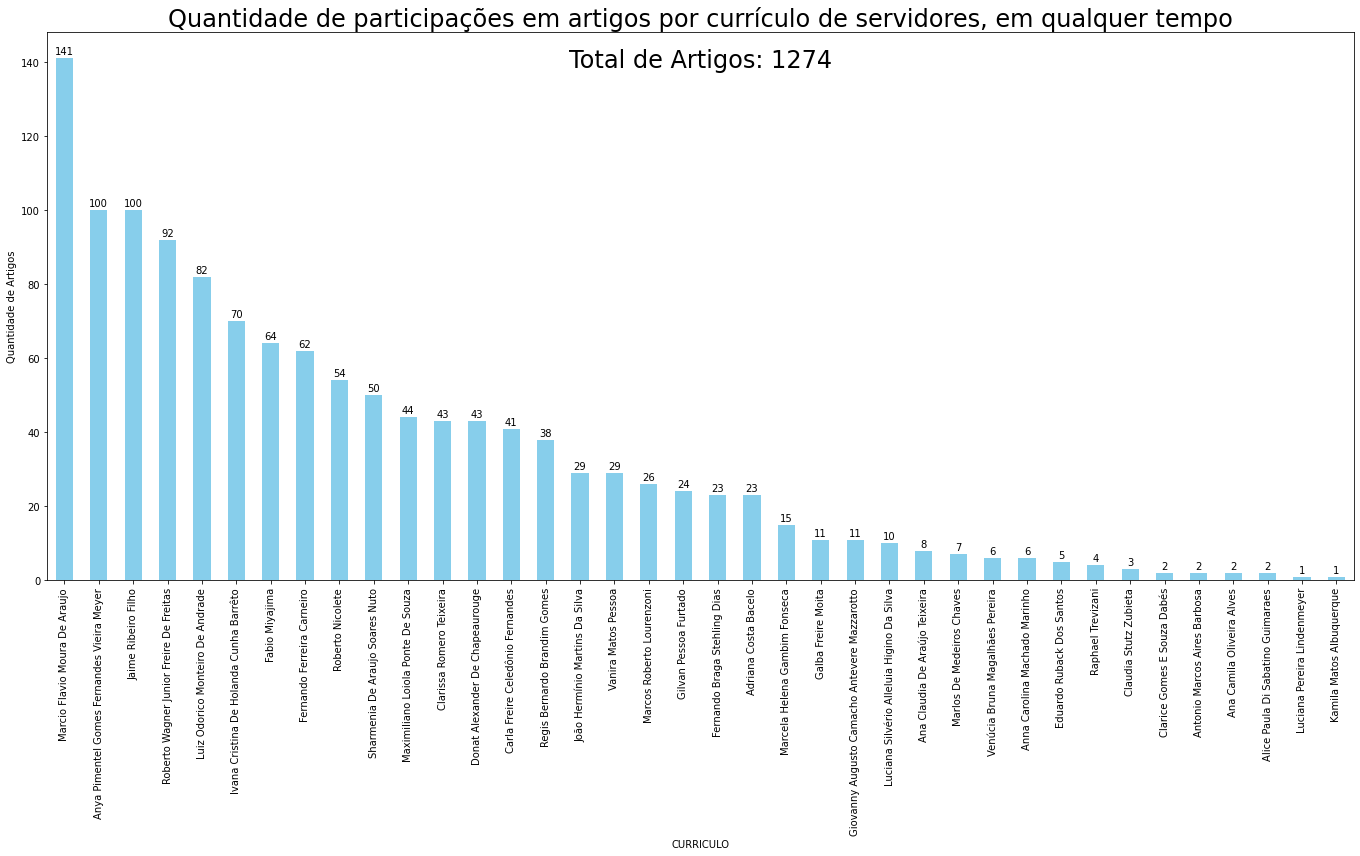

In [136]:
plotbar(df_artigos_servidores)

In [131]:
len(df_artigos_servidores)

1274

# Filtro de datas

In [137]:
fioce_pessoal['INGRESSO_FIOCE'] = pd.to_datetime(fioce_pessoal['INGRESSO_FIOCE'])

# Certificando-se de que 'INGRESSO_FIOCE' é do tipo int (se for data no formato yyyy, por exemplo)
fioce_pessoal['ANO_INGRESSO_FIOCE'] = fioce_pessoal['INGRESSO_FIOCE'].dt.year

# Merge entre df_artigos e fioce_pessoal usando 'AUTORES' e 'NOME' como chaves
merged_df = df_artigos_servidores.merge(fioce_pessoal, left_on='CURRICULO', right_on='NOME', how='inner')

# Filtrar as linhas de acordo com a condição do ano de publicação e da data de ingresso
df_artigos_servidores_ingresso_fioce = merged_df[merged_df['ANO_PUB'] >= merged_df['ANO_INGRESSO_FIOCE']]

# Opcional: Dropar colunas redundantes ou não necessárias, por exemplo, 'NOME' que é igual a 'AUTORES'
# result_df = result_df.drop(columns=['NOME'])

# Agora, result_df é o dataframe final desejado
df_artigos_servidores_ingresso_fioce

ARTIGO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    \
2                                                                                                                                                                                                                                                                                                                                                            Andrezza Graziella Veríssimo Pontes ; SILVA, J. V. ; ARRUDA, C. A. M. ; CARNEIRO, F. F. ; MOREIRA, F. J. F. ; BEZERRA, C. P. ; TEIXEIRA, A. C. A. ; PESSOA, V. M. . NASF-AB no campo das águas: o cuidado em torno do trabalho, ambiente e saúde de famílias agricultoras e pescadoras. TRABALHO, EDUCAÇÃO E SAÚDE (ONLINE), v. 20, p. 01, 2022.   
3                                                                                                                                                                                                                                                                                                                                      CARNEIRO, FERNANDO FERREIRA ; PESSOA, VANIRA MATOS ; TEIXEIRA, ANA CLÁUDIA DE ARAÚJO ; BARBOSA, MARIA IDALICE SILVA ; HOLANDA LAVOR, ANTONIO CARLILE ; SILVA, JURANDI FRUTUOSO . Experiência bem-sucedida no controle do Aedes aegypti sem uso de venenos no sertão cearense. Vigilância Sanitária em Debate: Sociedade, Ciência & Tecnologia, v. 4, p. 126-131, 2016.   
10                                                                                                                                                                                                                                                                                                                                       FURTADO, R. R. ; ALVES, A. C. O. ; LIMA, L.V.R. ; SANTOS, T. V. ; CAMPOS, M. B. ; RAMOS, P. K. S. ; GOMES, C. M. C. ; LAURENTI, M. D. ; DA MATTA, V.L. ; CORBETT, C. E. P. . Visceral Leishmaniasis Urbanization in the Brazilian Amazon Is Supported by Significantly Higher Infection Transmission Rates Than in Rural Area. Microorganisms, v. 10, p. 2188, 2022.   
11                                                                                                                                                                                                                                                               RAMOS, PATRÍCIA KARLA SANTOS ; GONÇALVES, LUCAS PANTOJA ; ALVES, ANA CAMILA OLIVEIRA ; CASSEB, SAMIR MANSOUR ; LIMA, LUCIANA VIEIRA DO RÊGO ; CAMPOS, MARLIANE BATISTA ; VASCONCELOS DOS SANTOS, THIAGO ; SILVEIRA, FERNANDO TOBIAS . Urine qPCR diagnoses over the entire clinical-immunological spectrum of human Leishmania (L.) infantum chagasi-infections in the Brazilian Amazon. PARASITOLOGY INTERNATIONAL, v. 81, p. 102273, 2021.   
12                                                                                                                                                                                                                                                                                                                                                                                          SILVA, M. P. ; Santo, R.S. ; BACELO, A. C. ; ALMEIDA, C. F. ; Cardoso, C ; Simplicio, P. ; COLARES, L. G. T. ; PATRICIA, BRITO . Validación de contenido y aplicación de un instrume

In [139]:
# Define the list of columns you are interested in
selected_columns = ['NOME','MATRÍCULA','ARTIGO', 'ÁREA', 'ANO_PUB', 'ANO_INGRESSO_FIOCE']

# Create a new DataFrame containing only the selected columns
df_servidores_ingresso_fioce = df_artigos_servidores_ingresso_fioce[selected_columns]
df_servidores_ingresso_fioce.rename(columns={'ÁREA': 'SETOR_FIOCE'}, inplace=True)
df_servidores_ingresso_fioce

NOME                             MATRÍCULA  \
2      Ana Claudia De Araújo Teixeira  1165347    
3      Ana Claudia De Araújo Teixeira  1165347    
10          Ana Camila Oliveira Alves  1014947    
11          Ana Camila Oliveira Alves  1014947    
12               Adriana Costa Bacelo  1896774    
...                               ...       ...   
1261              Vanira Matos Pessoa  1992814    
1262              Vanira Matos Pessoa  1992814    
1263              Vanira Matos Pessoa  1992814    
1268  Venúcia Bruna Magalhães Pereira  3121915    
1269  Venúcia Bruna Magalhães Pereira  3121915    

     ARTIGO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    \
2                                                                                                                                                                                                                                                                                                                                                            Andrezza Graziella Veríssimo Pontes ; SILVA, J. V. ; ARRUDA, C. A. M. ; CARNEIRO, F. F. ; MOREIRA, F. J. F. ; BEZERRA, C. P. ; TEIXEIRA, A. C. A. ; PESSOA, V. M. . NASF-AB no campo das águas: o cuidado em torno do trabalho, ambiente e saúde de famílias agricultoras e pescadoras. TRABALHO, EDUCAÇÃO E SAÚDE (ONLINE), v. 20, p. 01, 2022.   
3                                                                                                                                                                                                                                                                                                                                      CARNEIRO, FERNANDO FERREIRA ; PESSOA, VANIRA MATOS ; TEIXEIRA, ANA CLÁUDIA DE ARAÚJO ; BARBOSA, MARIA IDALICE SILVA ; HOLANDA LAVOR, ANTONIO CARLILE ; SILVA, JURANDI FRUTUOSO . Experiência bem-sucedida no controle do Aedes aegypti sem uso de venenos no sertão cearense. Vigilância Sanitária em Debate: Sociedade, Ciência & Tecnologia, v. 4, p. 126-131, 2016.   
10                                                                                                                                                                                                                                                                                                                                       FURTADO, R. R. ; ALVES, A. C. O. ; LIMA, L.V.R. ; SANTOS, T. V. ; CAMPOS, M. B. ; RAMOS, P. K. S. ; GOMES, C. M. C. ; LAURENTI, M. D. ; DA MATTA, V.L. ; CORBETT, C. E. P. . Visceral Leishmaniasis Urbanization in the Brazilian Amazon Is Supported by Significantly Higher Infection Transmission Rates Than in Rural Area. Microorganisms, v. 10, p. 2188, 2022.   
11                                                                                                                                                                                                                                                               RAMOS, PATRÍCIA KARLA SANTOS ; GONÇALVES, LUCAS PANTOJA ; ALVES, ANA CAMILA OLIVEIRA ; CASSEB, SAMIR MANSOUR ; LIMA, LUCIANA VIEIRA DO RÊGO ; CAMPOS, MARLIANE BATISTA ; VASCONCELOS DOS SANTOS, THIAGO ; SILVEIRA, FERNANDO TOBIAS . Urine qPCR diagnoses over the entire clinical-immunological spectrum of human Leishmania (L.) infantum chagasi-infections in the Brazilian Amazon. PA

In [141]:
# Exporting the DataFrame to Excel
df_artigos_servidores_ingresso_fioce.to_excel(pathout+"df_artigos_servidores_ingresso_fioce.xlsx", sheet_name='FiocruzCeara', index=False)
df_artigos_servidores_ingresso_fioce.to_csv(pathout+"df_artigos_servidores_ingresso_fioce.csv", sep='\t', index=False)

## Filtro de datas para recorte mestres/doutores

In [138]:
# fioce_pessoal['INGRESSO_FIOCE'] = pd.to_datetime(fioce_pessoal['INGRESSO_FIOCE'])

# # Certificando-se de que 'INGRESSO_FIOCE' é do tipo int (se for data no formato yyyy, por exemplo)
# fioce_pessoal['ANO_INGRESSO_FIOCE'] = fioce_pessoal['INGRESSO_FIOCE'].dt.year

# # Merge entre df_artigos e fioce_pessoal usando 'AUTORES' e 'NOME' como chaves
# merged_df = df_artigos_doutores_mestres.merge(fioce_pessoal, left_on='CURRICULO', right_on='NOME', how='inner')

# # Filtrar as linhas de acordo com a condição do ano de publicação e da data de ingresso
# df_doutores_mestres_ingresso_fioce = merged_df[merged_df['ANO_PUB'] >= merged_df['ANO_INGRESSO_FIOCE']]

# # Opcional: Dropar colunas redundantes ou não necessárias, por exemplo, 'NOME' que é igual a 'AUTORES'
# # result_df = result_df.drop(columns=['NOME'])

# # Agora, result_df é o dataframe final desejado
# df_doutores_mestres_ingresso_fioce

In [134]:
# df_doutores_mestres_ingresso_fioce.columns

In [140]:
# # Define the list of columns you are interested in
# selected_columns = ['NOME','MATRÍCULA','ARTIGO', 'ÁREA', 'ANO_PUB', 'ANO_INGRESSO_FIOCE']

# # Create a new DataFrame containing only the selected columns
# df_artigos_doutores_mestres = df_artigos_doutores_mestres[selected_columns]
# df_artigos_doutores_mestres.rename(columns={'ÁREA': 'SETOR_FIOCE'}, inplace=True)
# df_artigos_doutores_mestres

In [142]:
# # Exporting the DataFrame to Excel
# df_artigos_doutores_mestres.to_excel(pathout+"df_artigos_doutores_mestres.xlsx", sheet_name='FiocruzCeara', index=False)
# df_artigos_doutores_mestres.to_csv(pathout+"df_artigos_doutores_mestres.csv", sep='\t', index=False)

# Recorte Publicadores

In [ ]:
# # Define the list of columns you are interested in
# selected_columns = ['NOME','MATRÍCULA','ARTIGO', 'ÁREA', 'ANO_PUB', 'ANO_INGRESSO_FIOCE']

# # Create a new DataFrame containing only the selected columns
# filtered_df = result_df[selected_columns]
# filtered_df.rename(columns={'ÁREA': 'SETOR_FIOCE'}, inplace=True)
# filtered_df

In [ ]:
# # Exporting the DataFrame to Excel
# filtered_df.to_excel(pathout+"artigos_desde_ano_ingresso_fiocruz_ceara.xlsx", sheet_name='FiocruzCeara', index=False)
# filtered_df.to_csv(pathout+"artigos_desde_ano_ingresso_fiocruz_ceara.csv", sep='\t', index=False)

In [ ]:
# pd.DataFrame(result_df['ARTIGO'])

In [ ]:
# publicacoes = result_df['ARTIGO'].to_list()
# len(publicacoes)

# Funções de divisão dos detalhes dos artigos

In [143]:
# Padrões de expressão regular
pattern_m01a = r' \. '
pattern_m01b = r' et al. '
pattern_m01c = r' \; '
pattern_m01d = r'\. '
pattern_vol  = r' v\. (\d+)'
pattern_pag  = r' p\. (.*?),'
pattern_ano  = r'\d{4}\.$'

def find_positions(pattern, string):
    return [match.start() for match in re.finditer(pattern, string)]

def find_vol(input_string):
    pattern = r" v\. (\d+)"
    match   = re.search(pattern, input_string)
    try:
        volume = match.group(1)
        return volume, match.start()
    except:
        return ['','']

def find_pag(input_string):
    pattern = r" p\. (.*?),"
    match   = re.search(pattern, input_string)
    try:
        pages = match.group(1)
        return pages, match.start()
    except Exception as e:
        # print(e)
        return ['','']

def find_year(input_string):
    pattern = r'\d{4}\.$'
    match = re.search(pattern, input_string)
    year  = match.group().strip('.')
    return year, match.start()

def find_marker_positions(input_string, markers):
    marker_positions = {}
    for marker in markers:
        position = input_string.find(marker)
        if position != -1:
            marker_positions[position] = marker
    return marker_positions

def find_odd(input_string, marker):
    odds_positions = []
    
    for order, position in enumerate([pos for pos, char in enumerate(input_string) if input_string[pos:pos+len(marker)] == marker], start=1):
        if order % 2 != 0:
            odds_positions.append(position)
    
    return odds_positions

def find_even(input_string, marker):
    evens_positions = []
    
    for order, position in enumerate([pos for pos, char in enumerate(input_string) if input_string[pos:pos+len(marker)] == marker], start=0):
        if order % 2 != 0:
            evens_positions.append(position)
    
    return evens_positions


def split_string_at_positions(input_string, positions):
    substrings = []
    start = 0

    for position in positions:
        substrings.append(input_string[start:position])
        start = position

    substrings.append(input_string[start:])

    return substrings

In [144]:
def split_publication_data(input_string):
    extracted_data = {}
    
    # Extract Year
    try:
        year, year_position = find_year(input_string)
        extracted_data['ANO'] = year
        input_string = input_string[:year_position]
    except Exception as e:
        raise Exception(f"An error occurred while extracting the year: {e}")
    
    # List of patterns in order of priority
    priority_patterns = [pattern_m01a, pattern_m01b, pattern_m01c, pattern_m01d]
    m1_used = None
    p1_end = None

    # Identify m1 following the hierarchical preference
    for pattern in priority_patterns:
        positions = find_positions(pattern, input_string)
        if positions:
            m1_used = pattern
            p1_end = positions[0]
            break

    # User interaction if no m1 marker is found
    if m1_used is None:
        user_marker = input("No marker found for splitting data for m1. Please specify a marker: ")
        positions = find_positions(user_marker, input_string)
        if positions:
            m1_used = user_marker
            p1_end = positions[0]

    p1 = input_string[:p1_end].strip()
    extracted_data['LISTA_AUTORES'] = p1
    # extracted_data['M1_USED'] = m1_used
    
    # Identify m2 for p2 and p3
    p2_end_candidates = [find_vol(input_string)[1], find_pag(input_string)[1]]
    m2_labels = ['vol', 'pag']
    m2_used = None
    p2_end_candidates = [pos for pos in p2_end_candidates if pos is not None and pos != '']
    
    if len(p2_end_candidates) == 0:
        last_dot_space = input_string.rfind('. ')
        if last_dot_space != -1:
            p2_end_candidates.append(last_dot_space)
            m2_used = '. '
        else:
            user_input = input("No suitable marker found for p2 and p3. Specify either 'vol' or 'pag': ")
            p2_end_candidates = find_positions(user_input, input_string)
            m2_used = user_input
    
    else:
        m2_used = m2_labels[p2_end_candidates.index(min(p2_end_candidates))]
    
    p2_end = min(p2_end_candidates)
    p2 = input_string[p1_end:p2_end].lstrip(m1_used).strip()
    extracted_data['ARTIGO_REVISTA'] = p2
    # extracted_data['M2_USED'] = m2_used
    
    p3_start = max(p2_end_candidates)
    p3 = input_string[p3_start:].strip()
    
    volume, _ = find_vol(p3)
    pages, _ = find_pag(p3)
    
    if volume != '':
        extracted_data['VOLUME'] = volume
    if pages != '':
        extracted_data['PAGES'] = pages
    
    return extracted_data

In [148]:
filtro=df_secoes_servidores['ROTULOS']=='Artigos completos publicados em periódicos'
len(df_secoes_servidores[filtro])

38

In [146]:
df_secoes_servidores[filtro]

CURRICULO                                      \
28               Alice Paula Di Sabatino Guimaraes   
79                  Ana Claudia De Araújo Teixeira   
114                      Ana Camila Oliveira Alves   
174                           Adriana Costa Bacelo   
228                  Anna Carolina Machado Marinho   
261                   Antonio Marcos Aires Barbosa   
345     Anya Pimentel Gomes Fernandes Vieira Meyer   
416               Carla Freire Celedônio Fernandes   
468                          Claudia Stutz Zubieta   
500                    Clarice Gomes E Souza Dabés   
531                       Clarissa Romero Teixeira   
550                Donat Alexander De Chapeaurouge   
583                      Eduardo Ruback Dos Santos   
654                                 Fabio Miyajima   
712                   Fernando Braga Stehling Dias   
754                     Fernando Ferreira Carneiro   
869                             Galba Freire Moita   
933   Giovanny Augusto Camacho Antevere Mazzarotto   
969                          Gilvan Pessoa Furtado   
1042       Ivana Cristina De Holanda Cunha Barrêto   
1127                           Jaime Ribeiro Filho   
1178                João Hermínio Martins Da Silva   
1219                      Kamila Matos Albuquerque   
1270                   Luciana Pereira Lindenmeyer   
1300     Luciana Silvério Alleluia Higino Da Silva   
1397              Luiz Odorico Monteiro De Andrade   
1457                 Marcela Helena Gambim Fonseca   
1514                     Marcos Roberto Lourenzoni   
1577                 Marcio Flavio Moura De Araujo   
1652                     Marlos De Medeiros Chaves   
1688             Maximiliano Loiola Ponte De Souza   
1756                             Raphael Trevizani   
1802                  Regis Bernardo Brandim Gomes   
1845                              Roberto Nicolete   
1917       Roberto Wagner Junior Freire De Freitas   
1991               Sharmenia De Araujo Soares Nuto   
2070                           Vanira Matos Pessoa   
2122               Venúcia Bruna Magalhães Pereira   

     ROTULOS                                      \
28    Artigos completos publicados em periódicos   
79    Artigos completos publicados em periódicos   
114   Artigos completos publicados em periódicos   
174   Artigos completos publicados em periódicos   
228   Artigos completos publicados em periódicos   
261   Artigos completos publicados em periódicos   
345   Artigos completos publicados em periódicos   
416   Artigos completos publicados em periódicos   
468   Artigos completos publicados em periódicos   
500   Artigos completos publicados em periódicos   
531   Artigos completos publicados em periódicos   
550   Artigos completos publicados em periódicos   
583   Artigos completos publicados em periódicos   
654   Artigos completos publicados em periódicos   
712   Artigos completos publicados em periódicos   
754   Artigos completos publicados em periódicos   
869   Artigos completos publicados em periódicos   
933   Artigos completos publicados em periódicos   
969   Artigos completos publicados em periódicos   
1042  Artigos completos publicados em periódicos   
1127  Artigos completos publicados em periódicos   
1178  Artigos completos publicados em periódicos   
1219  Artigos completos publicados em periódicos   
1270  Artigos completos publicados em periódicos   
1300  Artigos completos publicados em periódicos   
1397  Artigos completos publicados em periódicos   
1457  Artigos completos publicados em periódicos   
1514  Artigos completos publicados em periódicos   
1577  Artigos completos publicados em periódicos   
1652  Artigos completos publicados em periódicos   
1688  Artigos completos publicados em periódicos   
1756  Artigos completos publicados em periódicos   
1802  Artigos completos publicados em periódicos   
1845  Artigos completos publicados em periódicos   
1917  Artigos completos publicados em periódicos   
1991  Artigos completos pu

In [149]:
df_artigos = montar_publicacoes(df_secoes_servidores)
df_artigos

Total de linhas de dados: 38
Total de nomes de servidores: 47
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Empty DataFrame
Columns: [CURRICULO, AUTORES, TITULO, REVISTA, PUB_ANO, VOLUME, PAGINAS]
Index: []

In [150]:
df_artigos = montar_publicacoes(df_secoes_servidores)

# Converta strings vazias para NaN
df_artigos['PUB_ANO'].replace('', pd.NA, inplace=True)

# Preencha NaN com 0
df_artigos['PUB_ANO'].fillna(0, inplace=True)

# Agora converta a coluna para int
df_artigos['PUB_ANO'] = df_artigos['PUB_ANO'].astype(int)

# Salve o DataFrame
df_artigos.to_csv(pathout+'df_artigos.csv', sep=";", index=False)

Total de linhas de dados: 38
Total de nomes de servidores: 47
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [151]:
df_artigos

Empty DataFrame
Columns: [CURRICULO, AUTORES, TITULO, REVISTA, PUB_ANO, VOLUME, PAGINAS]
Index: []

In [ ]:
# publication_strings = publicacoes
# extracted_data_list = []

# for pub_str in publication_strings:
#     try:
#         extracted_data = split_publication_data(pub_str)
#         extracted_data_list.append(extracted_data)
#     except Exception as e:
#         print(f"An exception occurred: {e}")

# df = pd.DataFrame(extracted_data_list)
# df[:600]

# Montagem do dataframe de dados detalhados de artigos

In [152]:
def find_marker(input_string, preferred_markers, fallback_marker='. '):
    try:
        marker_positions = find_marker_positions(input_string, preferred_markers)
        pos = max(marker_positions)
        marker = marker_positions[pos]
    except:
        marker_positions = find_marker_positions(input_string, [fallback_marker])
        pos = max(marker_positions)
        marker = marker_positions[pos]
    return marker, pos


def extract_authors(authors_str, verbose=False):
    s1a, s1b, s1c, s1d = "; ", ", ", ". ", " "
    count_ptv, count_vrg, count_pnt, count_esp = authors_str.count(s1a), authors_str.count(s1b), authors_str.count(s1c), authors_str.count(s1d)
    
    if count_ptv == 0 and count_vrg != 0:
        sep = s1c
        positions = find_even(authors_str, sep)
        authors = [a.strip() for a in split_string_at_positions(authors_str, positions) if a]
    elif count_ptv != 0 and count_vrg != 0:
        sep = s1a if authors_str.count(s1a) > 1 else s1b
        authors = [a.strip() for a in authors_str.split(sep)]
    else:
        sep = s1b
        authors = [a.strip() for a in authors_str.split(sep)]
    return authors

def extract_info(p02_str, verbose=False):
    title, journal, local = "", "", ""
    m03 = ". "
    str3 = f'\"{m03}\"'
    count = p02_str.count(m03)

    if count == 0:
        title = p02_str.rstrip(',')
    elif count == 1:
        title, journal = p02_str.split(m03)
        journal = journal.rstrip(',')
    elif count == 2:
        title = p02_str.split(m03)[0]
        last_div = p02_str.split(m03)[-1].strip(',')
        if ', ' in last_div:
            if m03 in last_div:
                journal = last_div.split(m03)[-1].split(', ')[0]
            else:
                journal, local = last_div.split(', ')
        else:
            journal = last_div.rstrip('.')
    elif count > 2:
        title = ' '.join(p02_str.split(m03)[:-1])
        last_div = p02_str.split(m03)[-1].strip(',')
        if ', ' in last_div:
            journal, local = last_div.split(', ')
        else:
            journal = last_div

    if verbose:
        print(f'Extracted title: {title}')
        print(f'Extracted journal: {journal}')
        print(f'Extracted local: {local}')

    return title, journal, local

### Testes das funções de separação

In [153]:
def compare_dicts(teste_dict, verbose=False):
    
    try:
        dict2 = parse_string(teste_dict["input"], verbose)
    except Exception as e:
        print('Nenhum separador funcionou bem para o caso:')
        print(e)
        print(teste_dict)
        return -1.0  # Retorna -1.0 em caso de erro

    dict1 = teste_dict["expected_output"]
    indices = len(dict1.keys())
    sucesso = 0
    desvios = 0
    lenght = 75
    for key in dict1.keys() & dict2.keys():  # Intersecção de chaves dos dois dicionários
        if dict1[key] != dict2[key]:
            desvios += 1
            if verbose:
                print('-' * lenght)
                print('FALHOU na divisão de:')
                print(f'Campo "{key}":')
                print(f'   Esperado: {dict1[key]}')
                print(f'     Obtido: {dict2[key]}')
        else:
            if verbose:
                print('-' * lenght)
                print('SUCESSO na divisão de:')
                print(f'Campo "{key}":')
                print(f'   Esperado: {dict1[key]}')
                print(f'     Obtido: {dict2[key]}')
            sucesso += 1
    
    percentual_sucesso = f'{sucesso / indices * 100:.2f}'
    
    return percentual_sucesso


def run_testes(test_dict, verbose=False):
    resultados = {}
    if not isinstance(test_dict, dict):
        print("O parâmetro deve ser um dicionário")
        return resultados
    
    for name, value in test_dict.items():
        result = compare_dicts(value, verbose)
        if result is not None:  # Verifica se o resultado é None
            print(f'Resultado do teste {name}: {result}% de conformidade entre obtido e esperado')
            resultados[name] = float(result)
        else:
            print(f'Falha ao executar o teste {name}')
            
    return resultados

In [154]:
test_dictionary = {
    "t1": {
        'input': "PEREIRA, F. O. ; ARRUA, J. M. M. ; RIBEIRO-FILHO, J. . In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes. MYCOLOGIA, p. 1-10, 2023.",
        'expected_output': {
            'authors': ['PEREIRA, F. O.', 'ARRUA, J. M. M.', 'RIBEIRO-FILHO, J.'],
            'title': 'In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes',
            'journal': 'MYCOLOGIA',
            'local': '',
            'volume': '',
            'page': '1-10',
            'year': '2023'
        }
    },

    "t2": {
        'input':"VIEIRA-MEYER, Anya Pimentel Gomes Fernandes. RAIZES E PONTES NO FORTALECIMENTO DO SUS. Revista da ESP, v. 17, p. e1712, 2023.",
        'expected_output': {
            'authors': ['VIEIRA-MEYER, Anya Pimentel Gomes Fernandes'],
            'title': 'RAIZES E PONTES NO FORTALECIMENTO DO SUS',
            'journal': 'Revista da ESP',
            'local': '',
            'volume': '17',
            'page': 'e1712',
            'year': '2023'
        }
    },

    "t3": {
        'input':"Nicolete, Roberto; Rius, Cristina ; Piqueras, Laura ; Jose, Peter J ; Sorgi, Carlos A ; Soares, Edson G ; Sanz, Maria J ; Faccioli, Lúcia H . Leukotriene B4-loaded microspheres: a new therapeutic strategy to modulate cell activation, v. 9, p. 36, 2008.",
        'expected_output': {
            'authors': ['Nicolete, Roberto', 'Rius, Cristina', 'Piqueras, Laura','Jose, Peter J', 'Sorgi, Carlos A', 'Soares, Edson G', 'Sanz, Maria J', 'Faccioli, Lúcia H'],
            'title': 'Leukotriene B4-loaded microspheres: a new therapeutic strategy to modulate cell activation',
            'journal': '',
            'local': '',
            'volume': '9',
            'page': '36',
            'year': '2008'
        }
    },

    "t4": {
        'input':"TELES, Y. C. F. ; RIBEIRO-FILHO, J. ; BOZZA, Patrícia T. ; AGRA, M. F. ; SIHERI, W. ; IGOLI, J. O. ; GRAY, A. I. ; SOUZA, M. F. V. . Phenolic constituents from (L.) C. Presl. and anti-inflammatory activity of 7,4--di- -methylisoscutellarein. Natural Product Research (Print), p. 1-5, 2015.",
        'expected_output': {
            'authors': ['TELES, Y. C. F.', 'RIBEIRO-FILHO, J.', 'BOZZA, Patrícia T.', 'AGRA, M. F.', 'SIHERI, W.', 'IGOLI, J. O.', 'GRAY, A. I.', 'SOUZA, M. F. V.'],
            'title': 'Phenolic constituents from (L.) C Presl and anti-inflammatory activity of 7,4--di- -methylisoscutellarein',
            'journal': 'Natural Product Research (Print)',
            'local': '',
            'volume': '',
            'page': '1-5',
            'year': '2015'
        }
    },

    "t5": {
        'input':"BILD, N. ; CHAPEAUROUGE, D. A. ; GFELLER, S. ; BIENZ, S. . The [M-1]+ quasi-molecular Ion in Chemical Ionization Mass Spectrometry, Fragmentation of Bis (benzyloxy) silanes by Intramolecular Reactions. Org. Mass Spectrom., v. 27, p. 896-900, 1992.",
        'expected_output': {
            'authors': ['BILD, N.', 'CHAPEAUROUGE, D. A.', 'GFELLER, S.','BIENZ, S.'],
            'title': 'The [M-1]+ quasi-molecular Ion in Chemical Ionization Mass Spectrometry, Fragmentation of Bis (benzyloxy) silanes by Intramolecular Reactions',
            'journal': 'Mass Spectrom',
            'local': '',
            'volume': '27',
            'page': '896-900',
            'year': '1992'
        }
    },

    "t6": {
        'input':"DARUGE, E. ; MIYAJIMA, F. ; PARANHOS, L. R. ; DUZ, S. . Identificação Humana por meio de Superposição de Imagens: Caso Clínico. JBC. Jornal Brasileiro de Clínica & Estética em Odontologia, Curitiba - PR, v. 3, n.Mar/Abr, p. 90-96, 1999.",
        'expected_output': {
            'authors': ['DARUGE, E.', 'MIYAJIMA, F.', 'PARANHOS, L. R.','DUZ, S.'],
            'title': 'Identificação Humana por meio de Superposição de Imagens: Caso Clínico',
            'journal': 'Jornal Brasileiro de Clínica & Estética em Odontologia',
            'local': 'Curitiba - PR',
            'volume': '3',
            'page': '90-96',
            'year': '1999'
        }
    },

    "t7": {
        'input':"SALOMON, TASSILA BUSS, LEWIS F WHITTAKER, CHARLES PRETE, CARLOS A OIKAWA, MARCIO K PEREIRA, RAFAEL HM MOURA, ISABEL CG DELERINO, LUCAS BARRAL-NETTO, MANOEL TAVARES, NATALIA M FRANCA, RAFAEL FO BOAVENTURA, VIVIANE S MIYAJIMA, FABIO MENDRONE-JUNIOR, ALFREDO DE ALMEIDA-NETO, CESAR SALLES, NANCI A FERREIRA, SUZETE C FLADZINSKI, KARINE A DE SOUZA, LUANA M SCHIER, LUCIANE K INOUE, PATRICIA M XABREGAS, LILYANE A CRISPIM, MYUKI AE FRAIJI, NELSON ARAUJO, FERNANDO LV , et al. ; SARS-CoV-2 antibody dynamics in blood donors and COVID-19 epidemiology in eight Brazilian state capitals: A serial cross-sectional study. eLife, v. 11, p. e78233, 2022.",
        'expected_output': {
            'authors': ['SALOMON, TASSILA BUSS, LEWIS F WHITTAKER, CHARLES PRETE, CARLOS A OIKAWA, MARCIO K PEREIRA, RAFAEL HM MOURA, ISABEL CG DELERINO, LUCAS BARRAL-NETTO, MANOEL TAVARES, NATALIA M FRANCA, RAFAEL FO BOAVENTURA, VIVIANE S MIYAJIMA, FABIO MENDRONE-JUNIOR, ALFREDO DE ALMEIDA-NETO, CESAR SALLES, NANCI A FERREIRA, SUZETE C FLADZINSKI, KARINE A DE SOUZA, LUANA M SCHIER, LUCIANE K INOUE, PATRICIA M XABREGAS, LILYANE A CRISPIM, MYUKI AE FRAIJI, NELSON ARAUJO, FERNANDO LV , et al'],
            'title': 'SARS-CoV-2 antibody dynamics in blood donors and COVID-19 epidemiology in eight Brazilian state capitals: A serial cross-sectional study',
            'journal': 'eLife',
            'local': '',
            'volume': '11',
            'page': 'e78233',
            'year': '2022'
        }
    }, 

    "t8": {
        'input':"PEREIRA, F. O. ; ARRUA, J. M. M. ; RIBEIRO-FILHO, J. . In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes. MYCOLOGIA, p. 1-10, 2023.",
        'expected_output': {
            'authors': ['PEREIRA, F. O.', 'ARRUA, J. M. M.', 'RIBEIRO-FILHO, J.'],
            'title': 'In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes',
            'journal': 'MYCOLOGIA',
            'local': '',
            'volume': '',
            'page': '1-10',
            'year': '2023'
        }
    },       

    "t9": {
        'input':"MARTIN, A. L. A. R. ; PEREIRA, R. L. S. ; RIBEIRO-FILHO, J. ; MENEZES, I. R. A. ; COUTINHO, H. D. M. ; FONTELES, M. M. F. . In vitro and in silico evidences about the inhibition of MepA efflux pump by coumarin derivatives. MICROBIAL PATHOGENESIS, p. 106246, 2023.",
        'expected_output': {
            'authors': ['MARTIN, A. L. A. R.', 'PEREIRA, R. L. S.', 'RIBEIRO-FILHO, J.', 'MENEZES, I. R. A.', 'COUTINHO, H. D. M.', 'FONTELES, M. M. F.'],
            'title': 'In vitro and in silico evidences about the inhibition of MepA efflux pump by coumarin derivatives',
            'journal': 'MICROBIAL PATHOGENESIS',
            'local': '',
            'volume': '',
            'page': '106246',
            'year': '2023'
        }
    },

    "t10": {
        'input':"TALKOWSKI, MICHAEL E. MCCANN, KATHLEEN L. CHEN, MICHAEL MCCLAIN, LORA BAMNE, MIKHIL WOOD, JOEL CHOWDARI, KODAVALI V. WATSON, ANNIE PRASAD, KONASALE M. KIROV, GEORGE GEORGIEVA, LYUDMILLA TONCHEVA, DRAGA MANSOUR, HADER LEWIS, DAVID A. OWEN, MICHAEL O'DONOVAN, MICHAEL PAPASAIKAS, PANAGIOTIS SULLIVAN, PATRICK RUDERFER, DOUGLAS YAO, JEFFREY K LEONARD, SHERRY THOMAS, PRAMOD MIYAJIMA, FABIO QUINN, JOHN LOPEZ, A. JAVIER , et al. ; Fine-mapping reveals novel alternative splicing of the dopamine transporter. American Journal of Medical Genetics. Part B, Neuropsychiatric Genetics, v. 153B, p. 1434-1447, 2010.",
        'expected_output': {
            'authors': ["TALKOWSKI, MICHAEL E. MCCANN, KATHLEEN L. CHEN, MICHAEL MCCLAIN, LORA BAMNE, MIKHIL WOOD, JOEL CHOWDARI, KODAVALI V. WATSON, ANNIE PRASAD, KONASALE M. KIROV, GEORGE GEORGIEVA, LYUDMILLA TONCHEVA, DRAGA MANSOUR, HADER LEWIS, DAVID A. OWEN, MICHAEL O'DONOVAN, MICHAEL PAPASAIKAS, PANAGIOTIS SULLIVAN, PATRICK RUDERFER, DOUGLAS YAO, JEFFREY K LEONARD, SHERRY THOMAS, PRAMOD MIYAJIMA, FABIO QUINN, JOHN LOPEZ, A. JAVIER , et al"],
            'title': 'Fine-mapping reveals novel alternative splicing of the dopamine transporter',
            'journal': 'American Journal of Medical Genetics. Part B, Neuropsychiatric Genetics',
            'local': '',
            'volume': '153B',
            'page': '1434-1447',
            'year': '2010'
        }
    },

    "t11": {
        'input':"DA SILVA, LUCAS YURE SANTOS ; PAULO, CICERA LAURA ROQUE ; MOURA, TALYSSON FELISMINO ; ALVES, DANIEL SAMPAIO ; PESSOA, RENATA TORRES ; ARAÚJO, ISAAC MOURA ; DE MORAIS OLIVEIRA-TINTINO, CÍCERA DATIANE ; TINTINO, SAULO RELISON ; NONATO, CARLA DE FATIMA ALVES ; DA COSTA, JOSÉ GALBERTO MARTINS ; RIBEIRO-FILHO, JAIME ; COUTINHO, HENRIQUE DOUGLAS MELO ; KOWALSKA, GRA'YNA ; MITURA, PRZEMYS'AW ; BAR, MAREK ; KOWALSKI, RADOS'AW ; MENEZES, IRWIN ROSE ALENCAR DE . Antibacterial Activity of the Essential Oil of Piper tuberculatum Jacq. Fruits against Multidrug-Resistant Strains: Inhibition of Efflux Pumps and β-Lactamase. PLANTS, v. 12, p. 2377, 2023.",
        'expected_output': {
            'authors': ["DA SILVA, LUCAS YURE SANTOS ; PAULO, CICERA LAURA ROQUE ; MOURA, TALYSSON FELISMINO ; ALVES, DANIEL SAMPAIO ; PESSOA, RENATA TORRES ; ARAÚJO, ISAAC MOURA ; DE MORAIS OLIVEIRA-TINTINO, CÍCERA DATIANE ; TINTINO, SAULO RELISON ; NONATO, CARLA DE FATIMA ALVES ; DA COSTA, JOSÉ GALBERTO MARTINS ; RIBEIRO-FILHO, JAIME ; COUTINHO, HENRIQUE DOUGLAS MELO ; KOWALSKA, GRA'YNA ; MITURA, PRZEMYS'AW ; BAR, MAREK ; KOWALSKI, RADOS'AW ; MENEZES, IRWIN ROSE ALENCAR DE"],
            'title': 'Antibacterial Activity of the Essential Oil of Piper tuberculatum Jacq. Fruits against Multidrug-Resistant Strains: Inhibition of Efflux Pumps and β-Lactamase',
            'journal': 'PLANTS',
            'local': '',
            'volume': '12',
            'page': '2377',
            'year': '2023'
        }
    },

    "t12": {
        'input':"MIYAJIMA, F.; OLLIER, W. ; MAYES, A. ; JACKSON, A. ; THACKER, N. ; RABBITT, P. ; Pendleton, N. ; HORAN, M. ; PAYTON, A. . Brain-derived neurotrophic factor polymorphism Val66Met influences cognitive abilities in the elderly. GENES, BRAIN AND BEHAVIOR (ONLINE), v. ON, p. 31/10/2007, 2007.",
        'expected_output': {
            'authors': ["MIYAJIMA, F.; OLLIER, W. ; MAYES, A. ; JACKSON, A. ; THACKER, N. ; RABBITT, P. ; Pendleton, N. ; HORAN, M. ; PAYTON, A"],
            'title': 'Brain-derived neurotrophic factor polymorphism Val66Met influences cognitive abilities in the elderly',
            'journal': 'GENES, BRAIN AND BEHAVIOR (ONLINE)',
            'local': '',
            'volume': 'ON',
            'page': '31/10/2007',
            'year': '2007'
        }
    },

    "t13": {
        'input':"MIYAJIMA, F.; LIMA, V. P. . Exames em DNA: a superestimação da inovação. Revista de Direito (Itatiba), Leme - SP, v. 1, n.2002, p. 63-65, 2002.",
        'expected_output': {
            'authors': ["MIYAJIMA, F.; LIMA, V. P."],
            'title': 'Exames em DNA: a superestimação da inovação',
            'journal': 'Revista de Direito (Itatiba)',
            'local': 'Leme - SP',
            'volume': '1',
            'page': '63-65',
            'year': '2002'
        }
    },                  
}

In [155]:
run_testes(test_dictionary)

Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
{'input': 'PEREIRA, F. O. ; ARRUA, J. M. M. ; RIBEIRO-FILHO, J. . In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes. MYCOLOGIA, p. 1-10, 2023.', 'expected_output': {'authors': ['PEREIRA, F. O.', 'ARRUA, J. M. M.', 'RIBEIRO-FILHO, J.'], 'title': 'In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes', 'journal': 'MYCOLOGIA', 'local': '', 'volume': '', 'page': '1-10', 'year': '2023'}}
Resultado do teste t1: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
{'input': 'VIEIRA-MEYER, Anya Pimentel Gomes Fernandes. RAIZES E PONTES NO FORTALECIMENTO DO SUS. Revista da ESP, v. 17, p. e1712, 2023.', 'expected_output': {'authors': ['VIEIRA-MEYER, Anya Pimentel Gomes Fernandes'], 'title': 'RAIZES E PONTES NO FORTALECIMENTO DO SUS',

{'t1': -1.0,
 't2': -1.0,
 't3': -1.0,
 't4': -1.0,
 't5': -1.0,
 't6': -1.0,
 't7': -1.0,
 't8': -1.0,
 't9': -1.0,
 't10': -1.0,
 't11': -1.0,
 't12': -1.0,
 't13': -1.0}

In [156]:
# Executa todos os testes e armazena os resultados em 'resultados_todos_testes'
resultados_todos_testes = run_testes(test_dictionary)

# Filtra os testes que não atingiram 100% de conformidade
testes_filtrados = {k: v for k, v in resultados_todos_testes.items() if v < 100.0}

# Exibe os testes filtrados
print("Testes com menos de 100% de conformidade:", testes_filtrados)

Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
{'input': 'PEREIRA, F. O. ; ARRUA, J. M. M. ; RIBEIRO-FILHO, J. . In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes. MYCOLOGIA, p. 1-10, 2023.', 'expected_output': {'authors': ['PEREIRA, F. O.', 'ARRUA, J. M. M.', 'RIBEIRO-FILHO, J.'], 'title': 'In vitro and ex vivo antibiofilm activity of riparin 1, and its nor and dinor homologs, against dermatophytes', 'journal': 'MYCOLOGIA', 'local': '', 'volume': '', 'page': '1-10', 'year': '2023'}}
Resultado do teste t1: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
{'input': 'VIEIRA-MEYER, Anya Pimentel Gomes Fernandes. RAIZES E PONTES NO FORTALECIMENTO DO SUS. Revista da ESP, v. 17, p. e1712, 2023.', 'expected_output': {'authors': ['VIEIRA-MEYER, Anya Pimentel Gomes Fernandes'], 'title': 'RAIZES E PONTES NO FORTALECIMENTO DO SUS',

In [157]:
run_testes(testes_filtrados, True)

Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t1: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t2: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t3: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t4: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t5: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.0
Resultado do teste t6: -1.0% de conformidade entre obtido e esperado
Nenhum separador funcionou bem para o caso:
name 'parse_string' is not defined
-1.

{'t1': -1.0,
 't2': -1.0,
 't3': -1.0,
 't4': -1.0,
 't5': -1.0,
 't6': -1.0,
 't7': -1.0,
 't8': -1.0,
 't9': -1.0,
 't10': -1.0,
 't11': -1.0,
 't12': -1.0,
 't13': -1.0}

In [158]:
input_excecao = "SALOMON, TASSILA BUSS, LEWIS F WHITTAKER, CHARLES PRETE, CARLOS A OIKAWA, MARCIO K PEREIRA, RAFAEL HM MOURA, ISABEL CG DELERINO, LUCAS BARRAL-NETTO, MANOEL TAVARES, NATALIA M FRANCA, RAFAEL FO BOAVENTURA, VIVIANE S MIYAJIMA, FABIO MENDRONE-JUNIOR, ALFREDO DE ALMEIDA-NETO, CESAR SALLES, NANCI A FERREIRA, SUZETE C FLADZINSKI, KARINE A DE SOUZA, LUANA M SCHIER, LUCIANE K INOUE, PATRICIA M XABREGAS, LILYANE A CRISPIM, MYUKI AE FRAIJI, NELSON ARAUJO, FERNANDO LV , et al. ; SARS-CoV-2 antibody dynamics in blood donors and COVID-19 epidemiology in eight Brazilian state capitals: A serial cross-sectional study. eLife, v. 11, p. e78233, 2022."

run_testes([t7])

NameError: name 't7' is not defined

In [159]:
df_artigos = montar_publicacoes(df_artigos_servidores_ingresso_fioce)
df_artigos

AttributeError: 'DataFrame' object has no attribute 'ROTULOS'

In [160]:

# Converta strings vazias para NaN
df_artigos['PUB_ANO'].replace('', pd.NA, inplace=True)

# Preencha NaN com 0
df_artigos['PUB_ANO'].fillna(0, inplace=True)

# Agora converta a coluna para int
df_artigos['PUB_ANO'] = df_artigos['PUB_ANO'].astype(int)

# Salve o DataFrame
df_artigos.to_csv(pathout+'df_artigos.csv', sep=";", index=False)

In [161]:
df_servidores_ingresso_fioce.keys()

Index(['NOME', 'MATRÍCULA', 'ARTIGO', 'SETOR_FIOCE', 'ANO_PUB',
       'ANO_INGRESSO_FIOCE'],
      dtype='object')

In [162]:
# for m,i in enumerate(df_secoes_publicadores['CURRICULO'].unique()):
#     if i not in df_artigos['CURRICULO'].unique():
#         print(f'Não encontrado nome de: "{i}" na lista e artigos montados')

In [163]:
# df_artigos[df_artigos['TITULO'] == '']

In [164]:
# df_artigos[600:1200]

## Montar lista específica de nomes para extrair dados do Lattes

In [165]:
# lista_busca=[]
# for i in lista_servidores_doutores:
#     if i != 'Raphael Trevizani Roque De Oliveira':
#         lista_busca.append(i)
#     else:
#         lista_busca.append('Raphael Trevizani')

# lista_busca.sort()
# # Salvar lista de servidores em arquivo CSV
# with open(pathcsv+'lista_servidores-fioce.csv', 'w', newline='') as arquivo:
#     escritor = csv.writer(arquivo)
#     for item in lista_busca:
#         escritor.writerow([item])

# # Criar lista de busca com interesse de pesquisa
# retirar = ['Carlos Jose Araujo Pinheiro', 'Charles Cerqueira De Abreu', 'Dayane Alves Costa',
#            'Ezequiel Valentim De Melo','João Baptista Estabile Neto','Luciano Pinto Zorzanelli',
#            'Luciana Coelho Serafim', 'Nilton Luiz Costa Machado','Renato Caldeira De Souza',
#            'Sergio Dos Santos Reis']

# lista_busca = [item for item in lista_busca if item not in retirar]
# with open(pathcsv+'lista_lattes-fioce.csv', 'w', newline='') as arquivo:
#     escritor = csv.writer(arquivo)
#     for item in lista_busca:
#         escritor.writerow([item])

# # Ler do arquivo CSV salvo para dataframe
# df_busca = pd.read_csv(pathcsv+'lista_lattes-fioce.csv', header=None)
# df_busca.columns = ['SERVIDORES_FIOCE']
# print(f'{len(df_busca.index)} currículos a extrair')

## Extração visando avaliar edital FUNCAP

In [166]:
# import pandas as pd

# ## Arquivos fontes para orientadores FUNCAP
# arquivo_qualis     = 'classificações_publicadas_todas_as_areas_avaliacao1672761192111.csv'
# lista_orientadores = pd.read_csv(pathcsv+'lista_orientadores.csv')

# lista_busca = lista_orientadores['ORIENTADOR'].unique()
# lista_busca.sort()
# print(f'Total de pesquisadores a extrair: {len(lista_orientadores[1:])}')
# for i in lista_busca:
#     print('    ',i)

In [167]:
def extrair_artigos(lista_nomes, mestres=True, assunto=False):
    '''Extrai todas as informações brutas de publicações (artigos e livros) de cada currículo da Plataforma Lattes do CNPQ
     Recebe: Um nome a ser buscado na base do currículo Lattes
    Utiliza: Funções: definir_filtros(), montar_dfcolab_linhas()
    Retorna: Três dataframes: df_identificacao com dados da identificação; df_dados com dados de todas produções; e df_colabartigos com dados das colaborações em artigos
    Autor: Marcos Aires (Jan 2022)
    '''
    import time
    from datetime import date
    
    # print(f'Iniciada extração de {len(lista_nomes)} currículos')
    t0=time.time()
    
    ## INÍCIO DO SCRIPT DE RASPAGEM DA PÁGINA HTML DO CURRÍCULO LATTES
    ## https://www.selenium.dev/documentation/pt-br/webdriver/browser_manipulation/
    options   = Options()
    # options.add_argument("--headless")
    browser   = webdriver.Chrome(options=options)
    url_buscaespecialista = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=false&textoBusca='
    browser.get(url_buscaespecialista) # acessa a url de busca do CNPQ   
    # browser.set_window_position(2100, 0)
    # browser.set_window_size(1096, 1896)
    # browser.maximize_window()
    
    browser.set_window_position(-20, -10)
    size          = browser.get_window_size()
    width1        = size.get("width")
    height1       = size.get("height")
    browser.set_window_size(170, 1896)
    browser.mouse = webdriver.ActionChains(browser)
    
    delay   = 10  # seconds 
    buscas        = []
    resultados    = []
    
    df_dados          = pd.DataFrame()   
    rotulos           = []
    conteudos         = []
    parcial_rotulos   = []
    parcial_conteudos = []
    sucesso           = []
    falhas            = []
    impactos = []
    linhas_dados = []
    artigos = []

    df_parcial = pd.DataFrame({     
            'NOMES': pd.Series(sucesso),
            'ROTULOS': pd.Series(rotulos),
            'CONTEUDOS': pd.Series(conteudos),                    
        })

    t1=time.time()
    print(tempo(t0,t1), 'Tempo de conexão ao servidor do CNPq')
    time.sleep(0.00001)

    count=0
    for NOME in lista_nomes:
        print('-'*100)
        count+=1
        t2       = time.time()
        tdec     = np.round(t2-t0,2)
        restante = len(lista_nomes)-count
        print(f'Extraindo currículo {count}/{len(lista_nomes)}. Resta {restante}. Decorrido:{horas(tdec)}. Previsão de término em {horas(np.round(tdec/count,0)*(restante+1))}')
        
        # Definir filtros para busca de nomes
        definir_filtros(browser, mestres, assunto)
        preencher_busca(browser, delay, NOME)      
        window_before  = browser.current_window_handle
        limite=5
        ## Clicar no botão abrir currículo e mudar de aba
        try:
            ## Aguarda, encontra, clica em buscar nome
            link_nome    = achar_busca(browser, delay)
            nome_buscado = []
            nome_achado  = []
            nome_buscado.append(NOME)
            
            if link_nome.text == None:
                xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
                # 'Stale file handle'
                print('Ainda sem resposta do servidor, tentando novamente...')
                retry(WebDriverWait(browser, delay).until(
                    EC.element_to_be_clickable((By.XPATH, xpath_nome))),
                #    expected_ex_type=ZeroDivisionError, 
                   wait_ms=200,
                   limit=limite, 
                #    logger=logger, 
                   on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))
            try:
                ActionChains(browser).click(link_nome).perform()
                nome_achado.append(link_nome.text)
            except:
                print(f'Currículo não encontrado para: {NOME}.')
                return
            
            retry(WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo"))),
                #    expected_ex_type=ZeroDivisionError, 
                   wait_ms=200,
                   limit=limite, 
                #    logger=logger, 
                   on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   
            
            btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
            time.sleep(0.2)
            ActionChains(browser).click(btn_abrir_curriculo).perform()

            ## Gerenciamento das janelas abertas no browser
            WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))
            window_after = browser.window_handles
            new_window   = [x for x in window_after if x != window_before][0]
            browser.switch_to.window(new_window)
            
        except Exception as e:
            print('Erro',e)
            print('Tentando nova requisição ao servidor')
            time.sleep(1)
            btn_abrir_curriculo = WebDriverWait(browser, delay).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
            ActionChains(browser).click(btn_abrir_curriculo).perform()
            WebDriverWait(browser, delay).until(EC.number_of_windows_to_be(2))

            ## Gerenciamento das janelas abertas no browser
            window_after = browser.window_handles
            new_window   = [x for x in window_after if x != window_before][0]
            browser.switch_to.window(new_window)
            time.sleep(1)

        t3=time.time()

        ## O objeto elementos_id abaixo é uma lista de elementos onde as informações de identificação estão contidas
        # acessado através do marcador xpath='//div[@class="infpessoa"]' no HTML para extrair de cada pesquisador
        time.sleep(1)
        xpath='//div[@class="infpessoa"]'
        WebDriverWait(browser, delay).until(
                EC.presence_of_element_located((By.XPATH, xpath)))
        elementos_id = browser.find_elements(By.XPATH, xpath)

        # Fazer com que a primeira informação para cada pesquisador seja o caminho para sua foto e dados de identificação
        try:
            css_selector='.foto'
            link_foto=WebDriverWait(browser, delay).until(
                EC.visibility_of_element_located((By.CSS_SELECTOR, ".foto"))).get_attribute("src")
            rotulos.append('Link Foto:')
            conteudos.append(link_foto)            

        except Exception as e:
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print('  !!Erro ao extrair imagem do currículo:',e,'\n', traceback_str)

        for i in range(len(elementos_id)):
            dados = elementos_id[i].text.split('\n')
            for i in range(len(dados)):
                if i==0:
                    rotulos.append('Nome completo:')
                    conteudos.append(dados[i])
                elif 'Bolsista' in dados[i]:
                    rotulos.append('Bolsista CNPq:')
                    conteudos.append(dados[i])
                elif 'Endereço para acessar este CV: ' in dados[i]:
                    rotulos.append('Link Currículo:')
                    conteudos.append(dados[i].strip('Endereço para acessar este CV: '))
                elif 'ID Lattes: ' in dados[i]:
                    rotulos.append('ID Lattes:')
                    conteudos.append(dados[i].strip('ID Lattes: '))
                elif 'Última atualização do currículo em ' in dados[i]:
                    rotulos.append('Data atualização:')
                    conteudos.append(dados[i].strip('Última atualização do currículo em '))
                    dt_atualizacao = dados[i].strip('Última atualização do currículo em ')
                    dtt = datetime.strptime(dt_atualizacao, '%d/%m/%Y').date()
                    defasagem = (date.today()-dtt).days        

        try: 
            df_temp =pd.DataFrame({
                'ROTULOS': pd.Series(rotulos),
                'CONTEUDOS': pd.Series(conteudos),
                    })
            filtro    = 'Link Foto:'
            fotos     = df_temp[(df_temp.ROTULOS == filtro)]['CONTEUDOS']
            x         = fotos[-1:].index[0]
            df_temp.drop(columns=['ROTULOS'], inplace=True)

            try:
                foto = HTML(df_temp[x:x+1].to_html(escape=False, formatters=dict(CONTEUDOS=path_to_image_html)))
                display(foto)
                print(f'Atualizado em {dt_atualizacao} há {defasagem:>2} dias | {NOME}')    
                

            except TimeoutException as t:
                print('Demora na conexão com servidor, carregamento da foto cancelado')
                traceback_str = ''.join(traceback.format_tb(t.__traceback__))
            
        except Exception as e:
            print('Erro ao extrair a foto do pesquisador')
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(e,traceback_str)
        
        t4=time.time() 

        ## TRECHO PARA EXTRAIR DADOS DOS ARTIGOS
        try:    
            page_source = browser.page_source
            soup = BeautifulSoup(page_source, 'html.parser')
            print(len(soup.text))
            info_spans = soup.find_all('span', class_='informacao-artigo')
            for span in info_spans:
                linhas_dados.append(span.text)
            artigos.append(linhas_dados)

            ## Fechar janela do currículo
            browser.close()            
            
            ## Gerenciamento das janelas abertas no browser
            todas_janelas = browser.window_handles
            browser.switch_to.window(todas_janelas[0])

            ## Fechar a janela pop-up
            close_popup = WebDriverWait(browser, delay).until(
                EC.element_to_be_clickable((By.XPATH, "//*[@id='idbtnfechar']")))
            close_popup.click()
            
            # ## Nova Consulta
            # try:
            #     nova_consulta = WebDriverWait(browser, delay).until(
            #         EC.element_to_be_clickable((By.XPATH, "//*[@id='botaoBuscaFiltros']")))
            #     nova_consulta.click()
            #     time.sleep(1)

            except Exception as e:
                print('Erro ao reiniciar consulta')
                traceback_str = ''.join(traceback.format_tb(e.__traceback__))
                print(e,traceback_str) 
            
            t5=time.time()                       

            # print(f' {tempo(t0,t5)} | Tempo de Acesso |  Identificação |   Dados Brutos | Subtotal Tempo | Acumulado')
            # print(f'  Decorrido  |   {tempo(t2,t3)}   |  {tempo(t3,t4)}   |  {tempo(t4,t5)}   |  {tempo(t2,t5)}   | {len(conteudos)} seções')
            
            sucesso.append(NOME)
            
        except Exception as e:
            print('Erro ao montar dataframe dados de artigos')
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(e,traceback_str)    
            browser.quit()
            
            return df_dados
    
    # df_dados =pd.DataFrame({
    #     'ROTULOS': pd.Series(rotulos),
    #     'CONTEUDOS': pd.Series(conteudos),
    #         })
    
    t6=time.time()
    print('='*95)
    # print(f' {len(sucesso)} currículos extraídos com sucesso')
    print(f' Tempo total para extrair {len(artigos)} artigos dos currículos: {tempo(t0,t6)}')
    # print('='*95)
    browser.quit()
    
    # return df_dados, sucesso, parcial_rotulos, parcial_conteudos
    return pd.DataFrame(artigos)

SyntaxError: invalid syntax (<ipython-input-167-be838ccb4e26>, line 231)

In [168]:
## Arquivos fontes para orientadores FUNCAP:
# arquivo_qualis     = 'classificações_publicadas_todas_as_areas_avaliacao1672761192111.csv'
# lista_orientadores = pd.read_csv(pathcsv+'lista_orientadores.csv')

# lista_busca = lista_orientadores['ORIENTADOR'].unique()
# lista_busca.sort()
# print(f'Total de pesquisadores a extrair: {len(lista_orientadores[1:])}')
# for i in lista_busca:
#     print('    ',i)

In [169]:
# dados_artigos = extrair_artigos(lista_busca[0:1])
# for i in dados_artigos.values:
#     print(type(i))

In [170]:
# for i in dados_artigos.values:
#     c=0
#     for n,j in enumerate(i):
#         c+=1
#         if c==1:
#             print(j)

In [171]:
# dados_artigos

### Funções padronização de strings e remoção de variantes

In [172]:
## PADRONIZAÇÃO DE NOMES DE AUTOR E ANÁLISE DE SIMILARIDADES
def padronizar_nome(linha_texto):
    '''Procura sobrenomes e abreviaturas e monta nome completo
     Recebe: String com todos os sobrenomes e nomes, abreviados ou não
    Retorna: Nome completo no formato padronizado em SOBRENOME AGNOME, Prenomes
      Autor: Marcos Aires (Mar.2022)
    '''
    import unicodedata
    import re
    # print('               Analisando:',linha_texto)
    string = ''.join(ch for ch in unicodedata.normalize('NFKD', linha_texto) if not unicodedata.combining(ch))
    string = string.replace('(Org)','').replace('(Org.)','').replace('(Org).','').replace('.','').replace('\'','')
    string = string.replace(',,,',',').replace(',,',',')
    string = re.sub(r'[0-9]+', '', string)
        
    # Expressões regulares para encontrar padrões de divisão de nomes de autores
    sobrenome_inicio   = re.compile(r'^[A-ZÀ-ú-a-z]+,')                  # Sequência de letras maiúsculas no início da string
    sobrenome_composto = re.compile(r'^[A-ZÀ-ú-a-z]+[ ][A-ZÀ-ú-a-z]+,')  # Duas sequências de letras no início da string, separadas por espaço, seguidas por vírgula
    letra_abrevponto   = re.compile(r'^[A-Z][.]')                        # Uma letra maiúscula no início da string, seguida por ponto
    letra_abrevespaco  = re.compile(r'^[A-Z][ ]')                        # Uma letra maiúscula no início da string, seguida por espaço
    letras_dobradas    = re.compile(r'[A-Z]{2}')                         # Duas letras maiúsculas juntas no início da string, seguida por espaço
    letras_dobradasini = re.compile(r'[A-Z]{2}[ ]')                      # Duas letras maiúsculas juntas no início da string, seguida por espaço
    letras_dobradasfim = re.compile(r'[ ][A-Z]{2}')                      # Duas letras maiúsculas juntas no final da string, precedida por espaço
    letras_duasconsnts = re.compile(r'[B-DF-HJ-NP-TV-XZ]{2}')            # Duas Letras maiúsculas e consoantes juntas
    letras_tresconsnts = re.compile(r'[B-DF-HJ-NP-TV-XZ]{3}')            # Três Letras maiúsculas e consoantes juntas
    
    # Agnomes e preprosições a tratar, agnomes vão maiúsculas para sobrenome e preposições vão para minúsculas nos nomes
    nomes=[]
    agnomes       = ['NETO','JUNIOR','FILHO','SEGUNDO','TERCEIRO']
    preposicoes   = ['da','de','do','das','dos']
    nome_completo = ''
    
    # Ajustar lista de termos, identificar sobrenomes compostos e ajustar sobrenome com ou sem presença de vírgula
    div_sobrenome      = sobrenome_inicio.findall(string)
    div_sbrcomposto    = sobrenome_composto.findall(string)
    
    # print('-'*100)
    # print('                 Recebido:',string)
    
    # Caso haja vírgulas na string, tratar sobrenomes e sobrenomes compostos
    if div_sobrenome != [] or div_sbrcomposto != []:
        # print('CASO_01: Há víruglas na string')
        div = string.split(', ')
        sobrenome     = div[0].strip().upper()
        try:
            div_espaco    = div[1].split(' ')
        except:
            div_espaco    = ['']
        primeiro      = div_espaco[0].strip('.')
        
        # print('     Dividir por vírgulas:',div)
        # print('      Primeira DivVirgula:',sobrenome)
        # print('Segunda DivVrg/DivEspaços:',div_espaco)
        # print('      Primeira DivEspaços:',primeiro)
               
        # Caso primeiro nome sejam somente duas letras maiúsculas juntas, trata-se de duas iniciais
        if len(primeiro)==2 or letras_tresconsnts.findall(primeiro):
            # print('CASO_01.a: Há duas letras ou três letras consoantes juntas, são iniciais')
            primeiro_nome=primeiro[0].strip()
            # print('          C01.a1_PrimNome:',primeiro_nome)
            nomes.append(primeiro[1].strip().upper())
            try:
                nomes.append(primeiro[2].strip().upper())
            except:
                pass
        else:
            # print('CASO_01.b: Primeiro nome maior que 2 caracteres')
            primeiro_nome = div_espaco[0].strip().title()
            # print('          C01.a2_PrimNome:',primeiro_nome)
        
        # Montagem da lista de nomes do meio
        for nome in div_espaco:
            # print('CASO_01.c: Para cada nome da divisão por espaços após divisão por vírgula')
            if nome not in nomes and nome.lower()!=primeiro_nome.lower() and nome.lower() not in primeiro_nome.lower() and nome!=sobrenome:   
                # print('CASO_01.c1: Se o nome não está nem como primeiro nome, nem sobrenomes')
                # print(nome, len(nome))
                
                # Avaliar se é abreviatura seguida de ponto e remover o ponto
                if len(nome)<=2 and nome.lower() not in preposicoes:
                    # print('    C01.c1.1_Nome<=02:',nome)
                    for inicial in nome:
                        # print(inicial)
                        if inicial not in nomes and inicial not in primeiro_nome:
                            nomes.append(inicial.replace('.','').strip().title())
                elif len(nome)==3 and nome.lower() not in preposicoes:
                        # print('    C01.c1.2_Nome==03:',nome)
                        for inicial in nome:
                            if inicial not in nomes and inicial not in primeiro_nome:
                                nomes.append(inicial.replace('.','').strip().title())
                else:
                    if nome not in nomes and nome!=primeiro_nome and nome!=sobrenome and nome!='':
                        if nome.lower() in preposicoes:
                            nomes.append(nome.replace('.','').strip().lower())
                        else:
                            nomes.append(nome.replace('.','').strip().title())
                        # print(nome,'|',primeiro_nome)
                        
        #caso haja sobrenome composto que não esteja nos agnomes considerar somente primeiro como sobrenome
        if div_sbrcomposto !=[] and sobrenome.split(' ')[1] not in agnomes and sobrenome.split(' ')[0].lower() not in preposicoes:
            # print('CASO_01.d: Sobrenome composto sem agnomes')
            # print(div_sbrcomposto)
            # print('Sobrenome composto:',sobrenome)
            
            nomes.append(sobrenome.split(' ')[1].title())
            sobrenome = sobrenome.split(' ')[0].upper()
            # print('Sobrenome:',sobrenome)
            
            for i in nomes:
                if i.lower() in sobrenome.lower():
                    nomes.remove(i)
            # print('    Nomes:',nomes)
        
        #caso haja preposição como agnome desconsiderar e passar para final dos nomes
        if div_sbrcomposto !=[] and sobrenome.split(' ')[0].lower() in preposicoes:
            # print('CASO_01.e: Preposição no Sobrenome passar para o final dos nomes')
            # print('   div_sbrcomposto:', div_sbrcomposto)
            # print('Sobrenome composto:',div_sbrcomposto)
            
            nomes.append(div_sbrcomposto[0].split(' ')[0].lower())
            # print('    Nomes:',nomes)
            sobrenome = div_sbrcomposto[0].split(' ')[1].upper().strip(',')
            # print('Sobrenome:',sobrenome)
            
            for i in nomes:
                # print('CASO_01.e1: Para cada nome avaliar se o sobrenome está na lista')
                if i.lower() in sobrenome.lower():
                    nomes.remove(i)
            # print('  Nomes:',nomes)
        
        # print('Ao final do Caso 01')
        # print('    Sobrenome com vírgula:',sobrenome, len(sobrenome),'letras')
        # print('Primeiro nome com vírgula:',primeiro_nome, len(primeiro_nome),'letras')
        # print('           Lista de nomes:',nomes, len(nomes),'nomes')
        
    # Caso não haja vírgulas na string considera sobrenome o último nome da string dividida com espaço vazio
    else:
        # print('CASO_02: Não há víruglas na string')
        try:
            div = string.split(' ')
            # print('      Divisões por espaço:',div)
            
            if div[-1] in agnomes: # nome final é um agnome
                sobrenome     = div[-2].upper().strip()+' '+div[-1].upper().strip()
                for i in div[1:-2]:
                    if i not in sobrenome and i not in preposicoes:
                        nomes.append(i.title().strip())
                    if i in preposicoes:
                        nomes.append(i.lower().strip())
            else:
                if len(div[-1]) > 2:
                    sobrenome     = div[-1].upper().strip()
                    primeiro_nome = div[1].title().strip()
                    for i in div[1:-1]:
                        if i != sobrenome and i not in preposicoes:
                            nomes.append(i.title().strip())
                        if i in preposicoes:
                            nomes.append(i.lower().strip())
                else:
                    sobrenome     = div[-2].upper().strip()
                    for i in div[-1]:
                        nomes.append(i.title())
                    primeiro_nome = nomes[0].title().strip()
                    for i in div[1:-1]:
                        if i != sobrenome and i not in preposicoes:
                            nomes.append(i.title().strip())
                        if i in preposicoes:
                            nomes.append(i.lower().strip())
        except:
            sobrenome = div[-1].upper().strip()
            for i in div[1:-1]:
                    if i != sobrenome and i not in preposicoes:
                        nomes.append(i.title().strip())
                    if i in preposicoes:
                        nomes.append(i.lower().strip())
            
        if sobrenome.lower() != div[0].lower().strip():
            primeiro_nome=div[0].title().strip()
        else:
            primeiro_nome=''
        
        # print('Ao final do Caso 02')
        # print('    Sobrenome sem vírgula:',sobrenome, len(sobrenome),'letras')
        # print('Primeiro nome sem vírgula:',primeiro_nome, len(primeiro_nome),'letras')
        # print('Nomes do meio sem vírgula:',nomes, len(nomes),'nomes')
    
    # Encontrar e tratar como abreviaturas termos com apenas uma ou duas letras iniciais juntas, com ou sem ponto
    for j in nomes:
        # print('CASO_03: Avaliar cada nome armazenado na variável nomes')
        # Procura padrões com expressões regulares na string
        div_sobrenome      = sobrenome_inicio.findall(j)
        div_sbrcomposto    = sobrenome_composto.findall(j)
        div_abrevponto     = letra_abrevponto.findall(j)
        div_abrevespaco    = letra_abrevespaco.findall(j)
        div_ltrdobradasini = letras_dobradasini.findall(j)
        div_ltrdobradasfim = letras_dobradasfim.findall(j)
        div_ltrdobradas    = letras_dobradas.findall(j)
        tamanho=len(j)
        # print('\n', div_ltrdobradasini, div_ltrdobradasfim, tamanho, 'em:',j,len(j))
        
        #caso houver abreviatura com uma letra em maiúscula nos nomes
        if div_abrevponto !=[] or tamanho==1:
            # print('CASO_03.1: Há abreviaturas uma letra maiúscula nos nomes')
            nome = j.replace('.','').strip()
            if nome not in nomes and nome != sobrenome and nome != primeiro_nome:
                # print('CASO_03.1a: Há abreviaturas uma letra maiúscula nos nomes')
                nomes.append(nome.upper())
        
        #caso houver duas inicias juntas em maiúsculas
        elif div_ltrdobradasini !=[] or div_ltrdobradasfim !=[] or div_ltrdobradas !=[] :
            # print('CASO_03.2: Há abreviaturas uma letra maiúscula nos nomes')
            for letra in j:
                # print('CASO_03.2a: Avaliar cada inicial do nome')
                if letra not in nomes and letra != sobrenome and letra != primeiro_nome:
                    # print('CASO_03.2a.1: Se não estiver adicionar inicial aos nomes')
                    nomes.append(letra.upper())
        
        #caso haja agnomes ao sobrenome
        elif sobrenome in agnomes:
            # print('CASO_03.3: Há agnomes nos sobrenomes')
            sobrenome = nomes[-1].upper()+' '+sobrenome
            # print(sobrenome.split(' '))
            # print('Sobrenome composto:',sobrenome)
            for i in nomes:
                if i.lower() in sobrenome.lower():
                    nomes.remove(i)
            # print('Nomes do meio:',nomes)
            
        else:
            # print('CASO_03.4: Não há agnomes nos sobrenomes')
            if j not in nomes and j not in sobrenome and j != primeiro_nome:
                if len(nomes) == 1:
                    nomes.append(j.upper())
                elif 1 < len(nomes) <= 3:
                    nomes.append(j.lower())
                else:
                    nomes.append(j.title())
         
        # print('Ao final do Caso 03')
        # print('    Sobrenome com vírgula:',sobrenome, len(sobrenome),'letras')
        # print('Primeiro nome com vírgula:',primeiro_nome, len(primeiro_nome),'letras')
        # print('Nomes do meio com vírgula:',nomes, len(nomes),'nomes')
        
    nomes_meio=' '.join([str for str in nomes]).strip()
    # print('        Qte nomes do meio:',nomes,len(nomes))
    
    if primeiro_nome.lower() == sobrenome.lower():
        # print('CASO_04: Primeiro nome é igual ao sobrenome')
        try:
            primeiro_nome=nomes_meio.split(' ')[0]
        except:
            pass
        try:
            nomes_meio.remove(sobrenome)
        except:
            pass
    
        # print('Ao final do caso 04')
        # print('    Sobrenome com vírgula:',sobrenome, len(sobrenome),'letras')
        # print('Primeiro nome com vírgula:',primeiro_nome, len(primeiro_nome),'letras')
        # print('Nomes do meio com vírgula:',nomes, len(nomes),'nomes')
    
    # Caso sobrenome seja só de 1 letra passá-lo para nomes e considerar o próximo nome como sobrenome
    for i in range(len(div)):
        if len(sobrenome)==1 or sobrenome.lower() in preposicoes:
            # print('CASO_05: Mudar sobrenomes até o adequado')
            div    = string.split(', ')
            # print('Divisão por vírgulas:',div)
            avaliar0       = div[0].split(' ')[0].strip()
            if 1< len(avaliar0) < 3:
                # print('CASO_05.1: 1 < Sobrenome < 3 fica em minúsculas')
                sbrn0          = avaliar0.lower()
            else:
                # print('CASO_05.2: Sobrenome de tamanho 1 ou maior que 3 fica em maiúsculas')
                sbrn0          = avaliar0.title()
            # print('sbrn0:',sbrn0, len(sbrn0))
            
            try:
                avaliar1=div[0].split(' ')[1].strip()
                # print('avaliar0',avaliar0)
                # print('avaliar1',avaliar1)
                if 1 < len(avaliar1) <=3:
                    sbrn1     = avaliar1.lower()
                else:
                    sbrn1     = avaliar1.title()
                # print('sbrn1:',sbrn1, len(sbrn1))

            except:
                pass

            if div != []:
                # print('CASO_05.3: Caso haja divisão por vírgulas na string')
                try:
                    div_espaco     = div[1].split(' ')
                except:
                    div_espaco     = div[0].split(' ')
                sobrenome      = div_espaco[0].strip().upper()
                try:
                    primeiro_nome  = div_espaco[1].title().strip()
                except:
                    primeiro_nome  = div_espaco[0].title().strip()
                if len(sbrn0) == 1:
                    # print('CASO_05.3a: Avalia primeiro sobrenome de tamanho 1')
                    # print('Vai pros nomes:',str(sbrn0).title())
                    nomes_meio = nomes_meio+str(' '+sbrn0.title())
                    # print('   NomesMeio:',nomes_meio)

                elif 1 < len(sbrn0) <= 3:
                    # print('CASO_05.3b: Avalia primeiro sobrenome 1< tamanho <=3')
                    # print('Vão pros nomes sbrn0:',sbrn0, 'e sbrn1:',sbrn1)

                    div_tresconsoantes = letras_tresconsnts.findall(sobrenome)
                    if div_tresconsoantes != []:
                        # print('CASO_05.4: Três consoantes como sobrenome')
                        for letra in sobrenome:
                            nomes.append(letra)

                        if len(sobrenome) >2:
                            sobrenome=nomes[0]
                        else:
                            sobrenome=nomes[1]
                        nomes.remove(sobrenome)
                        primeiro_nome=nomes[0]
                        nomes_meio=' '.join([str for str in nomes[1:]]).strip()
                        nome_completo=sobrenome.upper()+', '+nomes_meio                
                    
                    try:                       
                        # print(' 05.3b    Lista de Nomes:',nomes_meio)
                        nomes_meio=nomes_meio.replace(sbrn0,'')
                        # print(' 05.3b ReplaceSobrenome0:',nomes_meio)
                        nomes_meio=nomes_meio.replace(sbrn1,'')
                        # print(' 05.3b ReplaceSobrenome1:',nomes_meio)
                    except Exception as e:
                        # print('   Erro ReplaceSobrenome:',e)
                        pass
                    try:
                        nomes_meio.replace(primeiro_nome.title(),'')
                        nomes_meio.replace(primeiro_nome.lower(),'')
                        nomes_meio.replace(primeiro_nome,'')
                        # print(' 05.3b Replace PrimNome:',nomes_meio)
                    except Exception as e:
                        print('Erro no try PrimeiroNome:',e)
                        pass
                    nomes_meio = nomes_meio.replace(sobrenome,'')
                    try:
                        for n,i in enumerate(avaliar1):
                            nomes.append(i.upper())
                            sbrn1     = avaliar1[0]
                        else:
                            sbrn1     = avaliar1.title()
                        # print('sbrn1:',sbrn1, len(sbrn1))
                        nomes_meio = nomes_meio+str(' '+sbrn0)+str(' '+sbrn1)
                    except:
                        nomes_meio = nomes_meio+str(' '+sbrn0)
                    nomes      = nomes_meio.strip().strip(',').split(' ')
                    # print(' 05.3b NomesMeio:',nomes_meio)
                    # print(' 05.3b     Nomes:',nome)

                else:
                    # print('CASO_05.3c: Avalia primeiro sobrenome >3')
                    nomes_meio = nomes_meio+str(' '+div[0].strip().title())
                    nomes      = nomes_meio.strip().split(' ')
                    # print(' 05.3c NomesMeio:',nomes_meio)
                    # print(' 05.3c     Nomes:',nomes)

                nomes_meio=nomes_meio.replace(sobrenome,'').replace(',','').strip()
                nomes_meio=nomes_meio.replace(primeiro_nome,'').strip()

            # print('Ao final do caso 05')
            # print('    Sobrenome com vírgula:',sobrenome, len(sobrenome),'letras')
            # print('Primeiro nome com vírgula:',primeiro_nome, len(primeiro_nome),'letras')
            # print('Nomes do meio com vírgula:',nomes, len(nomes),'nomes')
    
    if sobrenome != '' and primeiro_nome !='':
        nome_completo=sobrenome.upper().replace(',','')+', '+primeiro_nome.replace(',','')+' '+nomes_meio.replace(sobrenome,'').replace(',','')
    elif sobrenome != '':
        nome_completo=sobrenome.upper().replace(',','')+', '+nomes_meio.replace(sobrenome,'').replace(',','')
    else:
        nome_completo=sobrenome.upper()
    
#     print('Após ajustes finais')
#     print('     Sobrenome:',sobrenome)
#     print(' Primeiro Nome:',primeiro_nome)
#     print('         Nomes:',nomes)
#     print('     NomesMeio:',nomes_meio)        
        
#     print('                Resultado:',nome_completo)
    
    return nome_completo.strip()


def iniciais_nome(linha_texto):
    '''Função para retornar sobrenome+iniciais dos nomes, na forma: SOBRENOME, X Y Z
     Recebe: String com nome
    Retorna: Tupla com nome e sua versão padronizada em sobrenome+agnomes em maiúsculas, seguida de vírgula e iniciais dos nomes 
      Autor: Marcos Aires (Mar.2022)
    '''
    import unicodedata
    import re
    # print('               Analisando:',linha_texto)
    string = ''.join(ch for ch in unicodedata.normalize('NFKD', linha_texto) if not unicodedata.combining(ch))
    string = string.replace('(Org)','').replace('(Org.)','').replace('(Org).','').replace('.','')
        
    # Expressões regulares para encontrar padrões de divisão de nomes de autores
    sobrenome_inicio   = re.compile(r'^[A-ZÀ-ú-a-z]+,')                 # Sequência de letras maiúsculas no início da string
    sobrenome_composto = re.compile(r'^[A-ZÀ-ú-a-z]+[ ][A-ZÀ-ú-a-z]+,') # Duas sequências de letras no início da string, separadas por espaço, seguidas por vírgula
    letra_abrevponto   = re.compile(r'^[A-Z][.]')                       # Uma letra maiúscula no início da string, seguida por ponto
    letra_abrevespaco  = re.compile(r'^[A-Z][ ]')                       # Uma letra maiúscula no início da string, seguida por espaço
    letras_dobradas    = re.compile(r'[A-Z]{2}')                        # Duas letras maiúsculas juntas no início da string, seguida por espaço
    letras_dobradasini = re.compile(r'[A-Z]{2}[ ]')                     # Duas letras maiúsculas juntas no início da string, seguida por espaço
    letras_dobradasfim = re.compile(r'[ ][A-Z]{2}')                     # Duas letras maiúsculas juntas no final da string, precedida por espaço
        
    nomes=[]
    agnomes       = ['NETO','JUNIOR','FILHO','SEGUNDO','TERCEIRO']
    preposicoes   = ['da','de','do','das','dos','DA','DE','DOS','DAS','DOS','De']
    nome_completo = ''
    
    # Ajustar lista de termos, identificar sobrenomes compostos e ajustar sobrenome com ou sem presença de vírgula
    div_sobrenome      = sobrenome_inicio.findall(string)
    div_sbrcomposto    = sobrenome_composto.findall(string)
    
    # Caso haja vírgulas na string, tratar sobrenomes e sobrenomes compostos
    if div_sobrenome != [] or div_sbrcomposto != []:
        div   = string.split(', ')
        sobrenome     = div[0].strip().upper()
        try:
            div_espaco    = div[1].split(' ')
        except:
            div_espaco  = ['']
        primeiro      = div_espaco[0].strip('.')
        
        # Caso primeiro nome sejam somente duas letras maiúsculas juntas, trata-se de duas iniciais
        if len(primeiro)==2:
            primeiro_nome=primeiro[0].strip()
            nomes.append(primeiro[1].strip())
        else:
            primeiro_nome = div_espaco[0].strip().title()
        
        # Montagem da lista de nomes do meio
        for nome in div_espaco:
            if nome not in nomes and nome.lower()!=primeiro_nome.lower() and nome.lower() not in primeiro_nome.lower() and nome!=sobrenome:   
                # print(nome, len(nome))
                
                # Avaliar se é abreviatura seguida de ponto e remover o ponto
                if len(nome)<=2 and nome.lower() not in preposicoes:
                    for inicial in nome:
                        # print(inicial)
                        if inicial not in nomes and inicial not in primeiro_nome:
                            nomes.append(inicial.replace('.','').strip().title())
                else:
                    if nome not in nomes and nome!=primeiro_nome and nome!=sobrenome and nome!='':
                        if nome.lower() in preposicoes:
                            nomes.append(nome.replace('.','').strip().lower())
                        else:
                            nomes.append(nome.replace('.','').strip().title())
                        # print(nome,'|',primeiro_nome)
                        
        #caso haja sobrenome composto que não esteja nos agnomes considerar somente primeiro como sobrenome
        if div_sbrcomposto !=[] and sobrenome.split(' ')[1] not in agnomes:
            # print(div_sbrcomposto)
            # print('Sobrenome composto:',sobrenome)
            nomes.append(sobrenome.split(' ')[1].title())
            sobrenome = sobrenome.split(' ')[0].upper()
            # print('Sobrenome:',sobrenome.split(' '))
            for i in nomes:
                if i.lower() in sobrenome.lower():
                    nomes.remove(i)
            # print('Nomes do meio:',nomes)
        
        # print('    Sobrenome com vírgula:',sobrenome, len(sobrenome),'letras')
        # print('Primeiro nome com vírgula:',primeiro_nome, len(primeiro_nome),'letras')
        # print('Nomes do meio com vírgula:',nomes, len(nomes),'nomes')
        
    # Caso não haja vírgulas na string considera sobrenome o último nome da string dividida com espaço vazio
    else:
        try:
            div       = string.split(' ')
            if div[-2] in agnomes:
                sobrenome = div[-2].upper()+' '+div[-1].strip().upper()
                for i in nomes[1:-2]:
                    if i not in sobrenome and i not in preposicoes:
                        nomes.append(i.strip().title())
                    if i in preposicoes:
                        nomes.append(i.strip().lower())
            else:
                sobrenome = div[-1].strip().upper()
                for i in div[1:-1]:
                    if i not in sobrenome and i not in preposicoes:
                        nomes.append(i.strip().title())
                    if i in preposicoes:
                        nomes.append(i.strip().lower())
        except:
            sobrenome = div[-1].strip().upper()
            for i in div[1:-1]:
                    if i not in sobrenome and i not in preposicoes:
                        nomes.append(i.strip().title())
                    if i in preposicoes:
                        nomes.append(i.strip().lower())
            
        if sobrenome.lower() != div[0].strip().lower():
            primeiro_nome=div[0].strip().title()
        else:
            primeiro_nome=''
        
        # print('    Sobrenome sem vírgula:',sobrenome)
        # print('Primeiro nome sem vírgula:',primeiro_nome)
        # print('Nomes do meio sem vírgula:',nomes)
    
    # Encontrar e tratar como abreviaturas termos com apenas uma ou duas letras iniciais juntas, com ou sem ponto
    for j in nomes:
        # Procura padrões com expressões regulares na string
        div_sobrenome      = sobrenome_inicio.findall(j)
        div_sbrcomposto    = sobrenome_composto.findall(j)
        div_abrevponto     = letra_abrevponto.findall(j)
        div_abrevespaco    = letra_abrevespaco.findall(j)
        div_ltrdobradasini = letras_dobradasini.findall(j)
        div_ltrdobradasfim = letras_dobradasfim.findall(j)
        div_ltrdobradas    = letras_dobradas.findall(j)
        tamanho=len(j)
        # print('\n', div_ltrdobradasini, div_ltrdobradasfim, tamanho, 'em:',j,len(j))
        
        #caso houver abreviatura com uma letra em maiúscula nos nomes
        if div_abrevponto !=[] or tamanho==1:
            cada_nome = j.replace('.','').strip()
            if cada_nome not in nomes and cada_nome != sobrenome and nome != primeiro_nome:
                nomes.append(cada_nome)
        
        #caso houver duas inicias juntas em maiúsculas
        elif div_ltrdobradasini !=[] or div_ltrdobradasfim !=[] or div_ltrdobradas !=[] :
            for letra in j:
                if letra not in nomes and letra != sobrenome and letra != primeiro_nome:
                    nomes.append(letra)
        
        #caso haja agnomes ao sobrenome
        elif sobrenome in agnomes:
            sobrenome = nomes[-1].upper()+' '+sobrenome
            # print(sobrenome.split(' '))
            # print('Sobrenome composto:',sobrenome)
            for i in nomes:
                if i.lower() in sobrenome.lower():
                    nomes.remove(i)
            # print('Nomes do meio:',nomes)
            
        else:
            if j not in nomes and j not in sobrenome and j != primeiro_nome:
                nomes.append(j)
    
    nomes_meio=' '.join([str[0] for str in nomes]).strip()
    # print('Qte nomes do meio',len(nomes),nomes)
    if sobrenome != '' and primeiro_nome !='':
        sobrenome_iniciais = sobrenome+', '+primeiro_nome[0]+' '+nomes_meio
    elif sobrenome != '':
        sobrenome_iniciais = sobrenome
    
    return sobrenome_iniciais.strip()


def similares(lista_autores, lista_grupo, limite_jarowinkler, distancia_levenshtein):
    """Função para aplicar padronização no nome de autor da lista de pesquisadores e buscar similaridade na lista de coautores
     Recebe: Lista de pesquisadores do grupo em análise gerada pela lista de nomes dos coautores das publicações em análise
    Utiliza: get_jaro_distance(), editdistance()
    Retorna: Lista de autores com fusão de nomes cuja similaridade esteja dentro dos limites definidos nesta função
      Autor: Marcos Aires (Fev.2022)
      
    Refazer: Inserir crítica de, mantendo sequência ordem alfabética, retornar no final nome mais extenso em caso de similaridade;
    """
    from pyjarowinkler.distance import get_jaro_distance
    from IPython.display import clear_output
    import editdistance
    import numpy as np
    import time
    
    t0=time.time()
    
    # limite_jarowinkler=0.85
    # distancia_levenshtein=6
    similares_jwl=[]
    similares_regras=[]
    similares=[]
    tempos=[]
    
    count=0
    t1=time.time()
    for i in lista_autores:
        count+=1
        if count > 0:
            tp=time.time()-t1
            tmed=tp/count*2
            tempos.append(tp)
    #     print("Analisar similaridades com: ", nome_padronizado)
        
        count1=0
        for nome in lista_autores:
            if count1 > 0:
                resta=len(lista_autores)-count
                print(f'Analisando {count1:3}/{len(lista_autores)} resta analisar {resta:3} nomes. Previsão de término em {np.round(tmed*resta/60,1)} minutos')
            else:
                print(f'Analisando {count1:3}/{len(lista_autores)} resta analisar {len(lista_autores)-count1} nomes.')
            
            t2=time.time()
            count1+=1            

            try:
                similaridade_jarowinkler = get_jaro_distance(i, nome)
                print(f'{i:40} | {nome:40} | Jaro-Winkler: {np.round(similaridade_jarowinkler,2):4} Levenshtein: {editdistance.eval(i, nome)}')
                similaridade_levenshtein = editdistance.eval(i, nome)

                # inferir similaridade para nomes que estejam acima do limite ponderado definido, mas não idênticos e não muito distantes em edição
                if  similaridade_jarowinkler > limite_jarowinkler and similaridade_jarowinkler!=1 and similaridade_levenshtein < distancia_levenshtein:
                    # Crítica no nome mais extenso como destino no par (origem, destino)
                    
                    similares_jwl.append((i,nome))

            except:
                pass

            clear_output(wait=True)
    
    # Conjunto de regras de validação de similaridade
    # Monta uma lista de nomes a serem retirados antes de montar a lista de troca
    trocar=[]
    retirar=[]
    for i in similares_jwl:
        sobrenome_i = i[0].split(',')[0]
        sobrenome_j = i[1].split(',')[0]

        try:
            iniciais_i  = iniciais_nome(i[0]).split(',')[1].strip()
        except:
            iniciais_i  = ''

        try:
            iniciais_j  = iniciais_nome(i[1]).split(',')[1].strip()
        except:
            iniciais_j  = ''

        try:
            primnome_i = i[0].split(',')[1].strip().split(' ')[0].strip()
        except:
            primnome_i = ''

        try:
            primnome_j = i[1].split(',')[1].strip().split(' ')[0].strip()
        except:
            primnome_j = ''    

        try:
            inicial_i = i[0].split(',')[1].strip()[0]
        except:
            inicial_i = ''

        try:
            resto_i   = i[0].split(',')[1].strip().split(' ')[0][1:]
        except:
            resto_i   = ''

        try:
            inicial_j = i[1].split(',')[1].strip()[0]
        except:
            inicial_j = ''

        try:
            resto_j   = i[1].split(',')[1].strip().split(' ')[0][1:]
        except:
            resto_j = ''

        # Se a distância de edição entre os sobrenomes
        if editdistance.eval(sobrenome_i, sobrenome_j) > 2 or inicial_i!=inicial_j:
            retirar.append(i)
        else:
            if primnome_i!=primnome_j and len(primnome_i)>1:
                retirar.append(i)
            if primnome_i!=primnome_j and len(primnome_i)>1 and len(primnome_j)>1:
                retirar.append(i)
            if resto_i!=resto_j and resto_i!='':
                retirar.append(i)
            if len(i[1]) < len(i[0]):
                retirar.append(i)
            if len(iniciais_i) != len(iniciais_j):
                retirar.append(i)

    for i in similares_jwl:
        if i not in retirar:
            trocar.append(i)

        if iniciais_nome(i[0]) in iniciais_nome(i[1]) and len(i[0]) < len(i[1]):
            trocar.append(i)

        if iniciais_nome(i[0]) == iniciais_nome(i[1]) and len(i[0]) < len(i[1]):
             trocar.append(i)

    
    lista_extra = [
                    # ('ALBUQUERQUE, Adriano B', 'ALBUQUERQUE, Adriano Bessa'),
                    # ('ALBUQUERQUE, Adriano', 'ALBUQUERQUE, Adriano Bessa'),
                    # ('COELHO, Andre L V', 'COELHO, Andre Luis Vasconcelos'),
                    # ('DUARTE, Joao B F', 'DUARTE, Joao Batista Furlan'),
                    # ('FILHO, Raimir H','HOLANDA FILHO, Raimir'),
                    # ('FILHO, Raimir','HOLANDA FILHO, Raimir'),
                    # ('FORMIGO, A','FORMICO, Maria Andreia Rodrigues'),
                    # ('FORMICO, A','FORMICO, Maria Andreia Rodrigues'),
                    # ('FURLAN, J B D', 'FURLAN, Joao Batista Duarte'),
                    # ('FURTADO, Elizabeth', 'FURTADO, Maria Elizabeth Sucupira'),
                    # ('FURTADO, Elizabeth S', 'FURTADO, Maria Elizabeth Sucupira'),
                    # ('FURTADO, Elizabeth Sucupira','FURTADO, Maria Elizabeth Sucupira'),
                    # ('FURTADO, M E S', 'FURTADO, Maria Elizabeth Sucupira'),
                    # ('FURTADO, Vasco', 'FURTADO, Joao Jose Vasco Peixoto'),
                    # ('FURTADO, J P', 'FURTADO, Joao Jose Vasco Peixoto'),
                    # ('FURTADO, J V P', 'FURTADO, Joao Jose Vasco Peixoto'),
                    # ('FURTADO, Vasco', 'FURTADO, Joao Jose Vasco Peixoto'),
                    # ('FURTADO, Elizabeth','FURTADO, Maria Elizabeth Sucupira'),
                    # ('HOLANDA, Raimir', 'HOLANDA FILHO, Raimir'),
                    # ('LEITE, G S', 'LEITE, Gleidson Sobreira'),
                    # ('PEQUENO, T H C', 'PEQUENO, Tarcisio Haroldo Cavalcante'),
                    # ('PEQUENO, Tarcisio','PEQUENO, Tarcisio Haroldo Cavalcante'),
                    # ('PEQUENO, Tarcisio Cavalcante', 'PEQUENO, Tarcisio Haroldo Cavalcante'),
                    # ('PINHEIRO, Placido R', 'PINHEIRO, Placido Rogerio'),
                    # ('PINHEIRO, Vladia', 'PINHEIRO, Vladia Celia Monteiro'),
                    # ('RODRIGUES, M A F', 'RODRIGUES, Maria Andreia Formico'),
                    # ('RODRIGUES, Andreia', 'RODRIGUES, Maria Andreia Formico'),
                    # ('JOAO, Batista F Duarte,', 'FURLAN, Joao Batista Duarte'),
                    # ('MACEDO, Antonio Roberto M de', 'MACEDO, Antonio Roberto Menescal de'),
                    # ('MACEDO, D V', 'MACEDO, Daniel Valente'),
                    # ('MENDONCA, Nabor C', 'MENDONCA, Nabor das Chagas'),
                    # ('PEQUENO, Tarcisio', 'PEQUENO, Tarcisio Haroldo Cavalcante'),
                    # ('PEQUENO, Tarcisio H', 'PEQUENO, Tarcisio Haroldo Cavalcante'),
                    # ('PINHEIRO, Mirian C D', 'PINHEIRO, Miriam Caliope Dantas'),
                    # ('PINHEIRO, Mirian Caliope Dantas', 'PINHEIRO, Miriam Caliope Dantas'),
                    # ('PINHEIRO, P G C D', 'PINHEIRO, Pedro Gabriel Caliope Dantas'),
                    # ('PINHEIRO, Pedro G C', 'PINHEIRO, Pedro Gabriel Caliope Dantas'),
                    # ('PINHEIRO, Placido R', 'PINHEIRO, Placido Rogerio'),
                    # ('PINHEIRO, Vladia', 'PINHEIRO, Vladia Celia Monteiro'),
                    # ('ROGERIO, Placido Pinheiro', 'PINHEIRO, Placido Rogerio'),
                    # ('REBOUCRAS FILHO, Pedro', 'REBOUCAS FILHO, Pedro Pedrosa'),
                    # ('SAMPAIO, A', 'SAMPAIO, Americo Tadeu Falcone'),
                    # ('SAMPAIO, Americo', 'SAMPAIO, Americo Tadeu Falcone'),
                    # ('SAMPAIO, Americo Falcone', 'SAMPAIO, Americo Tadeu Falcone'),
                    # ('SUCUPIRA, Elizabeth Furtado','FURTADO, Maria Elizabeth Sucupira'),
                  ]
    
    trocar=trocar+lista_extra
    trocar.sort()
    
    return trocar


def extrair_variantes(df_dadosgrupo):
    ''' Utiliza campo de Nome em Citações do currículo como filtro para obter variantes do nome de cada membro
     Recebe: Dataframe com os dados brutos do grupo de pesquisa agrupados; lista de nomes de pesquisadores de interesse
    Retorna: Lista de tuplas com pares a serem trocados da variante pelo nome padronizado na forma (origem, destino)
    '''
    filtro1   = 'Nome'
    lista_nomes = df_dadosgrupo[(df_dadosgrupo.ROTULOS == filtro1)]['CONTEUDOS'].values

    variantes=[]
    filtro='Nome em citações bibliográficas'
    variantes=df_dadosgrupo[(df_dadosgrupo.ROTULOS == filtro)]['CONTEUDOS'].to_list()

    trocar=[]
    for j in range(len(variantes)):
        padrao_destino = padronizar_nome(lista_nomes[j])
        trocar.append((lista_nomes[j], padrao_destino))
        for k in variantes[j]:
            padrao_origem = padronizar_nome(k)
            trocar.append((k, padrao_destino))
            trocar.append((padrao_origem, padrao_destino))
    
    return trocar


def inferir_variantes(nome):
    ''' Quebra um nome inicialmente por vírgula para achar sobrenomes, e depois por ' ' para achar nomes
     Recebe: Par de nomes a comparar, nome1 é nome padronizado na função padronizar_nome(), nome2 é o que será analisado
    Utiliza: Função padronizar_nome(nome)
    Retorna: Lista de tuplas, no formato (origem, destino), com variantes de nome a serem trocadas pela forma padronizada
      Autor: Marco Aires (Fev.2022)
    '''
    trocar = []
    nomes  = []
    try:
        div0  = nome.split(',').strip()
        sobrenome=div0[0]
        try:
            div1 = div0[1].split(' ').strip()
            for i in div1:
                nomes.append(i)
        except:
            pass
        
    except:
        pass
        
    trocar.append(nome, iniciais_nome(nome))
    
    return trocar


def comparar_nomes(nome1,nome2):
    ''' Compara dois nomes por seus sobrenomes e iniciais do primeiro nome
     Recebe: Par de nomes a comparar, nome1 é nome padronizado na função padronizar_nome(), nome2 é o que será analisado
    Utiliza: Função padronizar_nome(nome)
    Retorna: Lista de tuplas, no formato (origem, destino), com variantes de nome a serem trocadas pela forma padronizada
      Autor: Marco Aires (Fev.2022)
    '''
    trocar=[]
    qte_nomes1=0
    nome_padronizado1 = padronizar_nome(nome1)
    sobrenome1        = nome_padronizado1.split(',')[0]
    if sobrenome1!='':
        qte_nomes1+=1
    primeiro_nome1    = nome_padronizado1.split(',')[1].split(' ')[0]
    if primeiro_nome1!='':
        qte_nomes1+=1
    inicial_primnome1 = primeiro_nome1[0]
    demais_nomes1     = nome_padronizado1.split(',')[1].split(' ')[1:]
    qte_nomes1=qte_nomes1+len(demais_nomes1)
    
    qte_nomes2=0
    nome_padronizado2 = padronizar_nome(nome2)
    sobrenome2        = nome_padronizado2.split(',')[0]
    if sobrenome2!='':
        qte_nomes2+=1    
    primeiro_nome2    = nome_padronizado2.split(',')[1].split(' ')[0]
    if primeiro_nome2!='':
        qte_nomes2+=1
    inicial_primnome2 = primeiro_nome2[0]
    demais_nomes2     = nome_padronizado2.split(',')[1].split(' ')[1:]
    qte_nomes2=qte_nomes2+len(demais_nomes2)
    
    if sobrenome1==sobrenome2 and primeiro_nome1==primeiro_nome2:
        trocar.append((nome1,nome_padronizado2))

    if sobrenome1==sobrenome2 and primeiro_nome1==primeiro_nome2:
        trocar.append((nome1,nome_padronizado2))
        
    return trocar

In [173]:
# s = "Vasconcelos, GS ; Fernandes, MCR ; Matsui, TC ; Luciano, MCS ; Costa, CL ; Ferraz, CPM ; Dias, FBS ; MIYAJIMA, FABIO ; Araújo, FMC ; Fonseca, MHG . Persistent SARS-COV-2 infection in vaccinated individual with three doses of COVID-19 vaccine. VACCINE, v. 41, p. 1778-1782, 2023."
# extrair_detalhes(s)

In [174]:
# filtro='Artigos completos publicados em periódicos'
# artigos = df_secoes[df_secoes.ROTULOS == filtro]

# nome = lista_busca[1]
# artigos_individual = artigos[artigos.CURRICULO==nome]
# lista_individual = artigos_individual['CONTEUDOS']
# lista_individual

# <center><b>FILTRAGEM PELO PERÍODO DE TEMPO UNIFICADO</b></center>

In [183]:
df_artigos = pd.read_csv(pathout+'df_artigos_servidores_ingresso_fioce.csv', sep='\t')
print(len(df_artigos.index))
# df_artigos[601:1200]

620


In [185]:
df_artigos.keys()

Index(['ARTIGO', 'ANO_PUB', 'STATUS', 'MATRÍCULA', 'NOME', 'ÁREA', 'CARGO',
       'VÍNCULO', 'INGRESSO_FIOCE', 'NÍVEL', 'ANO_INGRESSO_FIOCE'],
      dtype='object')

In [187]:
ano_inico = 2008
ano_final = 2023
df_artigosperiodo = df_artigos[(df_artigos.ANO_PUB >=ano_inico)&(df_artigos.ANO_PUB <=ano_final)]

In [189]:
df_artigosperiodo[df_artigosperiodo.ANO_PUB==np.nan]

Empty DataFrame
Columns: [ARTIGO, ANO_PUB, STATUS, MATRÍCULA, NOME, ÁREA, CARGO, VÍNCULO, INGRESSO_FIOCE, NÍVEL, ANO_INGRESSO_FIOCE]
Index: []

In [190]:
df_artigosperiodo[:600]

ARTIGO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Andrezza Graziella Veríssimo Pontes ; SILVA, J. V. ; ARRUDA, C. A. M. ; CARNEIRO, F. F. ; MOREIRA, F. J. F. ; BEZERRA, C. P. ; TEIXEIRA, A. C. A. ; PESSOA, V. M. . NASF-AB no campo das águas: o cuidado em torno do trabalho, ambiente e saúde de famílias agricultoras e pescadoras. TRABALHO, EDUCAÇÃO E SAÚDE (ONLINE), v. 20, p. 01, 2022.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      CARNEIRO, FERNANDO FERREIRA ; PESSOA, VANIRA MATOS ; TEIXEIRA, ANA CLÁUDIA DE ARAÚJO ; BARBOSA, MARIA IDALICE SILVA ; HOLANDA LAVOR, ANTONIO CARLILE ; SILVA, JURANDI FRUTUOSO . Experiência bem-sucedida no controle do Aedes aegypti sem uso de venenos no sertão cearense. Vigilância Sanitária em Debate: Sociedade, Ciência & Tecnologia, v. 4, p. 126-131, 2016.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        FURTADO, R. R. ; ALVES, A. C. O. ; LIMA, L.V.R. ; SANTOS, T. V. ; CAMPOS, M. B. ; RAMOS, P. K. S. ; GOMES, C. M. C. ; LAURENTI, M. D. ; DA MATTA, V.L. ; CORBETT, C. E. P. . Visceral Leishmaniasis Urbanization in the Brazilian Amazon Is Supported by Significantly Higher Infection Transmission Rates Than in Rural Area. Microorganisms, v. 10, p. 2188, 2022.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                RAMOS, PATRÍCIA KARLA SANTOS ; GONÇALVES, LUCAS PANTOJA ; ALVES, ANA CAMILA OLIVEIRA ; CASSEB, SAMIR MANSOUR ; LIMA, LUCIANA VIEIRA DO RÊGO ; CAMPOS, MARLIANE BATISTA ; VASCONCELOS DOS SANTOS

# <center><b>FILTRAGEM PELO PERÍODO DE TEMPO INDIVIDUALIZADO</b></center>

In [191]:
# df_artigos = df_artigos_servidores

# fioce_pessoal['INGRESSO_FIOCE'] = pd.to_datetime(fioce_pessoal['INGRESSO_FIOCE'])

# # Certificando-se de que 'INGRESSO_FIOCE' é do tipo int (se for data no formato yyyy, por exemplo)
# fioce_pessoal['ANO_INGRESSO_FIOCE'] = fioce_pessoal['INGRESSO_FIOCE'].dt.year

# # Merge entre df_artigos e fioce_pessoal usando 'AUTORES' e 'NOME' como chaves
# merged_df = df_artigos.merge(fioce_pessoal, left_on='CURRICULO', right_on='NOME', how='inner')

# # Filtrar as linhas de acordo com a condição do ano de publicação e da data de ingresso
# result_df = merged_df[merged_df['PUB_ANO'] >= merged_df['ANO_INGRESSO_FIOCE']]

# # Opcional: Dropar colunas redundantes ou não necessárias, por exemplo, 'NOME' que é igual a 'AUTORES'
# result_df = result_df.drop(columns=['NOME'])

# # Agora, result_df é o dataframe final desejado
# result_df

In [192]:
# result_df[result_df.PUB_ANO==2030]

In [193]:
# out_result_df = merged_df[merged_df['PUB_ANO'] < merged_df['ANO_INGRESSO_FIOCE']]
# print(len(result_df))
# print(len(out_result_df))

# **Exibir informações extratídas para as análises futuras**

In [199]:
df_artigosperiodo.keys()

Index(['ARTIGO', 'ANO_PUB', 'STATUS', 'MATRÍCULA', 'NOME', 'ÁREA', 'CARGO',
       'VÍNCULO', 'INGRESSO_FIOCE', 'NÍVEL', 'ANO_INGRESSO_FIOCE'],
      dtype='object')

In [201]:
evolucao_artigos(df_artigosperiodo, fioce_pessoal, threshold=0.8)

In [202]:
df_artigosperiodo.columns

Index(['ARTIGO', 'ANO_PUB', 'STATUS', 'MATRÍCULA', 'NOME', 'ÁREA', 'CARGO',
       'VÍNCULO', 'INGRESSO_FIOCE', 'NÍVEL', 'ANO_INGRESSO_FIOCE'],
      dtype='object')

In [204]:
print(len(df_artigosperiodo.NOME.value_counts()))
df_artigosperiodo.NOME.value_counts()

34


Anya Pimentel Gomes Fernandes Vieira Meyer      80
Roberto Wagner Junior Freire De Freitas         57
Marcio Flavio Moura De Araujo                   46
Roberto Nicolete                                43
Ivana Cristina De Holanda Cunha Barrêto         39
Luiz Odorico Monteiro De Andrade                37
Fabio Miyajima                                  32
Jaime Ribeiro Filho                             32
Fernando Ferreira Carneiro                      30
João Hermínio Martins Da Silva                  28
Sharmenia De Araujo Soares Nuto                 25
Vanira Matos Pessoa                             25
Gilvan Pessoa Furtado                           17
Marcos Roberto Lourenzoni                       17
Maximiliano Loiola Ponte De Souza               16
Carla Freire Celedônio Fernandes                16
Marcela Helena Gambim Fonseca                   11
Galba Freire Moita                              10
Fernando Braga Stehling Dias                     7
Regis Bernardo Brandim Gomes   

In [205]:
fioce_pessoal.columns

Index(['STATUS', 'MATRÍCULA', 'NOME', 'ÁREA', 'CARGO', 'VÍNCULO',
       'INGRESSO_FIOCE', 'NÍVEL', 'ANO_INGRESSO_FIOCE'],
      dtype='object')

In [251]:
boxplot_media_artigos(df_artigosperiodo, fioce_pessoal)

In [221]:
evolucao_anual(df_artigosperiodo, fioce_pessoal)

In [233]:
evolucao_sem_duplicatas(df_artigosperiodo, fioce_pessoal)

In [243]:
plotar_artigos_ano(df_artigosperiodo)

In [244]:
comparativo_curriculos(df_artigosperiodo)

In [247]:
plotar_barras_estaqueadas(df_artigosperiodo)

In [250]:
df_artigosperiodo[df_artigosperiodo.NOME=='Anya Pimentel Gomes Fernandes Vieira Meyer'].sort_values(by='ANO_PUB')

ARTIGO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \
92                                                                                                                                                                                                                                                                                                                                                                                   ALMEIDA, R. F. C. ; Vieira, A P G F . Influência da informação oral e escrita sobre antirretrovirais no conhecimento de usuários com HIV/AIDS. Revista Brasileira em Promoção da Saúde (UNIFOR. Impresso), v. 23, p. 251-258, 2010.   
91                                                                                                                                                                                                                                                                                                                                                                                               COSTA, E. H. M. ; SAINTRAIN, M. V. L. ; Anya Vieira . Autopercepção da condição de saúde bucal em idosos institucionalizados e não institucionalizados. Ciência e Saúde Coletiva (Impresso), v. 15, p. 2925-2930, 2010.   
89                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Vieira, A P G F; Lourenço, C ; SAINTRAIN, M. V. L. . Is dental decay related to child neglect?. Caries Research (Online), v. 45, p. 233-233, 2011.   
88                                                                                                                                                                                                                                                                                                                                                                                                                                       Vieira, A P G F; Karbage, J.P. . Impacto da Atenção odontológica na Saúde Bucal de Crianças. Revista Brasileira em Promoção da Saúde (UNIFOR. Impresso), v. 24, p. 10-15, 2011.   
90                                                                                                                                                                                                                                                                                                     GRYNPAS, M. D. ; HANCOCK, R ; SAMPAIO, F. C. ; SAMPAIO, FC ; LIMEBACK, Hardy ; Vieira, A P G F ; SAINTRAIN, M. V. . The relationship between dental fluorosis and tooth fluoride concentration - a study in an endemic area. Revista Brasileira em Promoção da Saúde (UNIFOR. Impresso), v. 24, p. 355-360, 2011.   
87                                                                                                                                                                                                                                                                                                                                                                      CORREA, C. R. S. ; 

In [ ]:
# result_df[result_df.NOME=='Raphael Trevizani']

In [ ]:
# qualitatives = px.colors.qualitative.swatches()
# sequentials = px.colors.sequential.swatches()

# qualitatives.show()
# sequentials.show()

In [ ]:
# def try_folders(drives_win, drives_lin,pastas,pastasraiz):
#     sistema_operacional =sys.platform
#     for r in pastasraiz:
#         for p in pastas:
#             if 'linux' in sistema_operacional:
#                 so = 'Linux'
#                 for d in drives_lin:
#                     caminho = d+p+r
#             elif 'win32' in sistema_operacional:
#                 so = 'Windows'
#                 for d in drives_win:
#                     pastaraiz = d+p+r
#             else: 
#                 print('MacOS não contemplado ainda')
#             try:
#                 print(f'Procurar em: {pastaraiz}')
#                 caminho = pastaraiz+'/chromedriver'
#                 if 'chromedriver' in os.listdir(caminho):
#                     print(f'Folder Chromedriver encontrado em: {pastaraiz}')
#                     print(f'Sistema Operacional: {so}')
#                     print(f'  Pasta de trabalho: {caminho}')
#                     return pastaraiz
#             except Exception as e:
#                 print(e)
#                 caminho = None
#                 pass

In [ ]:
# def find_chromedriver(drives_win, drives_lin, drives_mac, users, root_folders):
#     """
#     This function aims to locate the directory containing Chromedriver.
#     """
#     os_type = sys.platform

#     # Determine the OS and relevant drives
#     if 'linux' in os_type:
#         os_name = 'Linux'
#         drives = drives_lin
#     elif 'win32' in os_type:
#         os_name = 'Windows'
#         drives = drives_win
#     elif 'darwin' in os_type:
#         os_name = 'macOS'
#         drives = drives_mac
#     else:
#         print("Unsupported operating system.")
#         return None

#     # Iterate over potential paths to find Chromedriver
#     for root in root_folders:
#         for user in users:
#             for drive_path in drives:
#                 search_path = os.path.join(drive_path, user, root)
#                 print(f'Buscando em {search_path}')
#                 try:
#                     if 'chromedriver' in os.listdir(search_path):
#                         chromedriver_path = os.path.join(search_path, 'chromedriver')
#                         print(f'Chromedriver found at: {chromedriver_path}')
#                         print(f'Operating System: {os_name}')
#                         return search_path
#                 except FileNotFoundError as e:
#                     continue

#     print("Chromedriver not found.")
#     return None

In [ ]:
# !pip install selenium

In [ ]:
# drives_win   = ['C:/Users']
# drives_lin   = ['/home']
# drives_mac   = []
# users        = ['/marcos.aires', '/marcos', '/marco']
# root_folders = ['/kgfioce']

In [ ]:
# os.path.join(drives_win[0], users[0], root_folders[0])

In [ ]:
# find_chromedriver(drives_win, drives_lin, drives_mac, users, root_folders)

In [ ]:
# import os
# import sys

# def find_chromedriver(drives_win, drives_lin, drives_mac, users, root_folders):
#     """
#     This function aims to locate the directory containing Chromedriver.
#     """
#     os_type = sys.platform

#     # Determine the OS and relevant drives
#     if 'linux' in os_type:
#         os_name = 'Linux'
#         drives = drives_lin
#     elif 'win32' in os_type:
#         os_name = 'Windows'
#         drives = drives_win
#     elif 'darwin' in os_type:
#         os_name = 'macOS'
#         drives = drives_mac
#     else:
#         print("Unsupported operating system.")
#         return None

#     # Iterate over potential paths to find Chromedriver
#     for root in root_folders:
#         for user in users:
#             for drive in drives:
#                 search_path = f"{drive}{os.sep}{user}{os.sep}{root}"
#                 print(f'Searching in: {search_path}')
                
#                 try:
#                     if 'chromedriver' in os.listdir(search_path):
#                         chromedriver_path = f"{search_path}{os.sep}chromedriver"
#                         print(f'Chromedriver found at: {chromedriver_path}')
#                         print(f'Operating System: {os_name}')
#                         return search_path
#                 except FileNotFoundError as e:
#                     continue

#     print("Chromedriver not found.")
#     return None


In [ ]:
# find_chromedriver(drives_win, drives_lin, drives_mac, users, root_folders)

In [ ]:
# !pip install --upgrade python-docx

# import pandas as pd
# from docx import Document

# def read_table_from_docx(docx_path, table_index=0):
#     # Abrir o arquivo Word
#     doc = Document(docx_path)
    
#     # Verificar se o documento contém tabelas
#     if len(doc.tables) == 0:
#         return "O documento não contém tabelas."
    
#     # Escolher a tabela pelo índice (começando por 0)
#     table = doc.tables[table_index]
    
#     # Ler as linhas da tabela e armazená-las em uma lista de listas
#     data = []
#     for row in table.rows:
#         row_data = []
#         for cell in row.cells:
#             row_data.append(cell.text)
#         data.append(row_data)
    
#     # Converter a lista de listas em um dataframe do pandas
#     df = pd.DataFrame(data)
    
#     # Utilizar a primeira linha como cabeçalho
#     df.columns = df.iloc[0]
#     df = df[1:]
    
#     return df

In [ ]:
# # Caminho para o arquivo Word
# docx_path = "24102022_Tabela_1844948_TabelaAreasConhecimento_atualizada_2022.docx"

# # Ler a primeira tabela no arquivo para um dataframe
# df = read_table_from_docx(pathcsv+docx_path)

# # Exibir o dataframe
# df